In [1]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 13.7 MB/s 
     |████████████████████████████████| 16.7 MB 45.6 MB/s 
     |████████████████████████████████| 6.3 MB 58.9 MB/s 


In [2]:
# Importing required libraries
import pandas as pd #importing data
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt #Import matplotlib for plotting graphs
%matplotlib inline
from datetime import datetime
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose
from collections import Counter


#Libraries for Regression modelling 
#import neccessary packages 
import pandas.testing as tm
import itertools
import time
import statsmodels.api as sm


#Linear regression packages
from sklearn import linear_model #import linear_model regression
from sklearn.metrics import r2_score,mean_squared_error #import r2_score and MSE

#extra packages needed for Ridge & Lasso regression 
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

#Extra packages for Elastic Net 
from numpy import mean
from numpy import std
from numpy import arange
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

#Extra Packages for PCR 
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD

#Libraries for Classification Modelling
#importing our models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import metrics   
from sklearn.model_selection import GridSearchCV 
#importing our model evaluators
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, roc_auc_score, auc


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
url = "https://raw.githubusercontent.com/Jordan-tcw/FinalYearProject/main/DetailedListingInfo.csv"
#Reading in the csv file and assigning it to listings_df
listings_df = pd.read_csv(url)
# View list of column names
print(listings_df.columns.values)
print('number of columns: ' + str(len(listings_df.columns)))

['id' 'listing_url' 'scrape_id' 'last_scraped' 'name' 'description'
 'neighborhood_overview' 'picture_url' 'host_id' 'host_url' 'host_name'
 'host_since' 'host_location' 'host_about' 'host_response_time'
 'host_response_rate' 'host_acceptance_rate' 'host_is_superhost'
 'host_thumbnail_url' 'host_picture_url' 'host_neighbourhood'
 'host_listings_count' 'host_total_listings_count' 'host_verifications'
 'host_has_profile_pic' 'host_identity_verified' 'neighbourhood'
 'neighbourhood_cleansed' 'neighbourhood_group_cleansed' 'latitude'
 'longitude' 'property_type' 'room_type' 'accommodates' 'bathrooms'
 'bathrooms_text' 'bedrooms' 'beds' 'amenities' 'price' 'minimum_nights'
 'maximum_nights' 'minimum_minimum_nights' 'maximum_minimum_nights'
 'minimum_maximum_nights' 'maximum_maximum_nights'
 'minimum_nights_avg_ntm' 'maximum_nights_avg_ntm' 'calendar_updated'
 'has_availability' 'availability_30' 'availability_60' 'availability_90'
 'availability_365' 'calendar_last_scraped' 'number_of_revie

In [4]:
#Understanding the data
listings_df.info()
print('------------')
print('Shape:')
(listings_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6976 entries, 0 to 6975
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6976 non-null   int64  
 1   listing_url                                   6976 non-null   object 
 2   scrape_id                                     6976 non-null   int64  
 3   last_scraped                                  6976 non-null   object 
 4   name                                          6975 non-null   object 
 5   description                                   6770 non-null   object 
 6   neighborhood_overview                         3948 non-null   object 
 7   picture_url                                   6976 non-null   object 
 8   host_id                                       6976 non-null   int64  
 9   host_url                                      6976 non-null   o

(6976, 74)

We see that I have 74 columns with nearly 7000 rows of data. I will use pre processing techniques to make the dataset more manageable.

In [5]:
# Show listings dataframe
print('Number of entries: '+ str(listings_df.shape[0]))
print('Number of features: ' + str(listings_df.shape[1]))
listings_df.head(5)

Number of entries: 6976
Number of features: 74


id                          listing_url       scrape_id last_scraped  \
0   44077   https://www.airbnb.com/rooms/44077  20211107161700   2021-11-08   
1   85148   https://www.airbnb.com/rooms/85148  20211107161700   2021-11-08   
2   85156   https://www.airbnb.com/rooms/85156  20211107161700   2021-11-08   
3  159889  https://www.airbnb.com/rooms/159889  20211107161700   2021-11-08   
4  162809  https://www.airbnb.com/rooms/162809  20211107161700   2021-11-08   

                                           name  \
0           cosy comfortable Irish cottage twin   
1              Habitación en Dublín Double room   
2  Cosy Comfortable Irish Cottage  1 Double Bed   
3                          Friendly Single Room   
4            5.5 miles south of Dublin City :^)   

                                         description  \
0  Our house was built in 1937 when there was ple...   
1  <b>The space</b><br />I'm renting a double roo...   
2  Our Cottage is a charming light filled cottage...   
3  Washing can be done at a cost of €5  per load....   
4  A nice place to relax after the bustle of the ...   

                               neighborhood_overview  \
0  I like our neighbourhood as there is no shorta...   
1                                                NaN   
2  I love Dundrum and its surrounding areas ,<br ...   
3  Plenty of buses into the city and the area is ...   
4  Close to the sea, hill walks and the city - vi...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/525706/050a3a...   193005   
1  https://a0.muscache.com/pictures/583752/61c664...   466111   
2  https://a0.muscache.com/pictures/1749253/9ed2a...   193005   
3  https://a0.muscache.com/pictures/3031697/a8259...   766611   
4  https://a0.muscache.com/pictures/86694529/c07b...   777681   

                                   host_url  ... review_scores_communication  \
0  https://www.airbnb.com/users/show/193005  ...                        4.92   
1  https://www.airbnb.com/users/show/466111  ...                         NaN   
2  https://www.airbnb.com/users/show/193005  ...                        4.88   
3  https://www.airbnb.com/users/show/766611  ...                        4.90   
4  https://www.airbnb.com/users/show/777681  ...                        4.97   

  review_scores_location review_scores_value license instant_bookable  \
0                   4.66                4.82     NaN                f   
1                    NaN                 NaN     NaN                f   
2                   4.66                4.80     NaN                f   
3                   4.62                4.74     NaN                t   
4                   4.77                4.84     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              3                                           0   
1                              1                                           0   
2                              3                                           0   
3                              3                                           0   
4                              2                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            3   
1                                            1   
2                                            3   
3                                            3   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              1.82  
1                                           0              0.03  
2                                           0              2.15  
3                                           0              3.44  
4                                           0              3.75  

[5 rows x 74 columns]

#Dropping Initial Columns <p>
Reasoning: NLP will not be used in the creation of an initial model (although I will use them to augment the model later, e.g. through sentiment analysis). Therefore, free text columns will be dropped for now, as will other columns which are not useful for predicting price (e.g. url, host name and other host-related features that are unrelated to the property).

In [6]:
dropped_cols = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_name', 
                'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_id', 'host_url', 'host_location', 'host_neighbourhood', 'calendar_last_scraped']
df = listings_df.drop(dropped_cols, axis=1)

**Feature Emptiness and Initial Cleaning**
<br> Before imputing missing values, I will examine the percentage of values that are missing from each feature. Imputing data for a feature with too much missing data could unintentionally bring bias into the model.
<br> We will drop columns that contain over 60% missing data

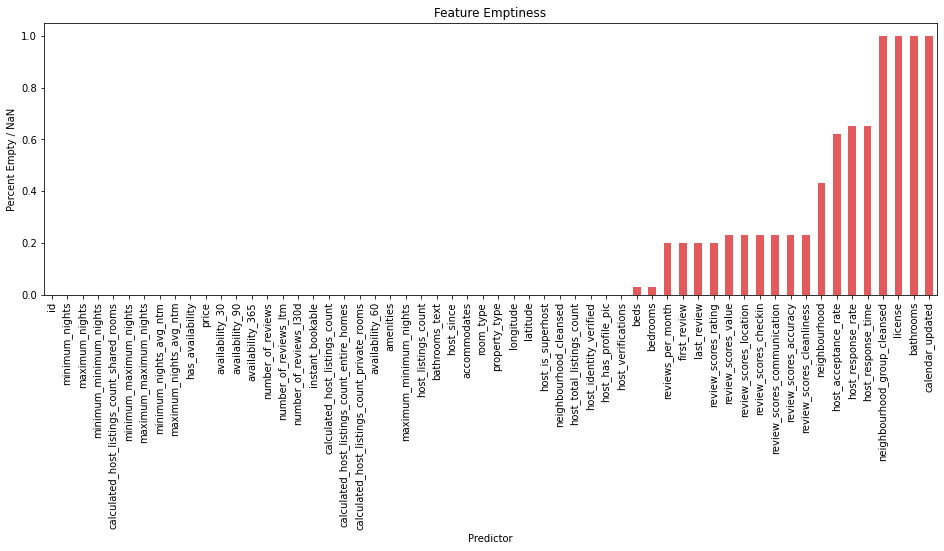

In [7]:
# percent_empty
# 
# Function to return percent of missing data in column
# Input: df (data frame)
# Output: None
def percent_empty(df):
    
    bools = df.isnull().tolist()
    percent_empty = float(bools.count(True)) / float(len(bools))
    
    return percent_empty, float(bools.count(True))

# Store emptiness for all features
emptiness = []

missing_columns = []

# Get emptiness for all features
for i in range(0, df.shape[1]):
    p, n = percent_empty(df.iloc[:,i])
    if n > 0:
        missing_columns.append(df.columns.values[i])
    emptiness.append(round((p), 2))
    
empty_dict = dict(zip(df.columns.values.tolist(), emptiness))

# Plot emptiness graph
empty = pd.DataFrame.from_dict(empty_dict, orient = 'index').sort_values(by=0)
ax = empty.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Predictor')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
ax.legend_.remove()

plt.show()

In [8]:
#As a rule of thumb any columns with over 40% percent missing data should be dropped
df.drop(['neighbourhood','host_acceptance_rate', 'host_response_rate', 'host_response_time', 'neighbourhood_group_cleansed', 'license', 'bathrooms', 'calendar_updated'], axis=1, inplace=True)


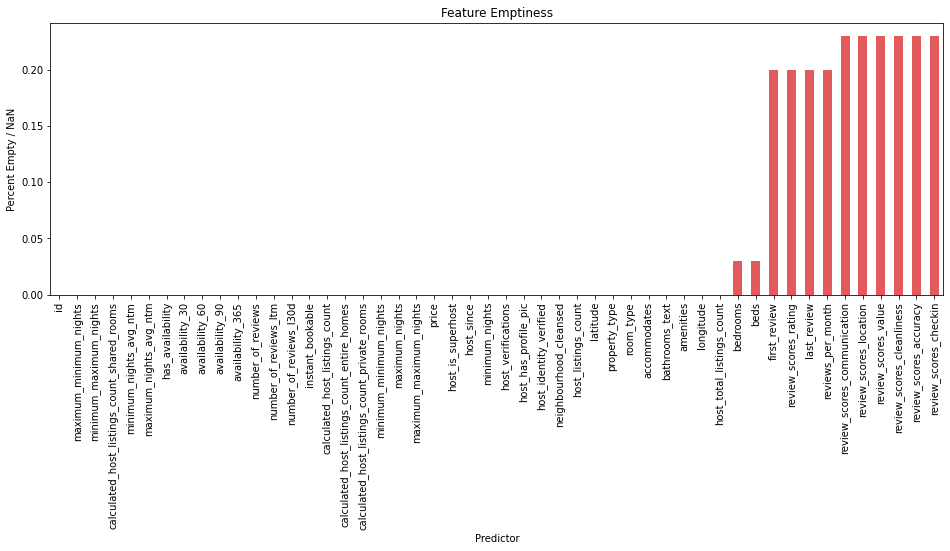

number of columns: 50


In [9]:
# percent_empty
# 
# Function to return percent of missing data in column
# Input: df (data frame)
# Output: None
def percent_empty(df):
    
    bools = df.isnull().tolist()
    percent_empty = float(bools.count(True)) / float(len(bools))
    
    return percent_empty, float(bools.count(True))

# Store emptiness for all features
emptiness = []

missing_columns = []

# Get emptiness for all features
for i in range(0, df.shape[1]):
    p, n = percent_empty(df.iloc[:,i])
    if n > 0:
        missing_columns.append(df.columns.values[i])
    emptiness.append(round((p), 2))
    
empty_dict = dict(zip(df.columns.values.tolist(), emptiness))

# Plot emptiness graph
empty = pd.DataFrame.from_dict(empty_dict, orient = 'index').sort_values(by=0)
ax = empty.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Predictor')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
ax.legend_.remove()

plt.show()
print('number of columns: ' + str(len(df.columns)))

In [10]:
#Checking duplicate data
count_listings_id = df['id'].count()
unique_listings_id = df['id'].nunique()
print(f'The count of the listings IDs: {count_listings_id}')
print(f'The count of the unique listings IDs: {unique_listings_id}')

if count_listings_id == unique_listings_id:
  print('No duplicate listings detected :)')
else:
  print('duplicate listings detected :(')

#The id will be used as the index, as this could be useful in future e.g. if a separate dataset containing reviews for each property is linked to this one
df.set_index('id', inplace=True)
#Check index is set to 'id'
df.head()

The count of the listings IDs: 6976
The count of the unique listings IDs: 6976
No duplicate listings detected :)


host_since host_is_superhost  host_listings_count  \
id                                                          
44077   2010-08-06                 t                  3.0   
85148   2011-03-27                 f                  1.0   
85156   2010-08-06                 t                  3.0   
159889  2011-07-01                 f                  0.0   
162809  2011-07-04                 t                  2.0   

        host_total_listings_count  \
id                                  
44077                         3.0   
85148                         1.0   
85156                         3.0   
159889                        0.0   
162809                        2.0   

                                       host_verifications  \
id                                                          
44077   ['email', 'phone', 'facebook', 'reviews', 'jum...   
85148                       ['email', 'phone', 'reviews']   
85156   ['email', 'phone', 'facebook', 'reviews', 'jum...   
159889  ['email', 'phone', 'reviews', 'offline_governm...   
162809  ['email', 'phone', 'reviews', 'jumio', 'offlin...   

       host_has_profile_pic host_identity_verified neighbourhood_cleansed  \
id                                                                          
44077                     t                      t  Dn Laoghaire-Rathdown   
85148                     t                      f           South Dublin   
85156                     t                      t  Dn Laoghaire-Rathdown   
159889                    t                      t            Dublin City   
162809                    t                      t  Dn Laoghaire-Rathdown   

        latitude  longitude  ... review_scores_checkin  \
id                           ...                         
44077   53.29178   -6.25792  ...                  4.92   
85148   53.29885   -6.31850  ...                   NaN   
85156   53.29209   -6.25624  ...                  4.88   
159889  53.39027   -6.23547  ...                  4.85   
162809  53.28326   -6.19188  ...                  4.94   

       review_scores_communication  review_scores_location  \
id                                                           
44077                         4.92                    4.66   
85148                          NaN                     NaN   
85156                         4.88                    4.66   
159889                        4.90                    4.62   
162809                        4.97                    4.77   

       review_scores_value  instant_bookable  calculated_host_listings_count  \
id                                                                             
44077                 4.82                 f                               3   
85148                  NaN                 f                               1   
85156                 4.80                 f                               3   
159889                4.74                 t                               3   
162809                4.84                 f                               2   

       calculated_host_listings_count_entire_homes  \
id                                                   
44077                                            0   
85148                                            0   
85156                                            0   
159889                                           0   
162809                                           0   

       calculated_host_listings_count_private_rooms  \
id                                                    
44077                                             3   
85148                                             1   
85156                                             3   
159889                                            3   
162809                                            2   

        calculated_host_listings_count_shared_rooms  reviews_per_month  
id                                                                      
44077                                 

**check correlations**<br>
checking the correlations between different features, as it is good practice to remove highly correlated features as they can will increase the complexity of the algorithm, thus increasing the risk of errors.

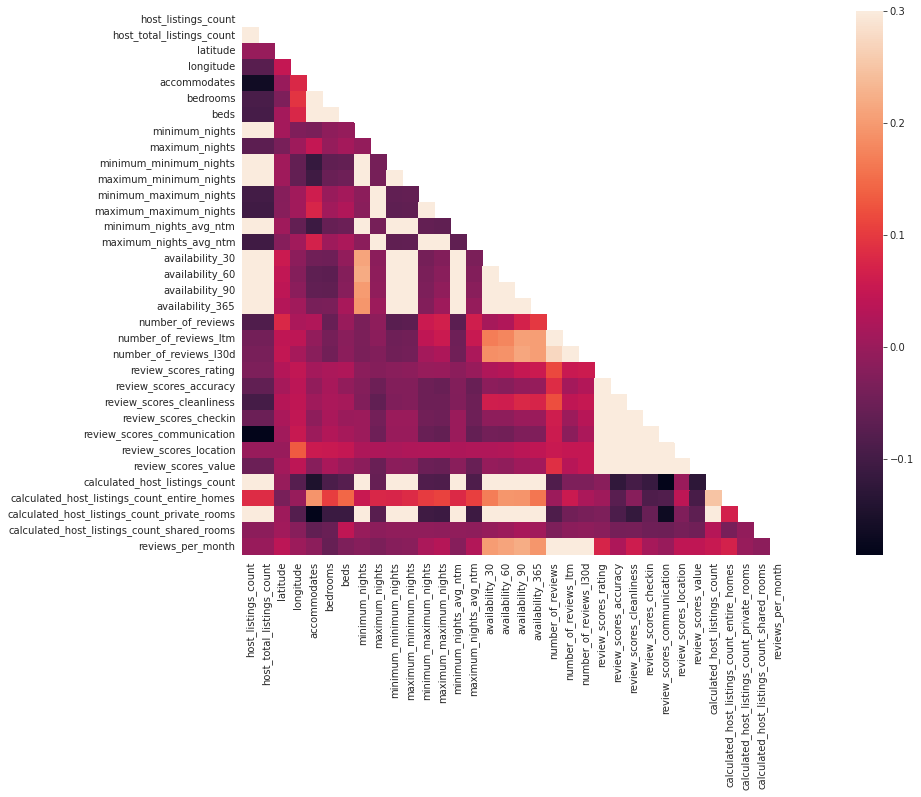

In [11]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

We see high correlations between 'host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms'. These columns may be identical and therefore need to be dropped.


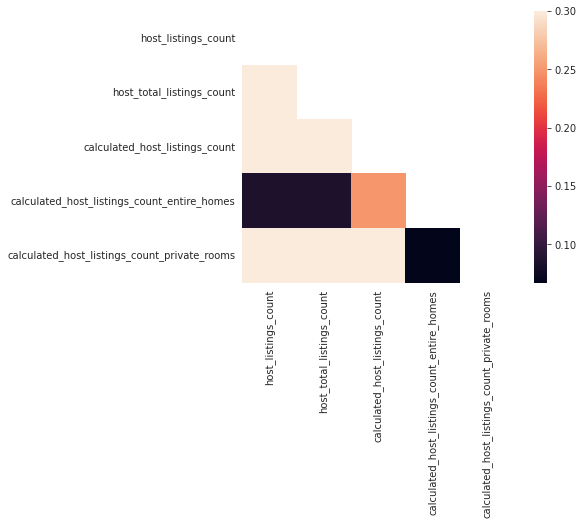

In [12]:
corr = df[['host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,)

host_listings_count and host_total_listings_count are the same in all but 11 cases. These cases are those where the value is NaN. Therefore one of these columns can be dropped. Other columns which split these into type of property will also be dropped, as they will be highly correlated (one will be the total of the others).



In [13]:
print(sum((df.host_listings_count == df.host_total_listings_count) == False))
df.loc[((df.host_listings_count == df.host_total_listings_count) == False)][:7]

11


host_since host_is_superhost  host_listings_count  \
id                                                           
12605361        NaN               NaN                  NaN   
13362878        NaN               NaN                  NaN   
24636131        NaN               NaN                  NaN   
27945872        NaN               NaN                  NaN   
27946932        NaN               NaN                  NaN   
31605657        NaN               NaN                  NaN   
31605666        NaN               NaN                  NaN   

          host_total_listings_count host_verifications host_has_profile_pic  \
id                                                                            
12605361                        NaN               None                  NaN   
13362878                        NaN               None                  NaN   
24636131                        NaN               None                  NaN   
27945872                        NaN               None                  NaN   
27946932                        NaN               None                  NaN   
31605657                        NaN               None                  NaN   
31605666                        NaN               None                  NaN   

         host_identity_verified neighbourhood_cleansed  latitude  longitude  \
id                                                                            
12605361                    NaN  Dn Laoghaire-Rathdown  53.30142   -6.17913   
13362878                    NaN  Dn Laoghaire-Rathdown  53.29928   -6.17795   
24636131                    NaN  Dn Laoghaire-Rathdown  53.25818   -6.17325   
27945872                    NaN            Dublin City  53.33821   -6.23730   
27946932                    NaN            Dublin City  53.33821   -6.23730   
31605657                    NaN            Dublin City  53.33540   -6.22371   
31605666                    NaN                 Fingal  53.48603   -6.27159   

          ... review_scores_checkin review_scores_communication  \
id        ...                                                     
12605361  ...                   5.0                         5.0   
13362878  ...                   NaN                         NaN   
24636131  ...                   NaN                         NaN   
27945872  ...                   NaN                         NaN   
27946932  ...                   NaN                         NaN   
31605657  ...                   NaN                         NaN   
31605666  ...                   NaN                         NaN   

          review_scores_location review_scores_value  instant_bookable  \
id                                                                       
12605361                     4.0                 5.0                 f   
13362878                     NaN                 NaN                 f   
24636131                     NaN                 NaN                 t   
27945872                     NaN                 NaN                 t   
27946932                     NaN                 NaN                 t   
31605657                     NaN                 NaN                 t   
31605666                     NaN                 NaN                 t   

          calculated_host_listings_count  \
id                                         
12605361                               2   
13362878                               2   
24636131                               9   
27945872                               9   
27946932                               9   
31605657                               9   
31605666                               9   

         calculated_host_listings_count_entire_homes  \
id                                                     
12605361                                           2   
13362878                                           2   
24636131                                           9   
27945872                                           9   
27946932              

In [14]:
print(sum((df.host_listings_count == df.calculated_host_listings_count) == False))
df.loc[((df.host_listings_count == df.calculated_host_listings_count) == False)][:7]

2327


host_since host_is_superhost  host_listings_count  \
id                                                          
159889  2011-07-01                 f                  0.0   
237465  2011-10-04                 f                  2.0   
426326  2011-07-01                 f                  0.0   
427495  2011-07-01                 f                  0.0   
449556  2012-04-26                 f                  2.0   
454183  2011-02-24                 t                  2.0   
526767  2012-05-10                 t                  3.0   

        host_total_listings_count  \
id                                  
159889                        0.0   
237465                        2.0   
426326                        0.0   
427495                        0.0   
449556                        2.0   
454183                        2.0   
526767                        3.0   

                                       host_verifications  \
id                                                          
159889  ['email', 'phone', 'reviews', 'offline_governm...   
237465  ['email', 'phone', 'facebook', 'reviews', 'jum...   
426326  ['email', 'phone', 'reviews', 'offline_governm...   
427495  ['email', 'phone', 'reviews', 'offline_governm...   
449556  ['email', 'phone', 'reviews', 'jumio', 'offlin...   
454183  ['email', 'phone', 'reviews', 'jumio', 'offlin...   
526767  ['email', 'phone', 'reviews', 'jumio', 'offlin...   

       host_has_profile_pic host_identity_verified neighbourhood_cleansed  \
id                                                                          
159889                    t                      t            Dublin City   
237465                    t                      t            Dublin City   
426326                    t                      t            Dublin City   
427495                    t                      t            Dublin City   
449556                    t                      t                 Fingal   
454183                    t                      f            Dublin City   
526767                    t                      t            Dublin City   

        latitude  longitude  ... review_scores_checkin  \
id                           ...                         
159889  53.39027   -6.23547  ...                  4.85   
237465  53.39558   -6.17524  ...                  4.81   
426326  53.39027   -6.23547  ...                  4.83   
427495  53.39027   -6.23547  ...                  4.84   
449556  53.42654   -6.22952  ...                  4.64   
454183  53.35334   -6.29797  ...                  4.97   
526767  53.34752   -6.26393  ...                  4.96   

       review_scores_communication  review_scores_location  \
id                                                           
159889                        4.90                    4.62   
237465                        4.78                    4.32   
426326                        4.84                    4.55   
427495                        4.88                    4.50   
449556                        4.50                    4.64   
454183                        4.97                    4.75   
526767                        4.98                    4.93   

       review_scores_value  instant_bookable  calculated_host_listings_count  \
id                                                                             
159889                4.74                 t                               3   
237465                4.64                 f                               3   
426326                4.61                 t                               3   
427495                4.62                 f                               3   
449556                4.19                 f                               3   
454183                4.53                 f                               3   
526767                4.76                 f                               1   

       calculated_host_listings_count_entire_homes  \
id                     

In [15]:
df.drop(['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

**Location**<br>
There are multiple columns for property location, including an attempt by the site that originally scraped the data to clean up the neighbourhood locations. Some of these columns can be dropped. Because all of the listings are in London, columns relating to city and country can be dropped. One columns for area (borough) will be kept - 'neighboorhood_cleansed'. Latitude and longitude will be saved in a dataframe for later use (see modelling section below).

In [16]:
lat_long = df[['latitude', 'longitude', 'price']]

df.drop(['latitude', 'longitude'], axis=1, inplace=True)
print('number of columns: ' + str(len(df.columns)))

number of columns: 42


**Number of Nights**<br>
There are multiple columns for minimum and maximum night stays, but the two main ones will be used as there are few differences between e.g. minimum_nights and minimum_minimum_nights. The latter presumably refers to the fact that min/max night stays can vary over the year. The default (i.e. most frequently applied) min/max night stay values will be used instead.

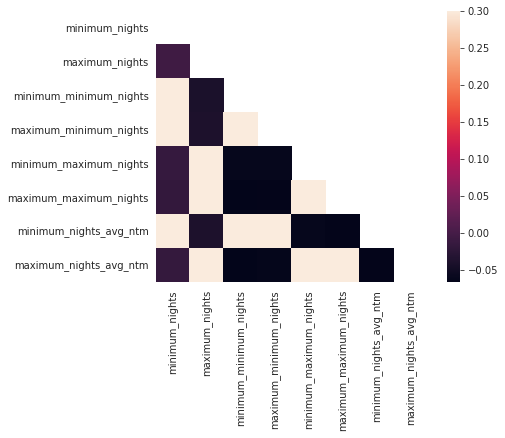

In [17]:
corr = df[['minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,)

We can see from the matrix that 'minimum_nights' is highly correlated with 'minimum_minimum_nights', 'maximum_minimum_nights', and 'minimum_nights_avg_ntm'. 
<br>
<br>
Similarly we can see that 'maximum_nights' is highly correlated with 'maximum_maximum_nights', 'minimum_maximum_nights', and 'maximum_nights_avg_ntm'.

In [18]:
min_min_night = sum((df.minimum_nights == df.minimum_minimum_nights) == False)
max_min_night = sum((df.minimum_nights == df.maximum_minimum_nights) == False)
min_avg_night = sum((df.minimum_nights == df.minimum_nights_avg_ntm) == False)
print(f'min_min_night {min_min_night}.')
print(f'max_min_night {max_min_night}.')
print(f'min_night_avg {min_avg_night}.')

min_min_night 491.
max_min_night 749.
min_night_avg 817.


All columns are highly reptitive, Therefore I will keep the original column 'minimum_nights'

In [19]:
df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_nights_avg_ntm'], axis=1, inplace=True)

In [20]:
max_max_night = sum((df.maximum_nights == df.maximum_maximum_nights) == False)
min_max_night = sum((df.maximum_nights == df.minimum_maximum_nights) == False)
max_avg_night = sum((df.maximum_nights == df.maximum_nights_avg_ntm) == False)
print(f'max_max_night {max_max_night}.')
print(f'min_max_night {min_max_night}.')
print(f'max_night_avg {max_avg_night}.')

max_max_night 861.
min_max_night 914.
max_night_avg 924.


Unsurprisingly the maximum nights follow the same trend as the minimum nights and seem to have highly repetitive rows. Therefore, I will drop the three columns and keep the orignal 'maximum_nights' column.

In [21]:
df.drop(['maximum_maximum_nights', 'minimum_maximum_nights', 'maximum_nights_avg_ntm'], axis=1, inplace=True)
print('number of columns: ' + str(len(df.columns)))

number of columns: 36


**Availability**<br>
Similar to what we saw within the maximum and minimum nights, a lot of the availability columns are highly correlated and potential contain similar data.

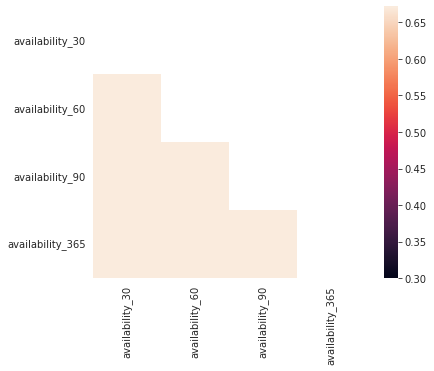

In [22]:
corr = df[['availability_30', 'availability_60', 'availability_90', 'availability_365']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,)

In [23]:
availability_365_30 = sum((df.availability_365 == df.availability_30) == False)
availability_365_60 = sum((df.availability_365 == df.availability_60) == False)
availability_365_90 = sum((df.availability_365 == df.availability_90) == False)
print(f'availability 365_30 {availability_365_30}.')
print(f'availability365_60 {availability_365_60}.')
print(f'availability_365_90 {availability_365_90}.')

availability 365_30 2616.
availability365_60 2490.
availability_365_90 1930.


In [24]:
df.drop(['availability_30', 'availability_60', 'availability_90'], axis=1, inplace=True)

**Number_of_reviews**<br>
Similar to what we saw within the maximum and minimum nights, a lot of the review columns are highly correlated and potential contain similar data.

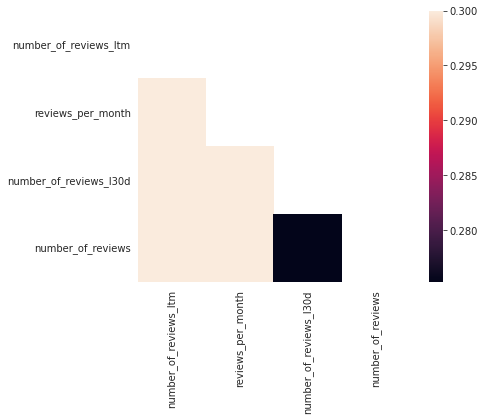

In [25]:
corr = df[['number_of_reviews_ltm', 'reviews_per_month', 'number_of_reviews_l30d', 'number_of_reviews']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,)

In [26]:
df.drop(['number_of_reviews_ltm', 'reviews_per_month'], axis=1, inplace=True)

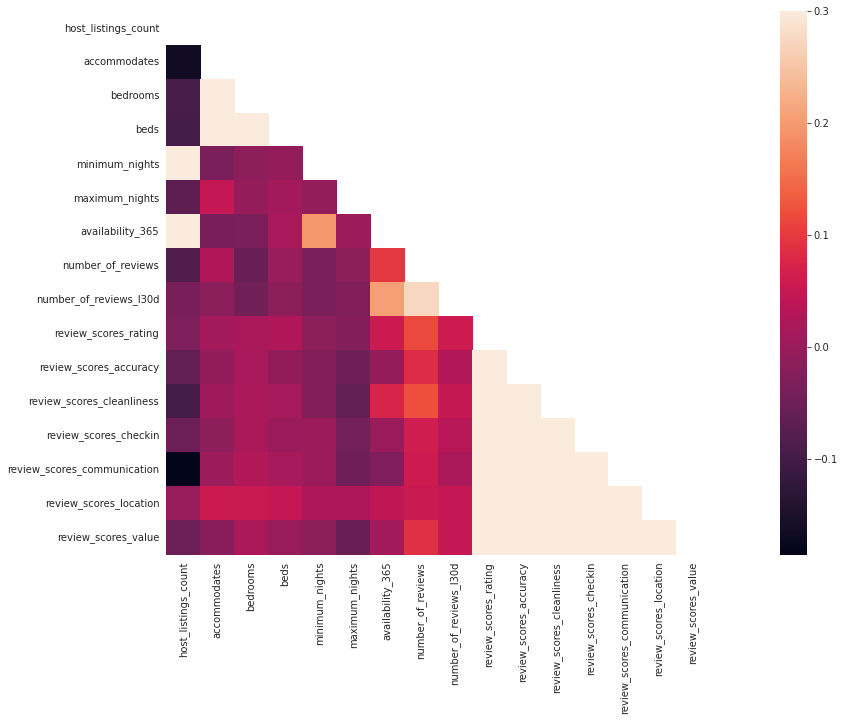

In [27]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [28]:
#**feature emptiness chart**
df.isna().sum()

host_since                       11
host_is_superhost                11
host_listings_count              11
host_verifications                0
host_has_profile_pic             11
host_identity_verified           11
neighbourhood_cleansed            0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                    6
bedrooms                        236
beds                            242
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_365                  0
number_of_reviews                 0
number_of_reviews_l30d            0
first_review                   1429
last_review                    1429
review_scores_rating           1429
review_scores_accuracy         1574
review_scores_cleanliness      1573
review_scores_checkin          1580
review_scores_communication 

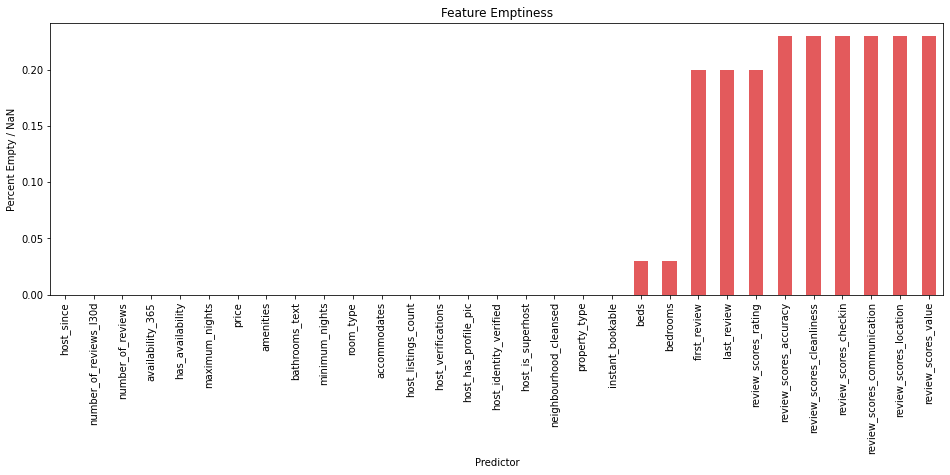

number of columns: 31


In [29]:
# percent_empty
# 
# Function to return percent of missing data in column
# Input: df (data frame)
# Output: None
def percent_empty(df):
    
    bools = df.isnull().tolist()
    percent_empty = float(bools.count(True)) / float(len(bools))
    
    return percent_empty, float(bools.count(True))

# Store emptiness for all features
emptiness = []

missing_columns = []

# Get emptiness for all features
for i in range(0, df.shape[1]):
    p, n = percent_empty(df.iloc[:,i])
    if n > 0:
        missing_columns.append(df.columns.values[i])
    emptiness.append(round((p), 2))
    
empty_dict = dict(zip(df.columns.values.tolist(), emptiness))

# Plot emptiness graph
empty = pd.DataFrame.from_dict(empty_dict, orient = 'index').sort_values(by=0)
ax = empty.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Predictor')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
ax.legend_.remove()

plt.show()
print('number of columns: ' + str(len(df.columns)))

In [30]:
df.head()

host_since host_is_superhost  host_listings_count  \
id                                                          
44077   2010-08-06                 t                  3.0   
85148   2011-03-27                 f                  1.0   
85156   2010-08-06                 t                  3.0   
159889  2011-07-01                 f                  0.0   
162809  2011-07-04                 t                  2.0   

                                       host_verifications  \
id                                                          
44077   ['email', 'phone', 'facebook', 'reviews', 'jum...   
85148                       ['email', 'phone', 'reviews']   
85156   ['email', 'phone', 'facebook', 'reviews', 'jum...   
159889  ['email', 'phone', 'reviews', 'offline_governm...   
162809  ['email', 'phone', 'reviews', 'jumio', 'offlin...   

       host_has_profile_pic host_identity_verified neighbourhood_cleansed  \
id                                                                          
44077                     t                      t  Dn Laoghaire-Rathdown   
85148                     t                      f           South Dublin   
85156                     t                      t  Dn Laoghaire-Rathdown   
159889                    t                      t            Dublin City   
162809                    t                      t  Dn Laoghaire-Rathdown   

                           property_type     room_type  accommodates  ...  \
id                                                                    ...   
44077           Private room in bungalow  Private room             2  ...   
85148   Private room in residential home  Private room             2  ...   
85156           Private room in bungalow  Private room             2  ...   
159889  Private room in residential home  Private room             1  ...   
162809         Private room in townhouse  Private room             6  ...   

       first_review  last_review  review_scores_rating review_scores_accuracy  \
id                                                                              
44077    2011-08-18   2020-02-08                  4.77                   4.82   
85148    2019-05-11   2019-05-11                  0.00                    NaN   
85156    2014-11-24   2020-02-09                  4.79                   4.85   
159889   2014-05-20   2019-12-21                  4.75                   4.76   
162809   2015-07-18   2020-02-09                  4.83                   4.87   

       review_scores_cleanliness  review_scores_checkin  \
id                                                        
44077                       4.72                   4.92   
85148                        NaN                    NaN   
85156                       4.72                   4.88   
159889                      4.72                   4.85   
162809                      4.84                   4.94   

        review_scores_communication review_scores_location  \
id                                                           
44077                          4.92                   4.66   
85148                           NaN                    NaN   
85156                          4.88                   4.66   
159889                         4.90                   4.62   
162809                         4.97                   4.77   

        review_scores_value  instant_bookable  
id                                             
44077                  4.82                 f  
85148                   NaN                 f  
85156                  4.80                 f  
159889                 4.74                 t  
162809                 4.84                 f  

[5 rows x 31 columns]

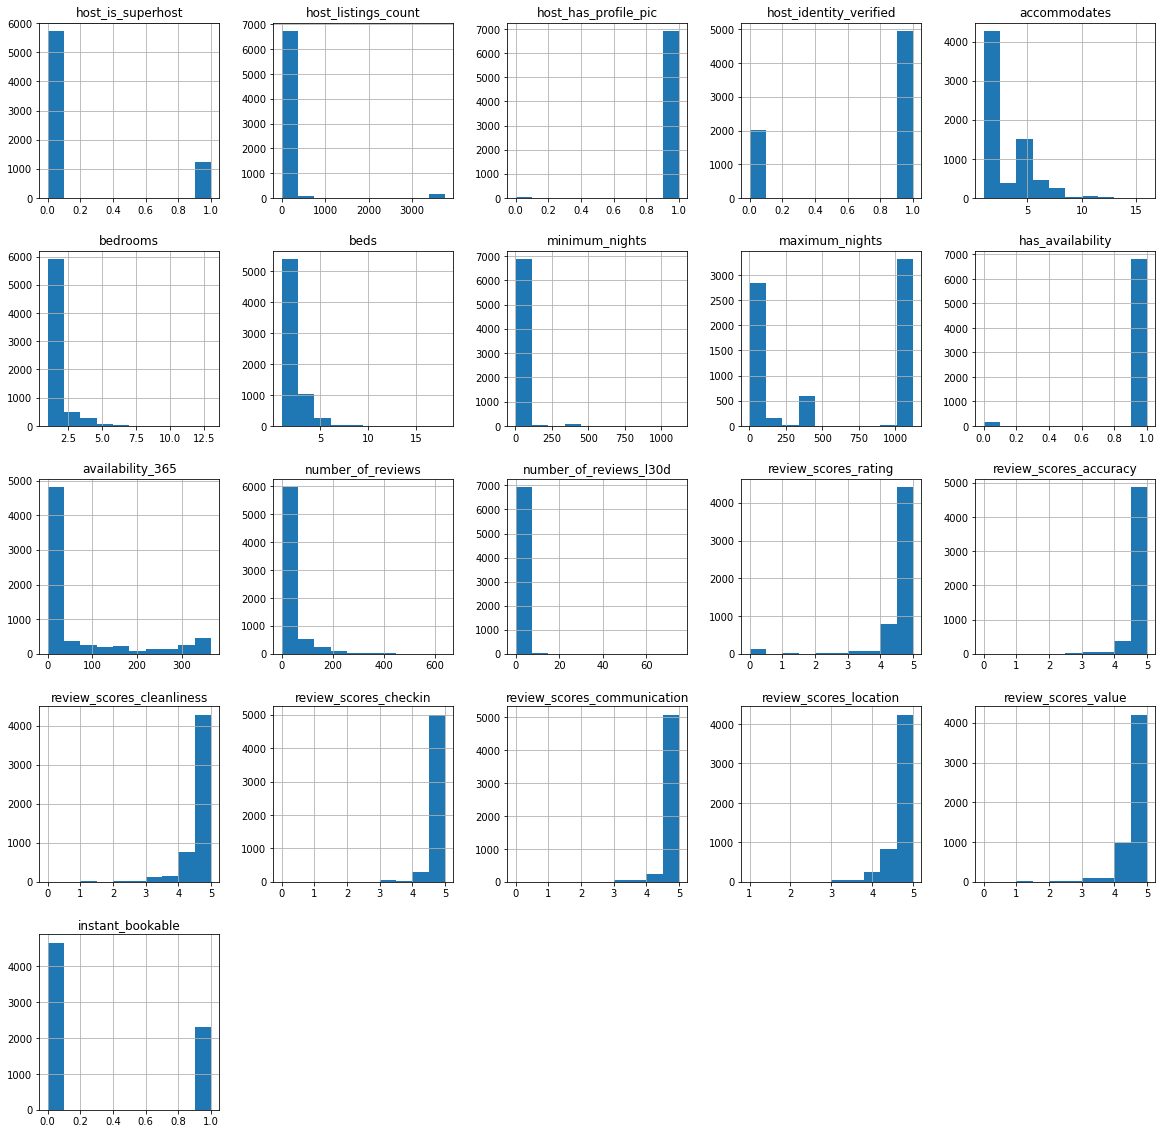

In [31]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

From the above it can be seen that all columns contain more than one category.
<br>
**Description of each column:**

*  host_since - date that the host first joined Airbnb
*  host_is_superhost - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb
*  host_listings_count - how many listings the host has in total
*  host_verifications - 
*  host_has_profile_pic - 
*  host_identity_verified - whether or not the host has been verified with id
*  neighbourhood_cleansed - the London borough the property is in
*  property_type - type of property, e.g. house or flat
*  room_type - type of listing, e.g. entire home, private room or shared room
*  accommodates - how many people the property accommodates
*  bathrooms_text - number of bathrooms in text
*  bedrooms - number of bedrooms
*  beds - number of beds
*  amenities - list of amenities
*  price - nightly advertised price (the target variable)
*  minimum_nights - the minimum length of stay
*  maximum_nights - the maximum length of stay
*  has_availability - 
*  availability_365 - how many nights are available to be booked in the next 365 days
*  number_of_reviews - the number of reviews left for the property
*  number_of_reviews_ltm - the number of reviews left for the property in the last twelve months
*  number_of_reviews_l30d - 
*  first_review - the date of the first review
*  last_review - the date of the most recent review
*  review_scores_rating - guests can score properties overall from 1 to 5 stars
*  review_scores_accuracy - guests can score the accuracy of a property's description from 1 to 5 stars
*  review_scores_cleanliness - guests can score a property's cleanliness from 1 to 5 stars
*  review_scores_checkin - guests can score their check-in from 1 to 5 stars
*  review_scores_communication - guests can score a host's communication from 1 to 5 stars
*  review_scores_location - guests can score a property's location from 1 to 5 stars
*  review_scores_value - guests can score a booking's value for money from 1 to 5 stars
*  instant_bookable - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)
*  reviews_per_month - calculated field of the average number of reviews left by guest each month



In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6976 entries, 44077 to 53180353
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_since                   6965 non-null   object 
 1   host_is_superhost            6965 non-null   float64
 2   host_listings_count          6965 non-null   float64
 3   host_verifications           6976 non-null   object 
 4   host_has_profile_pic         6965 non-null   float64
 5   host_identity_verified       6965 non-null   float64
 6   neighbourhood_cleansed       6976 non-null   object 
 7   property_type                6976 non-null   object 
 8   room_type                    6976 non-null   object 
 9   accommodates                 6976 non-null   int64  
 10  bathrooms_text               6970 non-null   object 
 11  bedrooms                     6740 non-null   float64
 12  beds                         6734 non-null   float64
 13  amenities 

**Host_since** 
<br>This is a datetime column, and will be converted into a measure of the number of days that a host has been on the platform, measured from the date that the data was scraped (8th November 2021). The original column will be left in initially for EDA, and dropped later.

In [33]:
# Converting to datetime
df.host_since = pd.to_datetime(df.host_since) 

# Calculating the number of days
df['host_days_active'] = (datetime(2021, 11, 8) - df.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

# Replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host: 2019.0
Median days as host: 2052.0


**host_is_superhost**
<br>
There are 11 rows lacking values for each of the five different host-related features. These rows will be dropped.

In [34]:
# Number of rows without a value for multiple host-related columns
len(df[df.loc[ :,['host_since', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified'] ].isnull().sum(axis=1) == 5])

11

In [35]:
df.shape

(6976, 32)

In [36]:
df.dropna(subset=['host_since'], inplace=True)
df.shape

(6965, 32)

**Room_type**
<br> As we can see we have 4 room types with private room being the most listed type

In [37]:
df.room_type.value_counts()

Private room       3436
Entire home/apt    3337
Shared room         138
Hotel room           54
Name: room_type, dtype: int64

**Property_type**
<br>
Some cleaning of property types is required as there are a large number of categories with only a few listings. The categories 'apartment', 'house' and 'other' will be used, as most properties can be classified as either apartments or houses.

In [38]:
prop_types = df['property_type'].unique()
print(sorted(prop_types))

['Boat', 'Camper/RV', 'Casa particular', 'Castle', 'Dome house', 'Entire bungalow', 'Entire cabin', 'Entire chalet', 'Entire condominium (condo)', 'Entire cottage', 'Entire guest suite', 'Entire guesthouse', 'Entire loft', 'Entire place', 'Entire rental unit', 'Entire residential home', 'Entire serviced apartment', 'Entire townhouse', 'Entire vacation home', 'Entire villa', 'Farm stay', 'Houseboat', 'Hut', 'Igloo', 'Private room', 'Private room in bed and breakfast', 'Private room in bungalow', 'Private room in cabin', 'Private room in casa particular', 'Private room in chalet', 'Private room in condominium (condo)', 'Private room in cottage', 'Private room in floor', 'Private room in guest suite', 'Private room in guesthouse', 'Private room in hostel', 'Private room in loft', 'Private room in rental unit', 'Private room in residential home', 'Private room in serviced apartment', 'Private room in tiny house', 'Private room in townhouse', 'Private room in villa', 'Room in aparthotel', '

In [39]:
rentals = df.property_type.value_counts()

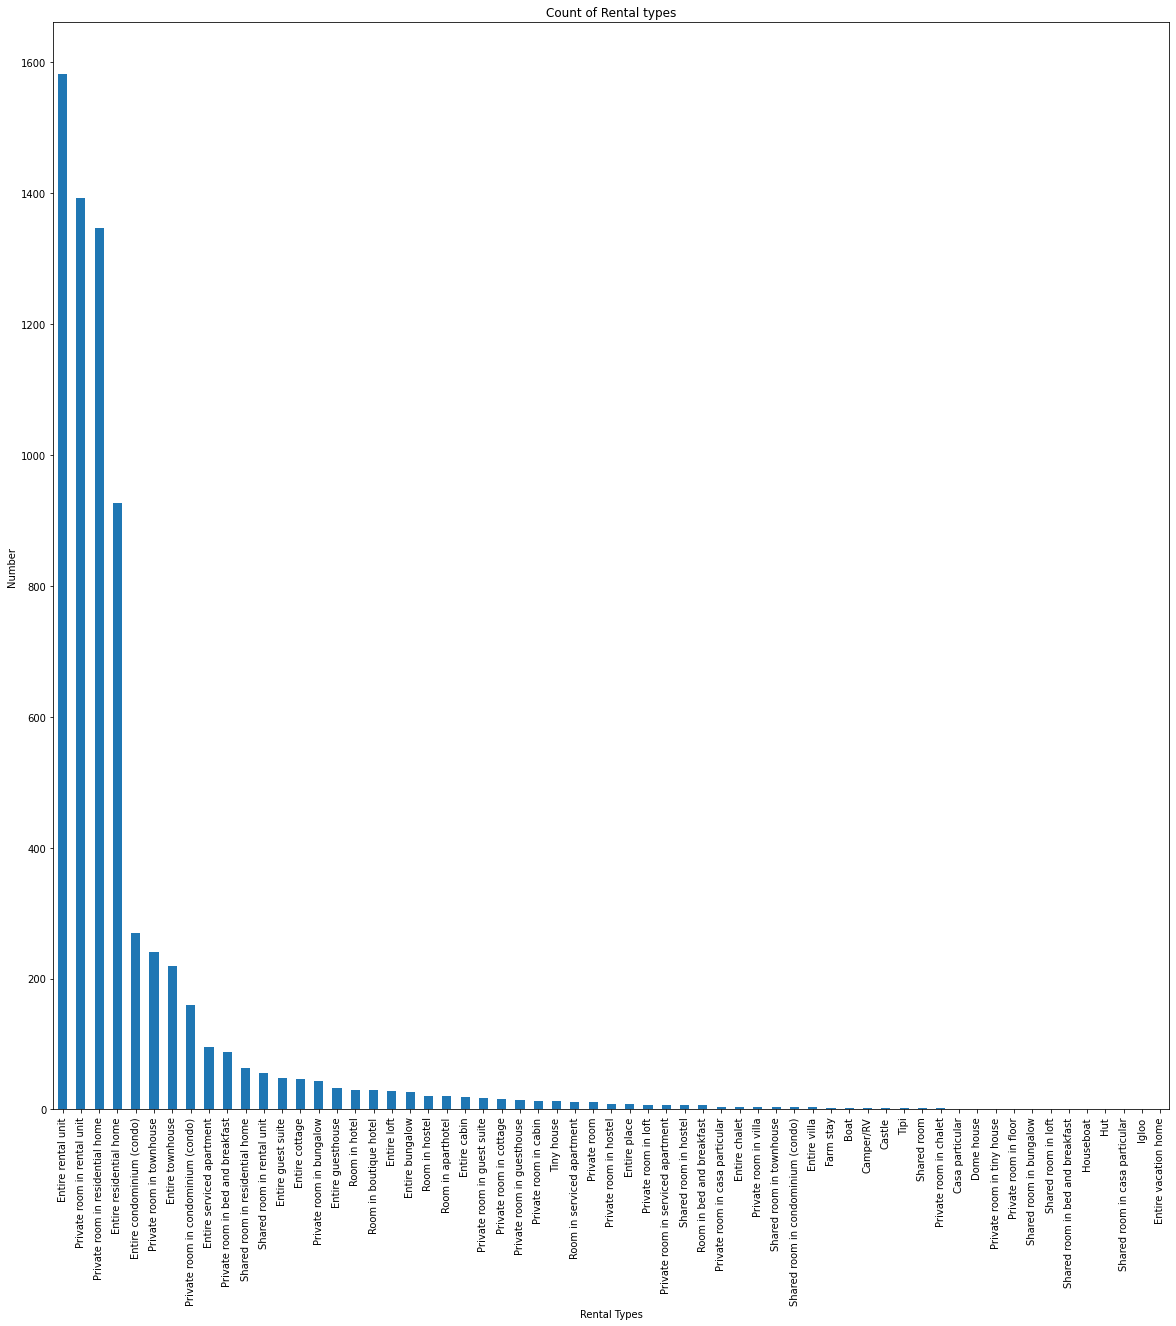

In [40]:
# import python matplotlib
import matplotlib.pyplot as plt

# Plot daily_subscribers
rentals.plot(kind="bar", figsize=(20,20))

# Include a title and axis labels
plt.title('Count of Rental types')
plt.xlabel('Rental Types')
plt.ylabel('Number')

# Rotate the x-axis labels by 45 degrees
#plt.xticks(rotation = 45)

# Display the plot
plt.show()

In [41]:
# Replacing categories that are types of Entire houses/ Entire apartments/ Entire Other.....
df.property_type.replace({
    'Entire rental unit': 'Entire House',
    'Tiny house': 'Entire House',
    'Entire residential home': 'Entire House',
    'Entire townhouse': 'Entire House',
    'Entire cottage': 'Entire House',
    'Entire guesthouse': 'Entire House',
    'Entire bungalow': 'Entire House',
    'Entire chalet': 'Entire House',
    'Entire place': 'Entire House',
    'Entire villa': 'Entire House',
    'Entire vacation home': 'Entire House',
    'Entire condominium (condo)': 'Entire Apartment',
    'Entire serviced apartment ': 'Entire Apartment',
    'Entire guest suite': 'Entire Other',
    'Entire loft': 'Entire Other',
    'Entire cabin': 'Entire Other',
    'Dome house': 'Entire Other',
    'Private room in rental unit': 'Private Room House',
    'Private room in residential home': 'Private Room House',
    'Private room in townhouse': 'Private Room House',
    'Private room in bed and breakfast': 'Private Room House',
    'Private room in bungalow': 'Private Room House',
    'Private room in guesthouse': 'Private Room House',
    'Private room in cottage': 'Private Room House',
    'Private room': 'Private Room House',
    'Private room in villa': 'Private Room House',
    'Private room in tiny house': 'Private Room House',
    'Private room in floor': 'Private Room House',
    'Room in bed and breakfast': 'Private Room House',
    'Private room in condominium (condo)': 'Private Room Apartment',
    'Room in aparthotel': 'Private Room Apartment',
    'Room in serviced apartment': 'Private Room Apartment',
    'Private room in chalet': 'Private Room Apartment',
    'Private room in serviced apartment': 'Private Room Apartment',
    'Room in hostel': 'Private Room Other',
    'Private room in guest suite': 'Private Room Other',
    'Private room in cabin': 'Private Room Other',
    'Private room in hostel': 'Private Room Other',
    'Room in hotel': 'Private Room Other',
    'Room in boutique hotel': 'Private Room Other',
    'Private room in loft': 'Private Room Other',
    'Private room in casa particular': 'Private Room Other',
    'Shared room in residential home': 'Shared Room House',
    'Shared room in rental unit': 'Shared Room House',
    'Shared room in townhouse': 'Shared Room House',
    'Shared room in bungalow': 'Shared Room House',
    'Shared room in bed and breakfast': 'Shared Room House',
    'Shared room in condominium (condo)': 'Shared Room Apartment',
    'Shared room in hostel': 'Shared Room Other',
    'Shared room in loft': 'Shared Room Other',
    'Shared room in casa particular': 'Shared Room Other',
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['Entire House', 'Entire Apartment', 'Entire Other', 'Private Room House', 'Private Room Apartment', 'Private Room Other', 'Shared Room House', 'Shared Room Apartment', 'Shared Room Other' ]), 'property_type'] = 'Other'


In [42]:
#New property_types values
df.property_type.value_counts()

Private Room House        3164
Entire House              2860
Entire Apartment           269
Private Room Apartment     199
Private Room Other         130
Shared Room House          125
Other                      111
Entire Other                96
Shared Room Other            8
Shared Room Apartment        3
Name: property_type, dtype: int64

**Bathrooms**<br>
Bathrooms_text is a string value, I will extract the number and turn it into a integer.

In [43]:
df['bathrooms_text'].head()

id
44077     1.5 shared baths
85148                  NaN
85156     1.5 shared baths
159889      2 shared baths
162809    1.5 shared baths
Name: bathrooms_text, dtype: object

In [44]:
df["bathrooms"] = df["bathrooms_text"].str.split(" ", expand=True)[0]
df["bathrooms"] = pd.to_numeric(df['bathrooms'], errors='coerce')
#Now we have the bathrooms number extracted we can drop 'bathrooms_text'
df.drop(['bathrooms_text'], axis=1, inplace=True)

In [45]:
df['bathrooms'].unique()

array([1.5, nan, 2. , 1. , 2.5, 3.5, 3. , 4.5, 4. , 5. , 0. , 7.5, 6.5,
       6. , 5.5, 8.5, 9. ])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6965 entries, 44077 to 53180353
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   host_since                   6965 non-null   datetime64[ns]
 1   host_is_superhost            6965 non-null   float64       
 2   host_listings_count          6965 non-null   float64       
 3   host_verifications           6965 non-null   object        
 4   host_has_profile_pic         6965 non-null   float64       
 5   host_identity_verified       6965 non-null   float64       
 6   neighbourhood_cleansed       6965 non-null   object        
 7   property_type                6965 non-null   object        
 8   room_type                    6965 non-null   object        
 9   accommodates                 6965 non-null   int64         
 10  bedrooms                     6729 non-null   float64       
 11  beds                         6723 n

**beds, bedrooms and bathrooms**<br> 
These columns contain some Na values, Missing values will be replaced with the median (to avoid strange fractions).

In [47]:
df[['beds', 'bathrooms', 'bedrooms']].isna().sum()

beds         242
bathrooms     39
bedrooms     236
dtype: int64

In [48]:
# Number of rows without a value for multiple columns
len(df[df.loc[ :,['beds', 'bedrooms', 'bathrooms'] ].isnull().sum(axis=1) == 3])

1

In [49]:
#Interesting none of the missing values are on the same rows therefore will be replaced with the median (to avoid strange fractions).
for col in ['bathrooms', 'bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

In [50]:
#Check
df[['beds', 'bathrooms', 'bedrooms']].isna().sum()

beds         0
bathrooms    0
bedrooms     0
dtype: int64

**Amenitites**
<br>
Amenities is a list of additional features in the property, e.g. whether it has a TV or parking. Examples are below:



In [51]:
# Example of amenities listed
df.amenities[:1].values

array(['["Shower gel", "Hangers", "Cleaning products", "Hot water", "Indoor fireplace", "Body soap", "Bathtub", "Fire extinguisher", "Hair dryer", "Mini fridge", "Cooking basics", "Clothing storage: closet", "Iron", "Dedicated workspace", "Dishwasher", "Coffee maker", "Refrigerator", "Outdoor furniture", "Private fenced garden or backyard", "Room-darkening shades", "Free street parking", "Shared patio or balcony", "Outdoor dining area", "Bed linens", "Toaster", "First aid kit", "Oven", "Essentials", "Smoke alarm", "Shampoo", "Lock on bedroom door", "Microwave", "Dishes and silverware", "Single level home", "Extra pillows and blankets", "Long term stays allowed", "Free driveway parking on premises", "Wine glasses", "Dining table", "Conditioner", "Paid washer \\u2013 In unit", "Hot water kettle", "Wifi", "Ethernet connection", "Carbon monoxide alarm", "Paid dryer \\u2013 In unit", "Central heating", "Freezer", "Air conditioning", "Breakfast", "Host greets you"]'],
      dtype=object)

In [52]:
#Find the most common amenities (top 30)
results = Counter()
df['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

results.most_common(30)

[(' Heating', 6325),
 (' Essentials', 6320),
 (' Wifi', 6162),
 (' Smoke alarm', 6004),
 (' Washer', 5112),
 (' Shampoo', 4702),
 (' Hair dryer', 4642),
 ('[Hangers', 4634),
 (' Kitchen', 4338),
 (' Long term stays allowed', 4028),
 (' Carbon monoxide alarm', 3801),
 (' Dedicated workspace', 3791),
 (' Iron', 3744),
 (' Hot water', 3690),
 (' Fire extinguisher', 3419),
 (' Dryer', 3193),
 (' TV', 2883),
 (' Dishes and silverware', 2844),
 (' Refrigerator', 2782),
 (' Free parking on premises', 2620),
 (' Cooking basics', 2618),
 (' Microwave', 2613),
 (' Bed linens', 2520),
 (' First aid kit', 2512),
 (' Oven', 2354),
 (' Stove', 1858),
 (' Private entrance', 1790),
 (' Coffee maker', 1661),
 (' Lock on bedroom door', 1653),
 (' Elevator', 1645)]

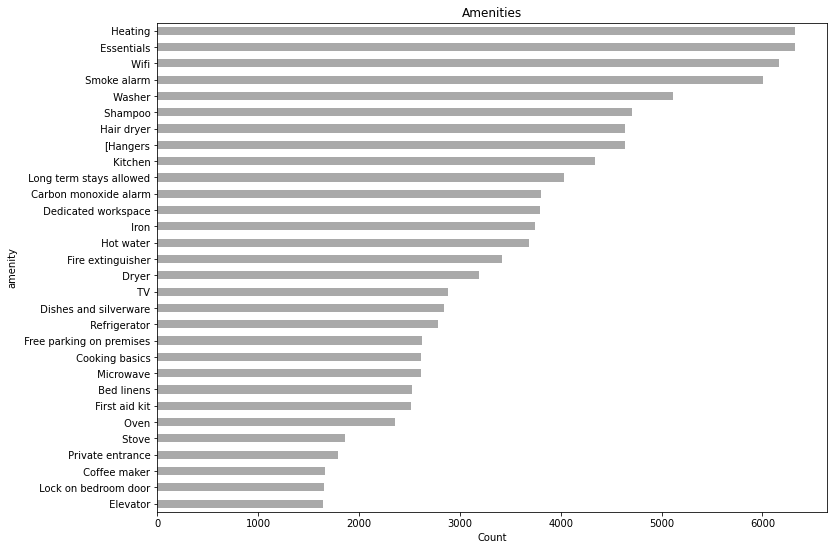

In [53]:
# create a new dataframe
sub_df = pd.DataFrame(results.most_common(30), columns=['amenity', 'count'])
# plot the Top 20
sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count',  
                                                      figsize=(12,9), legend=False, color='darkgrey',
                                                      title='Amenities')
plt.xlabel('Count');

According to Airbnb the top amenitities for increase consumer interest and price include. 
* Wifi
* free parking
* a pool
* a jacuzzi
* a kitchen
* heating
* washer
* a TV
* Air conditioning
* A pool/Jacuzzi
* Pet-friendly space. 
<br> from my literature review a couple of amenities that are somewhat unique and not offered by all hosts but increase price include:

*   a laptop-friendly workspace
*   smoker friendly
*   being greeted by host

<br> I will add these as columns and drop the original amenities column. 




In [54]:
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Wifi'), 'wifi'] = 1
df.loc[df['amenities'].str.contains('Free Parking'), 'free_parking'] = 1
df.loc[df['amenities'].str.contains('Pool|pool|hot tub|sauna|Sauna'), 'pool_or_hottub'] = 1
df.loc[df['amenities'].str.contains('Kitchen|kitchen'), 'kitchen'] = 1
df.loc[df['amenities'].str.contains('Heating|heating'), 'heating'] = 1
df.loc[df['amenities'].str.contains('washer|Washer'), 'washer'] = 1
df.loc[df['amenities'].str.contains('Air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('pet'), 'pet_friendly'] = 1
df.loc[df['amenities'].str.contains('workspace'), 'laptop_friendly_workspace'] = 1
df.loc[df['amenities'].str.contains('Children|family'), 'family_kid_friendly'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greets_you'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Backyard|Garden|Outdoor|Sun loungers|Terrace'), 'garden'] = 1
df.loc[df['amenities'].str.contains('gym|Gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Sound system|sound system'), 'sound_system'] = 1


In [55]:
df.head()

host_since  host_is_superhost  host_listings_count  \
id                                                          
44077  2010-08-06                1.0                  3.0   
85148  2011-03-27                0.0                  1.0   
85156  2010-08-06                1.0                  3.0   
159889 2011-07-01                0.0                  0.0   
162809 2011-07-04                1.0                  2.0   

                                       host_verifications  \
id                                                          
44077   ['email', 'phone', 'facebook', 'reviews', 'jum...   
85148                       ['email', 'phone', 'reviews']   
85156   ['email', 'phone', 'facebook', 'reviews', 'jum...   
159889  ['email', 'phone', 'reviews', 'offline_governm...   
162809  ['email', 'phone', 'reviews', 'jumio', 'offlin...   

        host_has_profile_pic  host_identity_verified neighbourhood_cleansed  \
id                                                                            
44077                    1.0                     1.0  Dn Laoghaire-Rathdown   
85148                    1.0                     0.0           South Dublin   
85156                    1.0                     1.0  Dn Laoghaire-Rathdown   
159889                   1.0                     1.0            Dublin City   
162809                   1.0                     1.0  Dn Laoghaire-Rathdown   

             property_type     room_type  accommodates  ...  washer  \
id                                                      ...           
44077   Private Room House  Private room             2  ...     1.0   
85148   Private Room House  Private room             2  ...     1.0   
85156   Private Room House  Private room             2  ...     1.0   
159889  Private Room House  Private room             1  ...     1.0   
162809  Private Room House  Private room             6  ...     1.0   

        air_conditioning pet_friendly laptop_friendly_workspace  \
id                                                                
44077                1.0          NaN                       1.0   
85148                NaN          NaN                       1.0   
85156                NaN          NaN                       NaN   
159889               NaN          NaN                       1.0   
162809               NaN          NaN                       1.0   

        family_kid_friendly  host_greets_you  smoking_allowed  garden  gym  \
id                                                                           
44077                   NaN              1.0              NaN     1.0  NaN   
85148                   NaN              NaN              NaN     NaN  NaN   
85156                   NaN              1.0              NaN     1.0  NaN   
159889                  NaN              NaN              NaN     NaN  NaN   
162809                  NaN              NaN              NaN     NaN  1.0   

        sound_system  
id                    
44077            NaN  
85148            NaN  
85156            NaN  
159889           NaN  
162809           1.0  

[5 rows x 48 columns]

One way to reduce the number of features (to avoid the curse of dimensionality) is to remove the amenities which add relatively little information, or are relatively unhelpful in differentiating between different listings. Amenity features where either the true or the false category contains fewer than 10% of listings will be removed.

In [56]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,30:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:,30:].columns:
    if df[col].sum() < len(df)/20:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

['free_parking', 'pool_or_hottub', 'air_conditioning', 'pet_friendly', 'smoking_allowed', 'gym', 'sound_system']


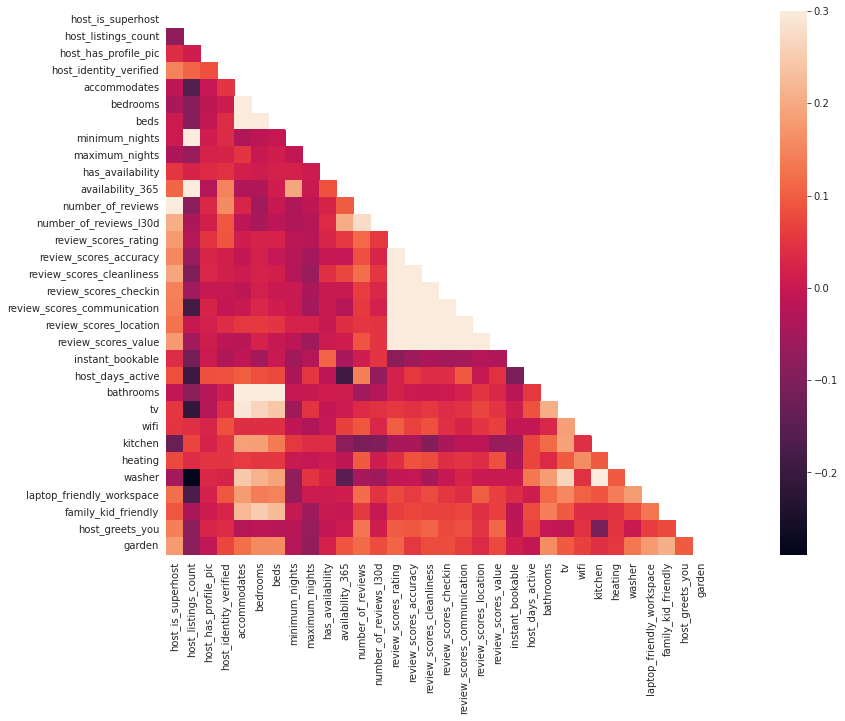

In [57]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

**Host_verifications** are very important for creating a sense of trust for consumers.

In [58]:
# Example of verifications listed
df.host_verifications[:1].values

array(["['email', 'phone', 'facebook', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']"],
      dtype=object)

In [59]:
#Find the most common amenities (top 30)
results = Counter()
df['host_verifications'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.lstrip('[')\
               .str.rstrip(']')\
               .str.split(',')\
               .apply(results.update)

results.most_common(30)

[("'email'", 6403),
 (" 'phone'", 6382),
 (" 'government_id'", 4695),
 (" 'reviews'", 4188),
 (" 'jumio'", 3392),
 (" 'offline_government_id'", 3381),
 (" 'selfie'", 2180),
 (" 'identity_manual'", 2070),
 (" 'facebook'", 1226),
 (" 'work_email'", 903),
 ("'phone'", 542),
 (" 'google'", 359),
 (" 'manual_offline'", 90),
 (" 'manual_online'", 33),
 (" 'kba'", 18),
 ("'reviews'", 13),
 ('', 5),
 (" 'zhima_selfie'", 4),
 ("'facebook'", 1),
 ("'jumio'", 1),
 (" 'sent_id'", 1)]

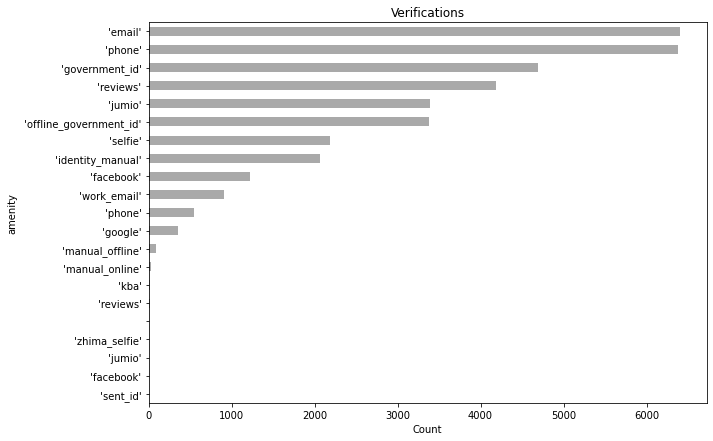

In [60]:
# create a new dataframe
HV_sub_df = pd.DataFrame(results.most_common(30), columns=['amenity', 'count'])
# plot the Top 20
HV_sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count',  
                                                      figsize=(10,7), legend=False, color='darkgrey',
                                                      title='Verifications')
plt.xlabel('Count');

In [61]:
df.loc[df['host_verifications'].str.contains('email'), 'host_verified_email'] = 1
df.loc[df['host_verifications'].str.contains('facebook'), 'host_verified_facebook'] = 1
df.loc[df['host_verifications'].str.contains('google'), 'host_verified_google'] = 1
df.loc[df['host_verifications'].str.contains('government_id'), 'host_verified_government_id'] = 1
df.loc[df['host_verifications'].str.contains('identity_manual'), 'host_verified_identity_manual'] = 1
df.loc[df['host_verifications'].str.contains('jumio'), 'host_verified_jumio'] = 1
df.loc[df['host_verifications'].str.contains('kba'), 'host_verified_kba'] = 1
df.loc[df['host_verifications'].str.contains('manual_offline'), 'host_verified_manual_offline'] = 1
df.loc[df['host_verifications'].str.contains('manual_online'), 'host_verified_manual_online'] = 1
df.loc[df['host_verifications'].str.contains('phone'), 'host_verified_phone'] = 1
df.loc[df['host_verifications'].str.contains('reviews'), 'host_verified_reviews'] = 1
df.loc[df['host_verifications'].str.contains('selfie'), 'host_verified_selfie'] = 1
df.loc[df['host_verifications'].str.contains('sent_id'), 'host_verified_sent_id'] = 1
df.loc[df['host_verifications'].str.contains('zhima_selfie'), 'host_verified_zhima_selfie'] = 1


In [62]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,38:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Produces a list of host_verification features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:,38:].columns:
    if df[col].sum() < len(df)/20:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)
# Dropping the original amenity feature
df.drop('host_verifications', axis=1, inplace=True)

['host_verified_kba', 'host_verified_manual_offline', 'host_verified_manual_online', 'host_verified_sent_id', 'host_verified_zhima_selfie']


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6965 entries, 44077 to 53180353
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   host_since                     6965 non-null   datetime64[ns]
 1   host_is_superhost              6965 non-null   float64       
 2   host_listings_count            6965 non-null   float64       
 3   host_has_profile_pic           6965 non-null   float64       
 4   host_identity_verified         6965 non-null   float64       
 5   neighbourhood_cleansed         6965 non-null   object        
 6   property_type                  6965 non-null   object        
 7   room_type                      6965 non-null   object        
 8   accommodates                   6965 non-null   int64         
 9   bedrooms                       6965 non-null   float64       
 10  beds                           6965 non-null   float64       
 11  price    

**Price**<br>Price will be converted to an integer - currently it is a string because there is a currency sign.



In [64]:
df.price.isna().sum()

0

In [65]:
# clean up the columns (by method chaining)
df["price"] = df["price"].str[1:].str.replace(",","").astype(float)

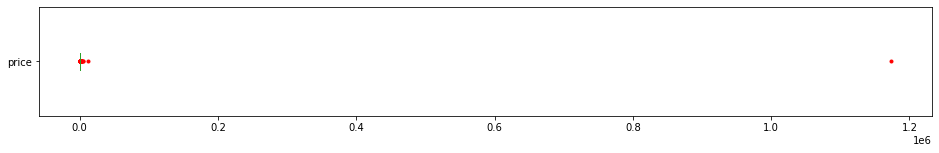

In [66]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
df['price'].plot(kind='box', vert=False, flierprops=red_square, figsize=(16,2));

In [67]:
#As seen above there seems to be outliers within the price column. Lets delve deeper to understand this.
price_outliers = df[df['price']>2000]

print(f'price outliers shape {price_outliers.shape}.')
print(f'dataframe shape {df.shape}.')
#As we can see from the shape out of nearly 7000 rows of data only 10 of them cost over $2000 a night. I will check to see if they are verified hosts.
price_outliers[['host_identity_verified', 'price']]

price outliers shape (10, 48).
dataframe shape (6965, 48).


host_identity_verified      price
id                                         
13449518                     1.0     4357.0
15596718                     1.0     2500.0
18835412                     1.0     2500.0
23373382                     1.0     4000.0
36995636                     0.0  1173721.0
38840325                     0.0     2143.0
41202091                     1.0     2033.0
43035268                     1.0     2099.0
45339158                     0.0     4700.0
47714026                     1.0    12100.0

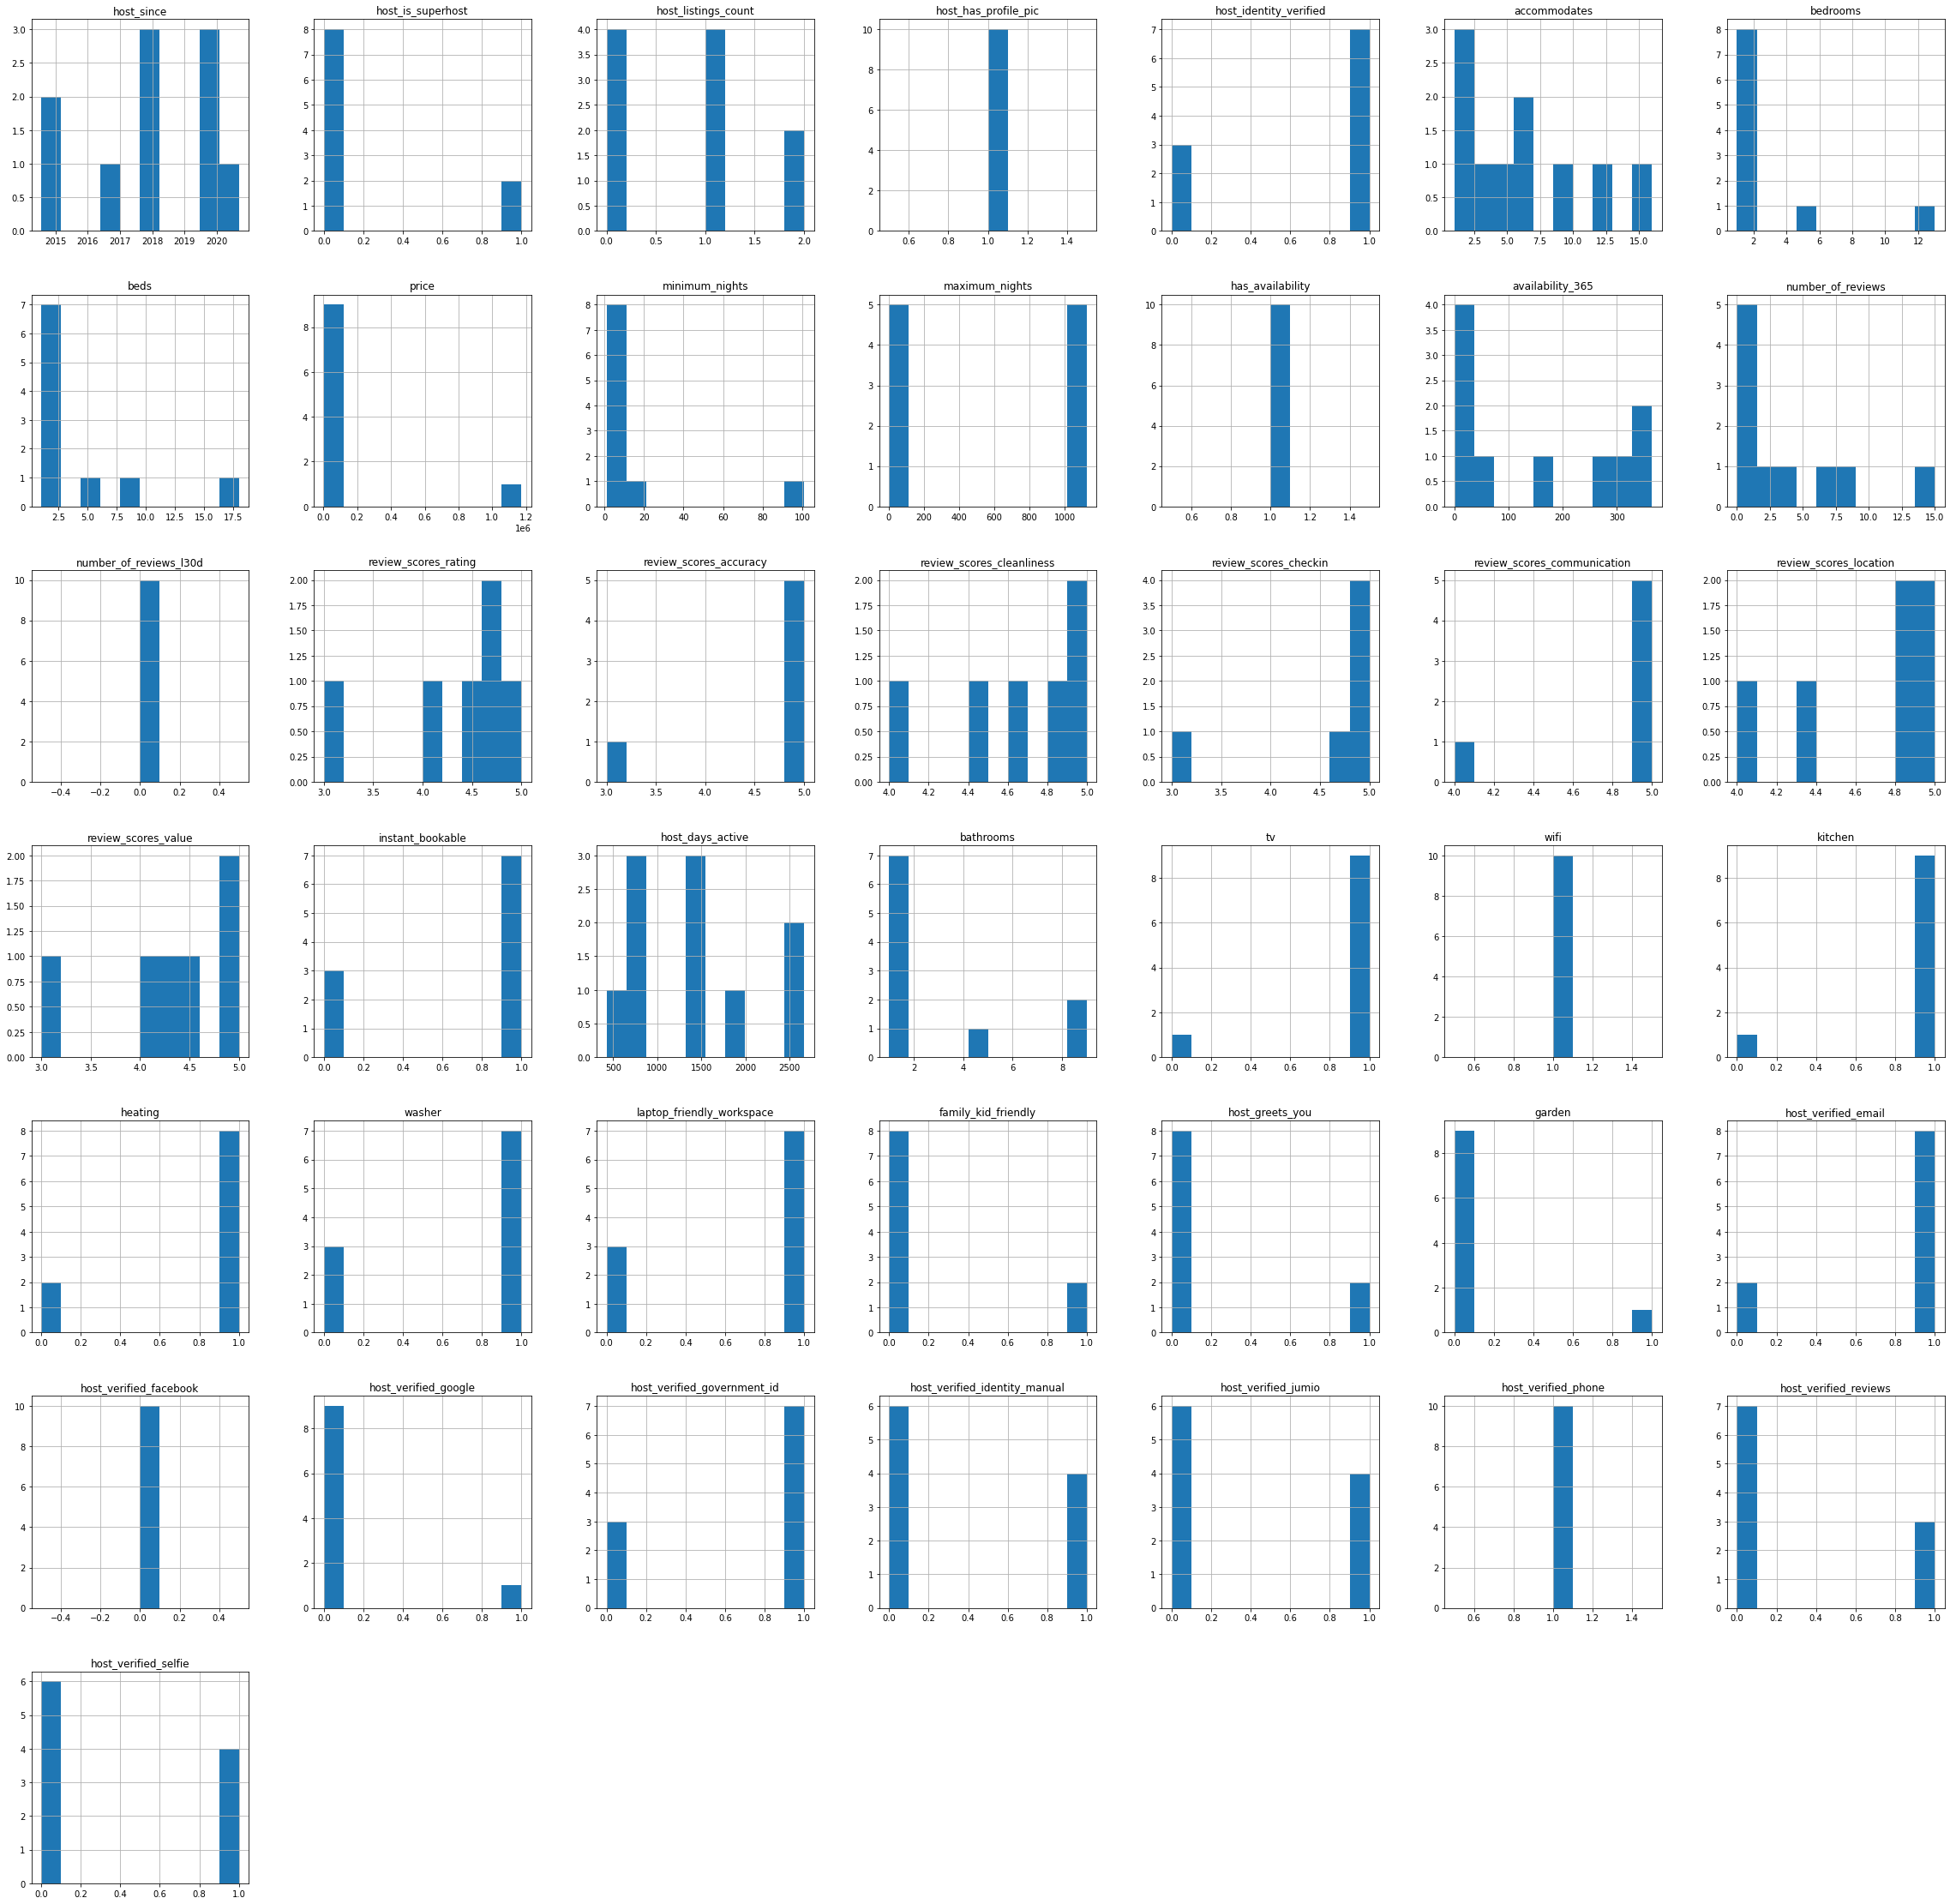

In [68]:
# Plotting the distribution of numerical and boolean categories to see if they are legitamate listings.
price_outliers.hist(figsize=(40,40));

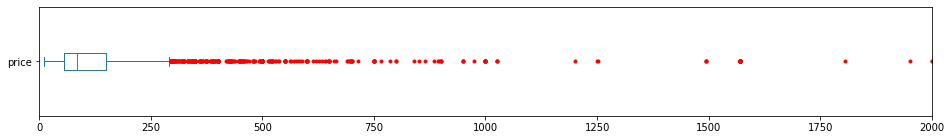

In [69]:
#As a result, for the purpose of this project and for the integrity of the results from the models I will focus on listings that cost less than $2000 a night.
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
df['price'].plot(kind='box', xlim=(0,2000), vert=False, flierprops=red_square, figsize=(16,2));

In [70]:
eda_df = df[df['price'] < 2000]
eda_df.shape

(6953, 48)

#DATA GOOD TO HERE

In [71]:
#eda_df.to_csv('manipulateddata.csv')

#Exploratory Data Analysis<br>
##Variation Analysis<br>
Used to gain insight into single features. i.e. Room_types and host_verifications.<br>
**Note throughout this analysis, 0.0 = False and 1.0= True**

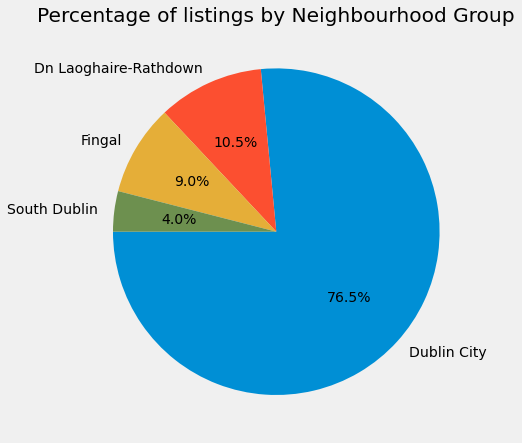

In [72]:
#House characteristics i.e. Location, rooms, accomodates, 
#Price differences by Neighbourhood
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Percentage of listings by Neighbourhood Group")
g = plt.pie(eda_df.neighbourhood_cleansed.value_counts(), labels=eda_df.neighbourhood_cleansed.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()
#Dublin City has the most amount of listings with more listings than the other three combined. 

Text(0.5, 1.0, 'Number of accomodations per property types')

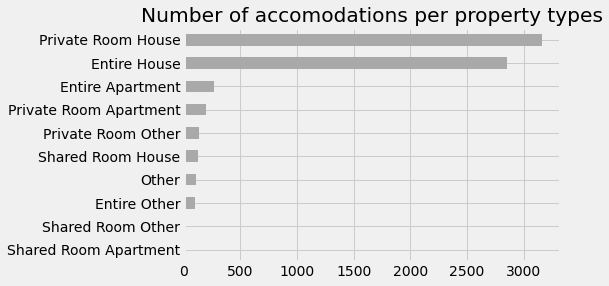

In [73]:
#Count of property_types 
eda_df['property_type'].value_counts().sort_values().plot(kind='barh', color='darkgrey')
plt.title('Number of accomodations per property types')
#Surprisingly Private Room in a house dominates the market, followed by an entire house. 

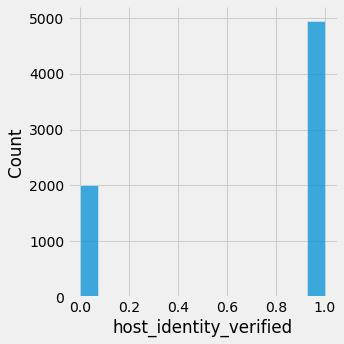

In [74]:
sns.displot(eda_df, x="host_identity_verified")
#Nearly 5000 hosts have verified their identity, over double the amount that do not. 

##Covariation analysis<br>
To see the relationship between certain variables. i.e. Location and price.
**House features**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


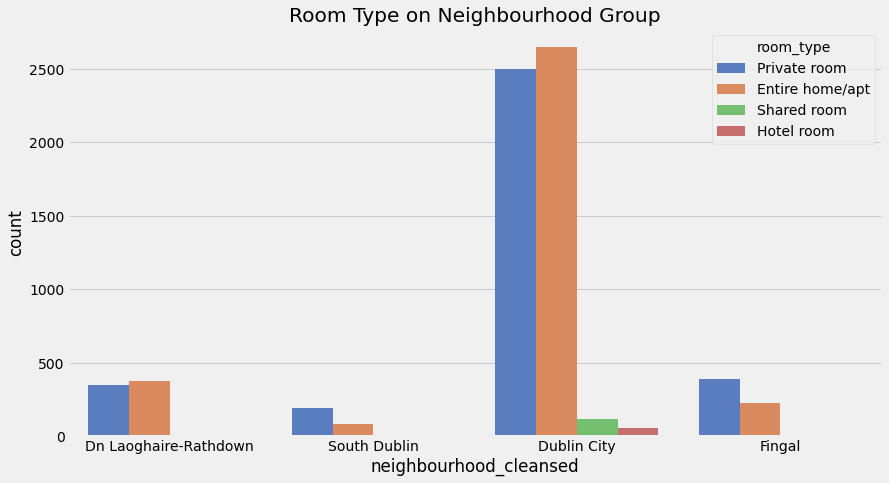

In [75]:
#Let’s see room types occupied by a neighborhood group.
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(eda_df.neighbourhood_cleansed,hue=eda_df.room_type, palette="muted")
plt.show()

In [76]:
# clean up the columns (by method chaining)
lat_long["price"] = lat_long["price"].str[1:].str.replace(",","").astype(float)
long_lat = lat_long[lat_long['price'] < 2000]
long_lat['price'].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1950.0

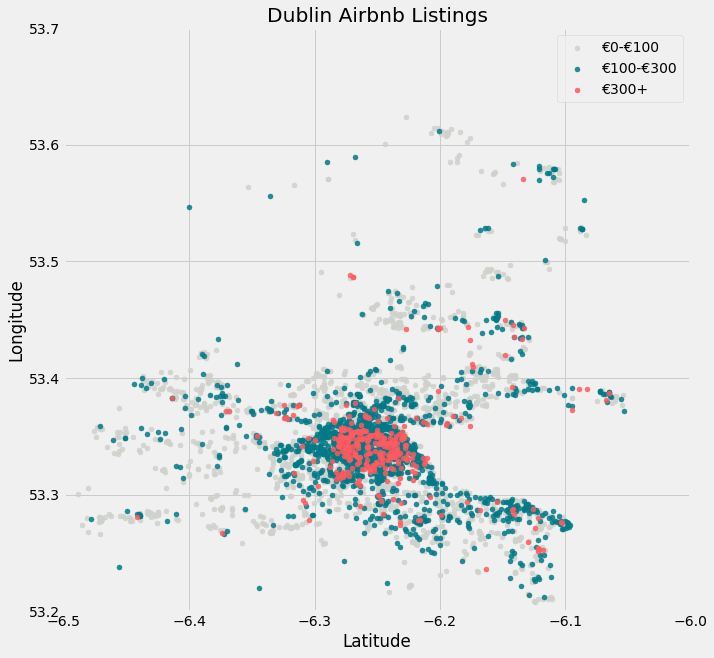

In [77]:
# Global variables
BNB_BLUE = '#007A87'
BNB_RED = '#FF5A5F'
BNB_DARK_GRAY = '#565A5C'
BNB_LIGHT_GRAY = '#CED1CC'
# Outline price buckets
intervals = [0,100,300, 10000]
leg_labels = []

# Get Labels for legend
for i in range(0,len(intervals) - 1):
    if i == len(intervals) - 2:
        leg_labels.append('€{}+'.format(intervals[i]))
    else:
        leg_labels.append("€{}-€{}".format(intervals[i], intervals[i+1]))    

buckets = []

# Divide up into price buckets
for i in range(0, len(intervals) - 1):
    buckets.append(long_lat[(long_lat['price'] > intervals[i]) & (long_lat['price'] < intervals[i+1])])

colors = [BNB_LIGHT_GRAY, BNB_BLUE, BNB_RED]
alphas = [0.85, 0.85, 0.85]  

# Plot listings on scatterplot
plt.figure(figsize=(10, 10))
for i in range(0, len(buckets)):
    plt.scatter(buckets[i]['longitude'], buckets[i]['latitude'], alpha = alphas[i], c=colors[i], s=25)
    
plt.title('Dublin Airbnb Listings')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(labels=leg_labels, loc = 'best')
plt.ylim(53.2,53.7)
plt.xlim(-6.5,-6.0)

plt.show()

In [78]:
#Logarithmic price scales are better than linear price scales at showing less severe price increases or decreases.
eda_df.loc[:,"log_price"] = np.log(eda_df.loc[:,'price'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


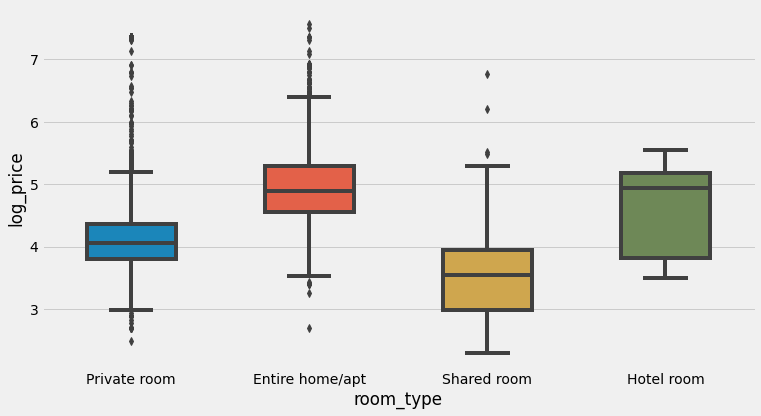

In [79]:
#Price distribution by room type.
sns.catplot(
    data=eda_df,
    x='room_type', y='log_price', kind='box',
    height=6, aspect=1.8, width=0.5
)
#Unsurprisingly Entire places tend to be the most expensive listings with shared rooms being the least expensive.

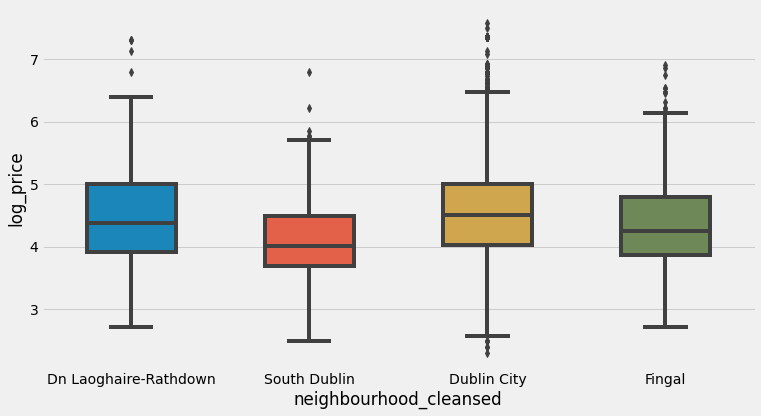

In [80]:
#Price distribution by room type.
sns.catplot(
    data=eda_df,
    x='neighbourhood_cleansed', y='log_price', kind='box',
    height=6, aspect=1.8, width=0.5
)
#All regions have a similar price however Dublin city has the largest scale, possibly due to the fact it has different property types as seen from variation analysis.

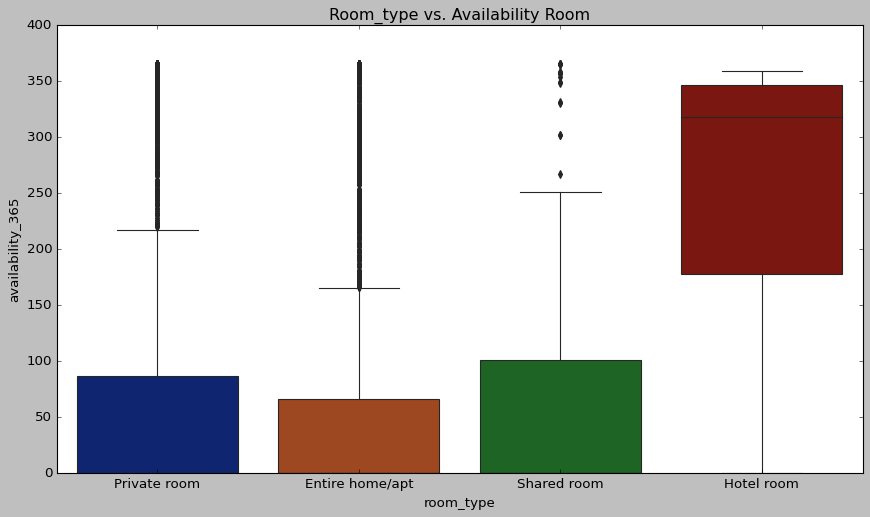

In [81]:
#The graph above shows the relationship between the availability room and  room type.
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Room_type vs. Availability Room")
sns.boxplot(data=eda_df, x='room_type',y='availability_365',palette="dark")
plt.show()

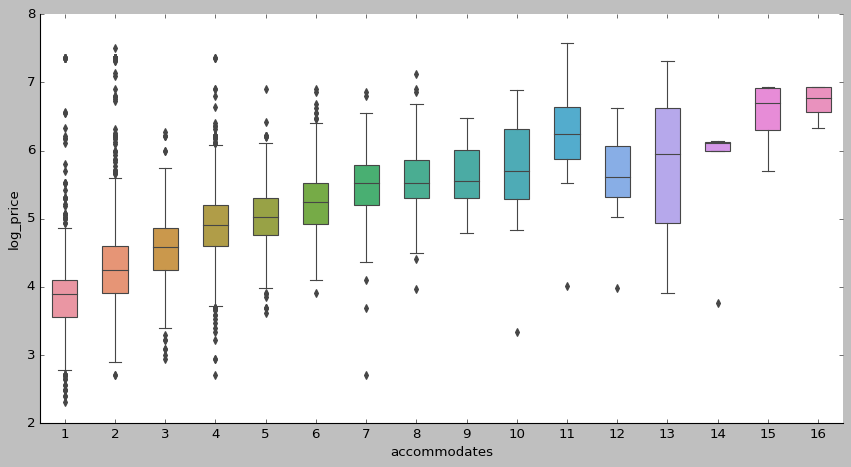

In [82]:
sns.catplot(
    data=eda_df, 
    x='accommodates', y='log_price', kind='box',
    height=6, aspect=1.8, width=0.5
)
#We clearly see that the price increases with increasing accommodates value in general.

In [83]:
eda_df.groupby(['availability_365'], as_index=False).agg(avg_price = ("price", "mean"), listings_qty= ('price','count'))


availability_365   avg_price  listings_qty
0                   0  126.385334          4282
1                   1  115.186047            43
2                   2   95.210526            19
3                   3  127.187500            16
4                   4  106.909091            11
..                ...         ...           ...
353               361  185.600000             5
354               362  207.750000             8
355               363  119.285714             7
356               364  160.777778             9
357               365  215.586207            58

[358 rows x 3 columns]

In [84]:
#Host characteristics
eda_df.groupby(['host_identity_verified'], as_index=False).agg(avg_price = ("price", "mean"), listings_qty= ('price','count'))
#unsurprisingly listings with a verified host tend to have a higher average price.

host_identity_verified   avg_price  listings_qty
0                     0.0  111.668993          2006
1                     1.0  137.242167          4947

In [85]:
eda_df.groupby(['instant_bookable'], as_index=False).agg(avg_price = ("price", "mean"), listings_qty= ('price','count'))
#Listings that are instantly bookable have a lower average price.

instant_bookable   avg_price  listings_qty
0                 0  136.429738          4654
1                 1  116.572858          2299

In [315]:
df.isna().sum()

host_since                          0
host_is_superhost                   0
host_listings_count                 0
host_has_profile_pic                0
host_identity_verified              0
neighbourhood_cleansed              0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                            0
beds                                0
price                               0
minimum_nights                      0
maximum_nights                      0
has_availability                    0
availability_365                    0
number_of_reviews                   0
number_of_reviews_l30d              0
first_review                     1419
last_review                      1419
review_scores_rating             1419
review_scores_accuracy           1564
review_scores_cleanliness        1563
review_scores_checkin            1570
review_scores_communication      1564
review_scores_location           1570
review_score

#Predictive Modelling 
Data mostly prepped only have to deal with null values within the reviewed columns. 
* first option drop null rows and run models
* Create a new column of has received review (boolean)
* third option impute using model
* second option bin ratings and (one-hot encode)

#Option 1:
###Dropping rows with no reviews
For the purpose of my analysis I will use the Root Mean squared error (RMSE) and R-squared value to compare the performance of each model. 

In [87]:
#Option 1: dropped rows with no review rating scores
#Doing this leads us to loose roughly 20% of our data but allows us to begin modelling.
df_dropped_nulls = df.dropna()
df_dropped_nulls.isna().sum()

host_since                       0
host_is_superhost                0
host_listings_count              0
host_has_profile_pic             0
host_identity_verified           0
neighbourhood_cleansed           0
property_type                    0
room_type                        0
accommodates                     0
bedrooms                         0
beds                             0
price                            0
minimum_nights                   0
maximum_nights                   0
has_availability                 0
availability_365                 0
number_of_reviews                0
number_of_reviews_l30d           0
first_review                     0
last_review                      0
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_communication      0
review_scores_location           0
review_scores_value              0
instant_bookable                 0
host_days_active    

In [88]:
#Must drop first review, last review and host_since for modelling but was used in EDA
df_dropped_nulls.drop(['first_review','last_review','host_since'], axis=1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [89]:
df_dropped_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5392 entries, 44077 to 53006324
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   host_is_superhost              5392 non-null   float64
 1   host_listings_count            5392 non-null   float64
 2   host_has_profile_pic           5392 non-null   float64
 3   host_identity_verified         5392 non-null   float64
 4   neighbourhood_cleansed         5392 non-null   object 
 5   property_type                  5392 non-null   object 
 6   room_type                      5392 non-null   object 
 7   accommodates                   5392 non-null   int64  
 8   bedrooms                       5392 non-null   float64
 9   beds                           5392 non-null   float64
 10  price                          5392 non-null   float64
 11  minimum_nights                 5392 non-null   int64  
 12  maximum_nights                 5392 non-

In [91]:
#We have 3 object columns in order for our models to run we must one hot encode them.
df_dummies = pd.get_dummies(df_dropped_nulls)
df_dummies

host_is_superhost  host_listings_count  host_has_profile_pic  \
id                                                                       
44077                   1.0                  3.0                   1.0   
85156                   1.0                  3.0                   1.0   
159889                  0.0                  0.0                   1.0   
162809                  1.0                  2.0                   1.0   
165828                  1.0                  5.0                   1.0   
...                     ...                  ...                   ...   
52850962                0.0                  1.0                   1.0   
52879135                0.0                  0.0                   1.0   
52898729                0.0                  0.0                   1.0   
52959358                0.0                  0.0                   1.0   
53006324                0.0                  0.0                   1.0   

          host_identity_verified  accommodates  bedrooms  beds  price  \
id                                                                      
44077                        1.0             2       1.0   2.0   65.0   
85156                        1.0             2       1.0   1.0   63.0   
159889                       1.0             1       1.0   1.0   45.0   
162809                       1.0             6       2.0   4.0   65.0   
165828                       1.0             5       1.0   3.0  100.0   
...                          ...           ...       ...   ...    ...   
52850962                     1.0             2       1.0   1.0  142.0   
52879135                     1.0             1       1.0   1.0   49.0   
52898729                     0.0             2       1.0   1.0  149.0   
52959358                     0.0             2       1.0   1.0  100.0   
53006324                     1.0             2       1.0   1.0   64.0   

          minimum_nights  maximum_nights  ...  \
id                                        ...   
44077                  3            1125  ...   
85156                  3              21  ...   
159889                 2              21  ...   
162809                 1              12  ...   
165828                 4             365  ...   
...                  ...             ...  ...   
52850962               1             365  ...   
52879135               1             365  ...   
52898729               1             365  ...   
52959358               2              30  ...   
53006324               1              14  ...   

          property_type_Private Room Apartment  \
id                                               
44077                                        0   
85156                                        0   
159889                                       0   
162809                                       0   
165828                                       0   
...                                        ...   
52850962                                     0   
52879135                                     1   
52898729                                     0   
52959358                                     0   
53006324                                     0   

          property_type_Private Room House  property_type_Private Room Other  \
id                                                                             
44077                                    1                                 0   
85156                                    1                                 0   
159889                                   1                                 0   
162809                                   1                                 0   
165828                                   0                                 0   
...                                    ...                               ...   
52850962                                 0                                 0   
52879135                                 0                                 0   
52898729

In [92]:
#Other than availability_365 and host_days_active, the remaining numerical features are all skewed and could benefit from log transformation
numerical_columns = ['accommodates', 'host_listings_count', 'bathrooms', 'bedrooms', 'beds', 'price', 'maximum_nights', 'minimum_nights', 
                     'number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                     'review_scores_communication', 'review_scores_location', 'review_scores_value']


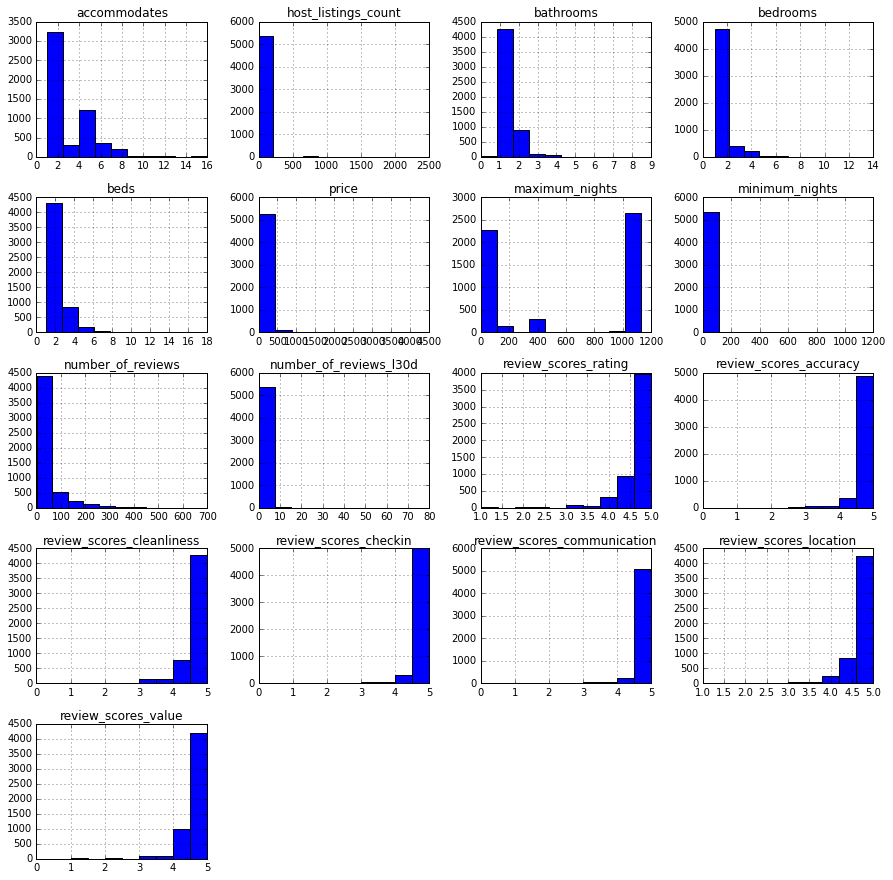

In [93]:
df_dummies[numerical_columns].hist(figsize=(15,15));

In [94]:
# Log transforming columns
for col in numerical_columns:
    df_dummies[col] = df_dummies[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    df_dummies[col] = np.log(df_dummies[col])

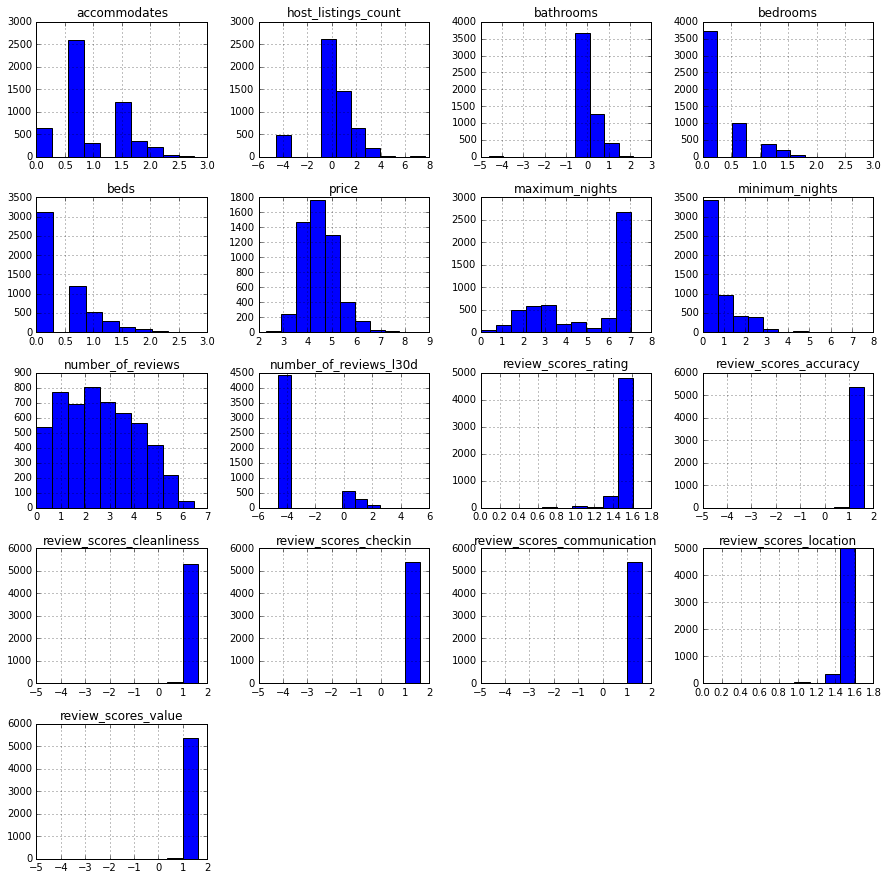

In [95]:
df_dummies[numerical_columns].hist(figsize=(15,15));
#Most importantly, however, the target variable price now appears much more normally distributed.

In [96]:
'''Finally, the predictive features X and the target feature y can be separated, and X will be scaled. StandardScaler from sklearn will be used, 
but the type of scaling used could be experimented with later to see if alternative versions yield better results.'''
# Separating X and y
X = df_dummies.drop('price', axis=1)
y = df_dummies['price']

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))
y = list(y)


In [97]:
# Splitting into train and test sets ***random state***
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape); print(X_test.shape)

(4313, 59)
(1079, 59)


###Baseline models
**NOTE:** Due to the presence of extreme outliers and skewness in the data set I chose to evaluate the model's accuracy on a mean squared error basis rather than a median absolute error basis, as I had transformed the numerical columns into the log of the columns. In turn dealing with the skewness within the dataset. 



In [98]:
from logging import root
from math import sqrt
from sklearn.metrics import mean_absolute_error
#Linear regression
#OLS
# Cross validate on 5 folds
cv = KFold(n_splits = 5)
linreg = LinearRegression()

# Store r2 and mean squared error of testing data for graphing purposes later
MSE =[]
R2 = []

for train, test in cv.split(X):
    # Fit linreg
    linreg.fit(X_train, y_train)
    
    #predict training
    y_predict_train = linreg.predict(X_train)
    # Predict and score testing
    y_predict_test = linreg.predict(X_test)
    R2.append(linreg.score(X_test, y_test))
    MSE.append(mean_squared_error(y_test, y_predict_test))

# Output and store scores after CV
lin_testing_set_score = np.mean(R2)
lin_mean_squared_error = np.mean(MSE)
print("Linear Regression")
print("\tR-squared training data:  " + str(round(r2_score(y_train, y_predict_train), 3)))
print("\tRoot MSE training data: " + str(round(sqrt(mean_squared_error(y_train,y_predict_train)),3)))
print('\tR-Squared on testing data: ' + str(round(lin_testing_set_score, 3)))
print('\tRoot Mean Squared Error on testing data: ' + str(round(sqrt(lin_mean_squared_error),3)))

Linear Regression
	R-squared training data:  0.582
	Root MSE training data: 0.459
	R-Squared on testing data: 0.516
	Root Mean Squared Error on testing data: 0.499


As we can see from the results the Linear regression model returns an R-squared of 51.6% and a RMSE of .499 this is a good base score to try improve upon using other models.

In [99]:
#Forward & Backward Selection
def processSubset(feature_set):
  #Fit model on feature set and calculate RSS
  model = sm.OLS(y,X[list(feature_set)])
  regr = model.fit()
  RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
  return {"model": regr, "RSS": RSS}

In [100]:
#Forward Selection
def forward(predictors):
  #Pull out predictors we still need to process
  remaining_predictors = [p for p in X.columns if p not in predictors]

  tic = time.time()
  results =[]

  for p in remaining_predictors:
    results.append(processSubset(predictors+[p]))

    #Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)

    #Chooose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    #return the best model, along with some other useful information about the model.
    return best_model

In [101]:
models_fwd = pd.DataFrame(columns=["RSS","model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):
  models_fwd.loc[i] = forward(predictors)
  predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  1 models on 1 predictors in 0.031073808670043945 seconds.
Processed  1 models on 2 predictors in 0.007467985153198242 seconds.
Processed  1 models on 3 predictors in 0.010731220245361328 seconds.
Processed  1 models on 4 predictors in 0.006807565689086914 seconds.
Processed  1 models on 5 predictors in 0.015106678009033203 seconds.
Processed  1 models on 6 predictors in 0.014374494552612305 seconds.
Processed  1 models on 7 predictors in 0.02541375160217285 seconds.
Processed  1 models on 8 predictors in 0.019253969192504883 seconds.
Processed  1 models on 9 predictors in 0.02044844627380371 seconds.
Processed  1 models on 10 predictors in 0.017817258834838867 seconds.
Processed  1 models on 11 predictors in 0.016828536987304688 seconds.
Processed  1 models on 12 predictors in 0.017676591873168945 seconds.
Processed  1 models on 13 predictors in 0.026006221771240234 seconds.
Processed  1 models on 14 predictors in 0.024469852447509766 seconds.
Processed  1 models on 15 predi

In [102]:
#print models y = Price in output
print(models_fwd.loc[1, "model"].summary())
print(models_fwd.loc[2, "model"].summary())
print(models_fwd.loc[10, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                            0.01210
Date:                Wed, 25 May 2022   Prob (F-statistic):                       0.912
Time:                        11:53:37   Log-Likelihood:                         -15846.
No. Observations:                5392   AIC:                                  3.169e+04
Df Residuals:                    5391   BIC:                                  3.170e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [103]:
#Backward Selection
def backward(predictors):
  tic = time.time()
  results = []
  for combo in itertools.combinations(predictors, len(predictors)-1):
    print(combo)
    results.append(processSubset(combo))

  #Wrap evertthing in nice dataframe
  models = pd.DataFrame(results)

  #Choose the model with the highest RSS
  best_model = models.loc[models['RSS'].argmin()]

  toc = time.time()
  print("Processed ", models.shape[0], "Models on ", len(predictors)-1, "predictors in ", (toc-tic), "seconds.")
  #return the best model
  return best_model

In [104]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))
tic = time.time()
predictors = X.columns

while(len(predictors) > 1):
  models_bwd.loc[len(predictors)-1]= backward(predictors)
  predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time: ", (toc-tic), "seconds.")

('host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'has_availability', 'availability_365', 'number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'host_days_active', 'bathrooms', 'tv', 'wifi', 'kitchen', 'heating', 'washer', 'laptop_friendly_workspace', 'family_kid_friendly', 'host_greets_you', 'garden', 'host_verified_email', 'host_verified_facebook', 'host_verified_google', 'host_verified_government_id', 'host_verified_identity_manual', 'host_verified_jumio', 'host_verified_phone', 'host_verified_reviews', 'host_verified_selfie', 'neighbourhood_cleansed_Dn Laoghaire-Rathdown', 'neighbourhood_cleansed_Dublin City', 'neighbourhood_cleansed_Fingal', 'neighbourhood_cleansed_South D

In [105]:
print(models_bwd.loc[1, "model"].summary())
print(models_fwd.loc[1, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.011
Model:                            OLS   Adj. R-squared (uncentered):              0.011
Method:                 Least Squares   F-statistic:                              58.23
Date:                Wed, 25 May 2022   Prob (F-statistic):                    2.74e-14
Time:                        11:54:59   Log-Likelihood:                         -15817.
No. Observations:                5392   AIC:                                  3.164e+04
Df Residuals:                    5391   BIC:                                  3.164e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

For this data it shows that backwward selection is giving (accomodates) as the best one variable predictor with forward selection giving (host_is_superhost)

In [106]:
print(models_bwd.loc[25, "model"].summary())
print(models_fwd.loc[25, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.014
Model:                            OLS   Adj. R-squared (uncentered):              0.009
Method:                 Least Squares   F-statistic:                              2.986
Date:                Wed, 25 May 2022   Prob (F-statistic):                    8.67e-07
Time:                        11:54:59   Log-Likelihood:                         -15809.
No. Observations:                5392   AIC:                                  3.167e+04
Df Residuals:                    5367   BIC:                                  3.183e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------

Backward selection performing better again 

In [107]:
print("------------")
print("Forward Selection:")
print("------------")
print(models_fwd.loc[58, "model"].params)

------------
Forward Selection:
------------
host_is_superhost                               0.022952
host_listings_count                             0.022802
host_has_profile_pic                            0.013787
host_identity_verified                          0.031409
accommodates                                    0.259015
bedrooms                                        0.146285
beds                                           -0.035209
minimum_nights                                 -0.017920
maximum_nights                                  0.008883
has_availability                               -0.010566
availability_365                                0.111640
number_of_reviews                              -0.069482
number_of_reviews_l30d                         -0.024006
review_scores_rating                            0.008862
review_scores_accuracy                          0.006033
review_scores_cleanliness                       0.051204
review_scores_checkin                      

In [108]:
print("------------")
print("Backward Selection:")
print("------------")
print(models_bwd.loc[58, "model"].params)

------------
Backward Selection:
------------
host_is_superhost                               0.022952
host_listings_count                             0.022802
host_has_profile_pic                            0.013787
host_identity_verified                          0.031409
accommodates                                    0.259015
bedrooms                                        0.146285
beds                                           -0.035209
minimum_nights                                 -0.017920
maximum_nights                                  0.008883
has_availability                               -0.010566
availability_365                                0.111640
number_of_reviews                              -0.069482
number_of_reviews_l30d                         -0.024006
review_scores_rating                            0.008862
review_scores_accuracy                          0.006033
review_scores_cleanliness                       0.051204
review_scores_checkin                     

It seems like a lot of the variables are having a negative impact on price prediction. I will now run more models and try achieve a better accuracy for predicting price. 

In [109]:
#Ridge Regression
# Tuning paramater values for Ridge
lambdas = 10.**np.array([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Perform Ridge regression using expanded set of predictors, 
# choose best regularization parameter lambda using 5-fold x-validation
cv = KFold(n_splits = 5)
ridge = RidgeCV(alphas = lambdas, fit_intercept = True, cv = 5)

# Store r2 and median absolute error
MSE =[]
R2 = []

# Find best score by cross validating over 5 folds
for train, test in cv.split(X):
    # Fit linreg
    ridge.fit(X_train, y_train)
    
    #predict training
    y_predict_train = ridge.predict(X_train)
    # Predict and score
    Y_predict = ridge.predict(X_test)
    R2.append(ridge.score(X_test, y_test))
    MSE.append(mean_squared_error(y_test, Y_predict))
    
# Output and store scores after CV
ridge_testing_set_score = np.mean(R2)
ridge_mean_squared_error = np.mean(MSE)
print("Ridge Regression")
print("\tR-squared training data:  " + str(round(r2_score(y_train, y_predict_train), 3)))
print("\tRoot MSE training data: " + str(round(sqrt(mean_squared_error(y_train,y_predict_train)), 3)))
print('\tR-squared testing data: ' + str(round(ridge_testing_set_score,3)))
print('\tRoot Mean Squared Error testing data: ' + str(round(sqrt(ridge_mean_squared_error),3)))


Ridge Regression
	R-squared training data:  0.581
	Root MSE training data: 0.46
	R-squared testing data: 0.52
	Root Mean Squared Error testing data: 0.497


In [110]:
# Perform Lasso regression using expanded set of predictors, 
# choose best regularization parameter lambda using 5-fold x-validation
cv = KFold(n_splits = 5)
lasso = LassoCV(alphas = lambdas, tol = 0.5, fit_intercept = True, cv = 5)

# Store r2 and median absolute error
MSE =[]
R2 = []

# Find best score by cross validating over 5 folds
for train, test in cv.split(X):
    # Fit linreg
    lasso.fit(X_train, y_train)
    
    #predict training
    y_predict_train = lasso.predict(X_train)
    # Predict and score
    Y_predict = lasso.predict(X_test)
    R2.append(lasso.score(X_test, y_test))
    MSE.append(mean_squared_error(y_test, Y_predict))

# Output and store scores after CV
lasso_testing_set_score = np.mean(R2)
lasso_mean_squared_error = np.mean(MSE)
print("Lasso Regression")
print("\tR-squared training data:  " + str(round(r2_score(y_train, y_predict_train), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train,y_predict_train)), 3)))
print('\tR-squared testing data: ' + str(round(lasso_testing_set_score,3)))
print('\tThe root mean squared error testing data: ' + str(round(sqrt(lasso_mean_squared_error),3)))

Lasso Regression
	R-squared training data:  0.565
	RMSE training data: 0.469
	R-squared testing data: 0.516
	The root mean squared error testing data: 0.499


###Ensemble models

In [111]:
from sklearn.ensemble import RandomForestRegressor
# Fit random forest
rf = RandomForestRegressor(oob_score = True)
rf.fit(X_train, y_train)

#predict training
y_predict_train = rf.predict(X_train)
# Predict and score RF
y_predict = rf.predict(X_test)
rf_testing_set_score = rf.score(X_test, y_test)
rf_mean_squared_error = mean_squared_error(y_test, y_predict)
print("Random Forest Regressor")
print("\tR-squared training data:  " + str(round(r2_score(y_train, y_predict_train), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train,y_predict_train)), 3)))
print('\tR-squared testing data: ' + str(round(rf_testing_set_score,3)))
print('\tThe root mean squared error testing data:  ' + str(round(sqrt(rf_mean_squared_error),3)))

Random Forest Regressor
	R-squared training data:  0.949
	RMSE training data: 0.16
	R-squared testing data: 0.619
	The root mean squared error testing data:  0.443


In [112]:
#Tuned random forest regressor
# Parameters to run grid search on
tuned_parameters = {
    "n_estimators": [10, 30, 50],
    "n_jobs": [-1],
   # "oob_score": [True],
    "max_features": [None, 'log2', 'auto']
}

# Run 3-fold CV grid search to tune hyperparameters
rf_tuned = GridSearchCV(RandomForestRegressor(), cv = 3, param_grid = tuned_parameters)

# Score model
preds = rf_tuned.fit(X_train, y_train)
best = rf_tuned.best_estimator_ 
y_predict_train = rf_tuned.predict(X_train)
y_predict = rf_tuned.predict(X_test)
rft_testing_set_score = rf_tuned.score(X_test, y_test)
rft_mean_squared_error = mean_squared_error(y_test, y_predict)

# Output score and model info
print('Tuned Random Forest Regressor')
print('\tThe best paramaters are:', rf_tuned.best_params_)
print("\tR-squared training data:  " + str(round(r2_score(y_train, y_predict_train), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train,y_predict_train)), 3)))
print('\tR-squared testing data: ' + str(round(rft_testing_set_score,3)))
print('\tThe root mean squared error testing data: ' + str(round(sqrt(rft_mean_squared_error),3)))

Tuned Random Forest Regressor
	The best paramaters are: {'max_features': 'auto', 'n_estimators': 50, 'n_jobs': -1}
	R-squared training data:  0.943
	RMSE training data: 0.17
	R-squared testing data: 0.607
	The root mean squared error testing data: 0.449


In [113]:
#AdaBoost Regressor ()
from sklearn.ensemble import AdaBoostRegressor
# Fit AdaBoost forest
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

y_predict_train = ada.predict(X_train)

# Predict and score adaboost
y_predict = ada.predict(X_test)
ada_testing_set_score = ada.score(X_test, y_test)
ada_mean_squared_error = mean_squared_error(y_test, y_predict)

#output score of model
print('AdaBoost Regressor')
print("\tR-squared training data:  " + str(round(r2_score(y_train, y_predict_train), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train,y_predict_train)), 3)))
print('\tThe R-squared testing data: ' + str(round(ada_testing_set_score,3)))
print('\tThe root mean squared error testing data: ' + str(round(sqrt(ada_mean_squared_error),3)))

AdaBoost Regressor
	R-squared training data:  0.337
	RMSE training data: 0.579
	The R-squared testing data: 0.261
	The root mean squared error testing data: 0.616


In [114]:
#AdaBoost Regressor (with Random Forest as Base Estimator)
from sklearn.ensemble import AdaBoostRegressor
# Fit AdaBoost forest
ada_rf = AdaBoostRegressor(base_estimator = rf)
ada_rf.fit(X_train, y_train)

y_predict_train = ada_rf.predict(X_train)

# Predict and score adaboost
y_predict = ada_rf.predict(X_test)
ada_rf_testing_set_score = ada_rf.score(X_test, y_test)
ada_rf_mean_squared_error = mean_squared_error(y_test, y_predict)

#output score of model
print('AdaBoost Regressor with RF')
print("\tR-squared training data:  " + str(round(r2_score(y_train, y_predict_train), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train,y_predict_train)), 3)))
print('\tThe R-squared testing data: ' + str(round(ada_rf_testing_set_score,3)))
print('\tThe root mean squared error testing data: ' + str(round(sqrt(ada_rf_mean_squared_error),3)))

AdaBoost Regressor with RF
	R-squared training data:  0.98
	RMSE training data: 0.101
	The R-squared testing data: 0.639
	The root mean squared error testing data: 0.431


In [115]:
#Tuned AdaBoost Regressor (with Decision Tree as Base Estimator)
# Parameters to run grid search on
tuned_parameters = {
    "n_estimators": [10, 25, 50, 100],
    "learning_rate": [0.01, 0.1, 1],
    "loss" : ['linear', 'square']
}

clf = GridSearchCV(AdaBoostRegressor(), cv=3, param_grid=tuned_parameters)
preds = clf.fit(X_train, y_train)
best = clf.best_estimator_ 
y_predict_train = clf.predict(X_train)
Y_predict = clf.predict(X_test)
clf_testing_set_score = clf.score(X_test, y_test)
clf_mean_sqrd_error = mean_squared_error(y_test, Y_predict)

# Output score and model info
print('Tuned AdaBoost Regressor')
print('\tThe best paramaters are:', clf.best_params_)
print("\tR-squared training data:  " + str(round(r2_score(y_train, y_predict_train), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train,y_predict_train)), 3)))
print('\tR-squared testing data: ' + str(round(clf_testing_set_score,3)))
print('\tThe root mean squared error testing data: ' + str(round(sqrt(clf_mean_sqrd_error),3)))

Tuned AdaBoost Regressor
	The best paramaters are: {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 10}
	R-squared training data:  0.549
	RMSE training data: 0.477
	R-squared testing data: 0.504
	The root mean squared error testing data: 0.505


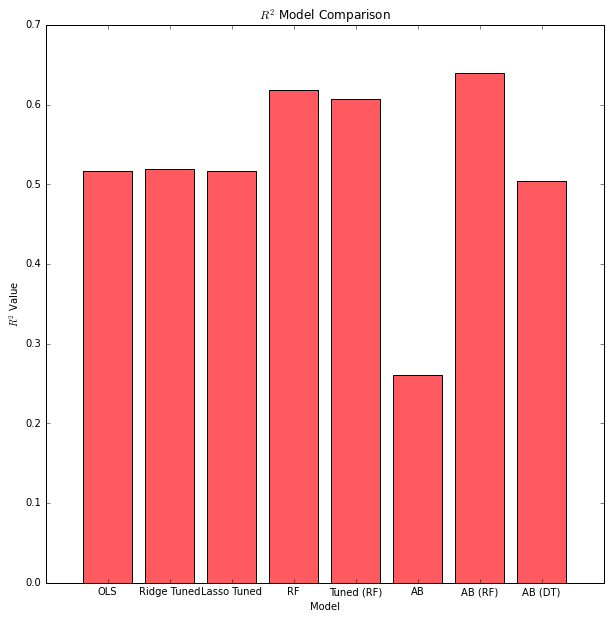

In [116]:
# Graph x and y axis values
labels = np.array(['OLS','Ridge Tuned','Lasso Tuned', 'RF', 'Tuned (RF)', 'AB', 'AB (RF)', 'AB (DT)'])
error_val = np.array([lin_testing_set_score, ridge_testing_set_score, lasso_testing_set_score, 
                      rf_testing_set_score, rft_testing_set_score, ada_testing_set_score, ada_rf_testing_set_score, 
                      clf_testing_set_score])

# Arrange bars
pos = np.arange(error_val.shape[0])
#srt = np.argsort(error_val)

# Plots R^2 bars across functions
plt.figure(figsize=(10,10))
plt.bar(pos, error_val, align = 'center', color=BNB_RED)
plt.xticks(pos, labels)
plt.xlabel('Model')
plt.ylabel('$R^2$ Value')
plt.title('$R^2$ Model Comparison')
plt.ylim(0.0,0.70)
plt.show()

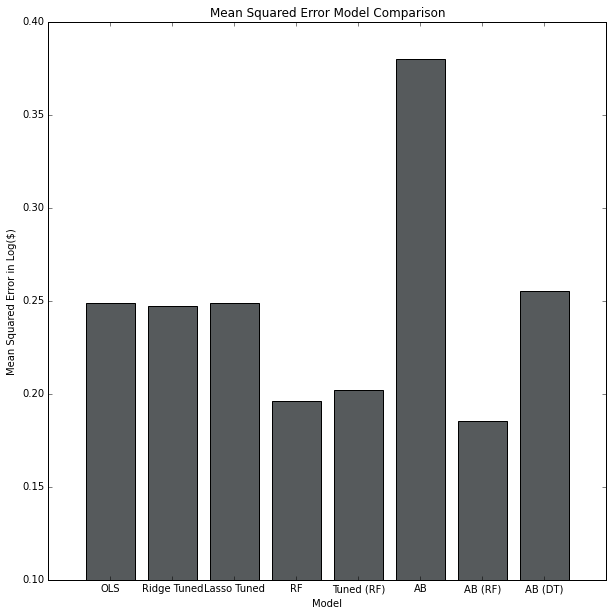

In [117]:
#MSE Chart
# Graph x and y axis values
labels = np.array(['OLS','Ridge Tuned','Lasso Tuned', 'RF', 'Tuned (RF)', 'AB', 'AB (RF)', 'AB (DT)'])
error_val = np.array([lin_mean_squared_error, ridge_mean_squared_error, lasso_mean_squared_error, 
                      rf_mean_squared_error, rft_mean_squared_error, ada_mean_squared_error, ada_rf_mean_squared_error,
                      clf_mean_sqrd_error])

# Arrange bars
pos = np.arange(error_val.shape[0])
#srt = np.argsort(error_val)

# Plots Mean Absolute Variance bars across functions
plt.figure(figsize=(10,10))
#plt.bar(pos, error_val[srt], align = 'center', color=BNB_BLUE)
#plt.xticks(pos, labels[srt])
plt.bar(pos, error_val, align = 'center', color=BNB_DARK_GRAY)
plt.xticks(pos, labels)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error in Log($)')
plt.title('Mean Squared Error Model Comparison')
plt.ylim(0.1,0.4)
plt.show()

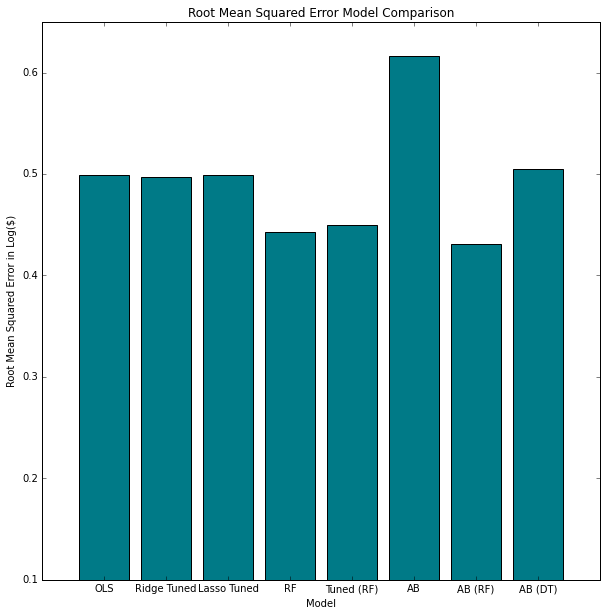

In [118]:
#RMSE Chart
# Graph x and y axis values
labels = np.array(['OLS','Ridge Tuned','Lasso Tuned', 'RF', 'Tuned (RF)', 'AB', 'AB (RF)', 'AB (DT)'])
error_val = np.array([sqrt(lin_mean_squared_error), sqrt(ridge_mean_squared_error), sqrt(lasso_mean_squared_error), 
                      sqrt(rf_mean_squared_error), sqrt(rft_mean_squared_error), sqrt(ada_mean_squared_error), sqrt(ada_rf_mean_squared_error),
                      sqrt(clf_mean_sqrd_error)])

# Arrange bars
pos = np.arange(error_val.shape[0])

# Plots Mean squared Variance bars across functions
plt.figure(figsize=(10,10))
plt.bar(pos, error_val, align = 'center', color=BNB_BLUE)
plt.xticks(pos, labels)
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error in Log($)')
plt.title('Root Mean Squared Error Model Comparison')
plt.ylim(0.1,0.65)
plt.show()
#Adaboost with Random forest as base estimator is best model at this stage.

###Neural Network
In this section several machine learning and deep learning models will be built in order to predict an Airbnb listing's price.

<br> I will still use RMSE (for loss) and r squared (for accuracy) as the evaluation metrics.



In [119]:
'''Before building a neural network, a vanilla XGBoost model will be used to predict price, in order to provide a baseline level of accuracy and a 
measure of feature importance. This most likely provides the best achievable accuracy using machine learning models (other than possible small accuracy
increases from hyper-parameter tuning) due to XGBoost's superior performance'''
#XGboost model
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor(silent=True)
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print('Vanilla XGBoost')
print(f"\tTime taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\tR-Squared on Training data: ", round(r2_score(y_train, training_preds_xgb_reg),4))
print("\tRoot Mean Squared Error on training data: ", round(sqrt(mean_squared_error(y_train, training_preds_xgb_reg)),4))
print("\tR-Squared on testing data: ", round(r2_score(y_test, val_preds_xgb_reg),4))
print("\tRoot Mean Squared Error on testing data: ", round(sqrt(mean_squared_error(y_test, val_preds_xgb_reg)),4))


Vanilla XGBoost
	Time taken to run: 0.0 minutes
	R-Squared on Training data:  0.709
	Root Mean Squared Error on training data:  0.3832
	R-Squared on testing data:  0.6218
	Root Mean Squared Error on testing data:  0.4409


Roughly a quarter of the features have very little importance (score of 0). and could potentially be removed (although they will not be for the deep learning modeling part of this project, as they may have interactions with other features).<br>
Top 5 features of importance:

*   Room type entire home/apt
*   Accomodates
*   Bedrooms
*   Host listings count
*   Property type shared room house

<br>it is not surprising that the most important feature is how many people the property accommodates, as that's one of the main things you would use to search for properties with in the first place.

<br>it is also unsurprising that features related to listing type i.e. room type and property type are important as these are usually specified by users when searching for accomodation. With the more private types being expensive usually.

<br>It is perhaps more surprising that the fourth most important feature is related to how many other listings the host manages on Airbnb, rather than the listing itself. However, this does not mean that a host that manages more properties will result in a listing gaining higher prices. Firstly, the data appears to be somewhat skewed by a few very large property managers. Secondly, the relationship is with the advertised prices set, rather than actual prices achieved, suggesting that if anything more experienced hosts tend to set (rather than necessarily achieve) higher prices. And thirdly, we cannot necessarily imply a causative relationship - it could be that more experienced multi-listing hosts (especially Airbnb property management companies) tend to take on more expensive properties (which is indeed the case for some, e.g. One Fine Stay)


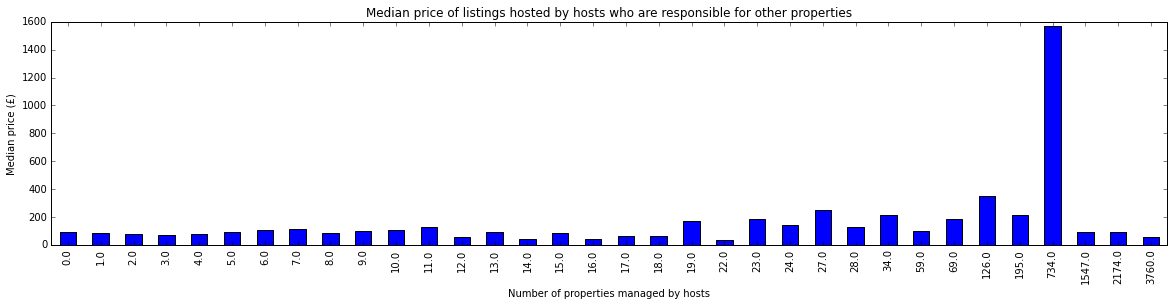

In [120]:
# Median price for different host listing counts
plt.figure()
df.groupby('host_listings_count').price.median().plot(figsize=(20,4), kind='bar')
plt.title('Median price of listings hosted by hosts who are responsible for other properties')
plt.xlabel('Number of properties managed by hosts')
plt.ylabel('Median price (£)');

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7680      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 106,753
Trainable params: 106,753
Non-trainable params: 0
_________________________________________________________________
None


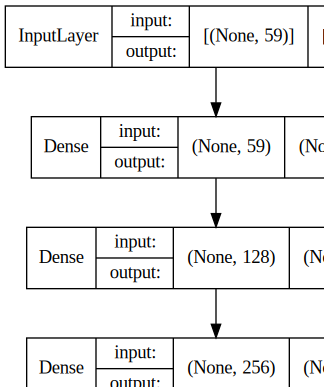

In [121]:
#Three layer neural network
'''For the initial version of the neural network, a relatively shallow three layer NN will be created. It will consist of densely-connected layers,
and use a relu activation function for the hidden layers and a linear activation function for the output layer, as it is being used for a regression task.
The loss function will be mean squared error (again, because this is for regression).'''
# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn2.summary())

# Visualising the neural network
SVG(model_to_dot(nn2, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

In [122]:
# Training the model
nn2_start = time.time()

nn2_history = nn2.fit(X_train,
                  np.log(y_train),
                  epochs=100,
                  batch_size=256,
                  validation_split = 0.1)

nn2_end = time.time()

print(f"Time taken to run: {round((nn2_end - nn2_start)/60,1)} minutes")

Epoch 1/100
16/16 [==============================] - 1s 25ms/step - loss: 0.6634 - mean_squared_error: 0.6634 - val_loss: 0.3542 - val_mean_squared_error: 0.3542
Epoch 2/100
16/16 [==============================] - 0s 11ms/step - loss: 0.1137 - mean_squared_error: 0.1137 - val_loss: 0.1270 - val_mean_squared_error: 0.1270
Epoch 3/100
16/16 [==============================] - 0s 11ms/step - loss: 0.0425 - mean_squared_error: 0.0425 - val_loss: 0.0977 - val_mean_squared_error: 0.0977
Epoch 4/100
16/16 [==============================] - 0s 10ms/step - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.1042 - val_mean_squared_error: 0.1042
Epoch 5/100
16/16 [==============================] - 0s 10ms/step - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0965 - val_mean_squared_error: 0.0965
Epoch 6/100
16/16 [==============================] - 0s 11ms/step - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0918 - val_mean_squared_error: 0.0918
Epoch 7/100
16/16 [=========

In [123]:
#RMSE and r squared values
y_test_pred = nn2.predict(X_test)
y_train_pred = nn2.predict(X_train)
print('Three-layer Neural Network')
print("\tR-Squared on Training data: ", round(r2_score(y_train, y_train_pred),4))
print("\tMean Squared Error on training data: ", round(sqrt(mean_squared_error(y_train, y_train_pred)),4))
print("\tR-Squared on testing data: ", round(r2_score(y_test, y_test_pred),4))
print("\tMean Squared Error on testing data: ", round(sqrt(mean_squared_error(y_test, y_test_pred)),4))
#The neural network performs the worst of all model and therefore will not be taken further is most likely due to the fact for neural networks to work they need to be passed masses of data from datawarehouses.

Three-layer Neural Network
	R-Squared on Training data:  -17.727
	Mean Squared Error on training data:  3.0738
	R-Squared on testing data:  -17.6139
	Mean Squared Error on testing data:  3.093


###Tuning XGBoost

In [124]:
#As a result I will take the best performing model (Vanilla XGBoost) and try to immprove its accuracies.
#XGboost model using grid search 
#in order to tune the XGBoost, I first need to build DMatrices for the model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


# Parameters to run grid search on
params = {
    # Parameters that we are going to tune.
    'max_depth':5,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}
params['eval_metric'] = "rmse"
num_boost_round = 2000

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=12
)

print("Best RMSE: {:.3f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))


[12:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:2.88599
Will train until Test-rmse hasn't improved in 12 rounds.
[1]	Test-rmse:2.05392
[2]	Test-rmse:1.48209
[3]	Test-rmse:1.0945
[4]	Test-rmse:0.839305
[5]	Test-rmse:0.67963
[6]	Test-rmse:0.579175
[7]	Test-rmse:0.522535
[8]	Test-rmse:0.490385
[9]	Test-rmse:0.469552
[10]	Test-rmse:0.454297
[11]	Test-rmse:0.44611
[12]	Test-rmse:0.441948
[13]	Test-rmse:0.439388
[14]	Test-rmse:0.437821
[15]	Test-rmse:0.437145
[16]	Test-rmse:0.435473
[17]	Test-rmse:0.434646
[18]	Test-rmse:0.43458
[19]	Test-rmse:0.43352
[20]	Test-rmse:0.434105
[21]	Test-rmse:0.435081
[22]	Test-rmse:0.432712
[23]	Test-rmse:0.431757
[24]	Test-rmse:0.431603
[25]	Test-rmse:0.432211
[26]	Test-rmse:0.432821
[27]	Test-rmse:0.432804
[28]	Test-rmse:0.432308
[29]	Test-rmse:0.433072
[30]	Test-rmse:0.433525
[31]	Test-rmse:0.432407
[32]	Test-rmse:0.433794
[33]	Test-rmse:0.434755
[34]	Test-rmse:0.43

In [125]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10
)
cv_results

[12:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0          2.878045        0.002247        2.879172       0.011300
1          2.044253        0.001870        2.046320       0.012152
2          1.468988        0.002056        1.472788       0.013876
3          1.076413        0.002231        1.084147       0.017305
4          0.813235        0.002983        0.825469       0.018870
5          0.642503        0.003613        0.658658       0.021411
6          0.535069        0.004214        0.557938       0.023897
7          0.469511        0.003658        0.498750       0.024092
8          0.429817        0.003059        0.466744       0.023266
9          0.404576        0.003337        0.448546       0.022020
10         0.389047        0.004572        0.439455       0.022490
11         0.378256        0.003874        0.434009       0.022522
12         0.370312        0.003482        0.431683       0.022851
13         0.364586        0.003142        0.429862       0.021699
14         0.358539        0.003227        0.429088       0.021530
15         0.354751        0.003383        0.427370       0.021565
16         0.349465        0.003660        0.426944       0.020899
17         0.345998        0.003621        0.425717       0.020804
18         0.342274        0.004309        0.425714       0.020913
19         0.337905        0.003813        0.426190       0.020836
20         0.335167        0.003584        0.425708       0.021235
21         0.332275        0.003448        0.425451       0.021077
22         0.329874        0.002942        0.425219       0.021022
23         0.326832        0.003665        0.425311       0.020759
24         0.324020        0.004425        0.425443       0.020583
25         0.322005        0.005109        0.425651       0.020786
26         0.319884        0.004589        0.425375       0.020613
27         0.316969        0.004704        0.424646       0.020793

In [126]:
cv_results['test-rmse-mean'].min()

0.42464599999999997

In [127]:
# You can try wider intervals with a larger step between
# each value and then narrow it down. Here after several
# iteration I found that the optimal value was in the
# following ranges.
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [128]:

# Define initial best params and RMSE
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_rmse= cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=9, min_child_weight=5
[12:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 0.4288964 for 17 rounds
CV with max_depth=9, min_child_weight=6
[12:01:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[

In [129]:
#We get the best score with a max_depth of 10 and min_child_weight of 6, so let's update our params
params['max_depth'] = 9
params['min_child_weight'] = 5

gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(6,10)]
    for colsample in [i/10. for i in range(6,10)]
]

In [130]:
min_rmse = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with subsample=0.9, colsample=0.9
[12:01:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 0.431994 for 14 rounds
CV with subsample=0.9, colsample=0.8
[12:01:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:3

In [131]:
params['subsample'] = .9
params['colsample_bytree'] = .6
# This can take some time…
min_rmse = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics=['rmse'],
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds\n".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

CV with eta=0.3
[12:02:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 0.4308604 for 22 rounds

CV with eta=0.2
[12:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:06] WARNING: /workspace/src/objective/reg

In [132]:
params['eta'] = .01

In [133]:
#Here is how the final dictionary of parameters looks like after running the cross validation results:
params
{'colsample_bytree': .6,
 'eta': 0.01,
 'eval_metric': 'rmse',
 'max_depth': 9,
 'min_child_weight': 5,
 'objective': 'reg:linear',
 'subsample': 0.9}

{'colsample_bytree': 0.6,
 'eta': 0.01,
 'eval_metric': 'rmse',
 'max_depth': 9,
 'min_child_weight': 5,
 'objective': 'reg:linear',
 'subsample': 0.9}

In [134]:
#Finally lets train our tuned model and test its performance using test data
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Best RMSE: {:.3f} in {} rounds".format(model.best_score, model.best_iteration+1))

[12:04:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:4.04134
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:4.00182
[2]	Test-rmse:3.96262
[3]	Test-rmse:3.924
[4]	Test-rmse:3.88558
[5]	Test-rmse:3.84771
[6]	Test-rmse:3.81007
[7]	Test-rmse:3.77282
[8]	Test-rmse:3.73592
[9]	Test-rmse:3.69945
[10]	Test-rmse:3.66329
[11]	Test-rmse:3.62754
[12]	Test-rmse:3.59222
[13]	Test-rmse:3.55726
[14]	Test-rmse:3.5226
[15]	Test-rmse:3.48834
[16]	Test-rmse:3.4545
[17]	Test-rmse:3.42075
[18]	Test-rmse:3.38755
[19]	Test-rmse:3.35451
[20]	Test-rmse:3.322
[21]	Test-rmse:3.28964
[22]	Test-rmse:3.25771
[23]	Test-rmse:3.22616
[24]	Test-rmse:3.195
[25]	Test-rmse:3.16399
[26]	Test-rmse:3.13332
[27]	Test-rmse:3.10306
[28]	Test-rmse:3.07307
[29]	Test-rmse:3.0435
[30]	Test-rmse:3.01394
[31]	Test-rmse:2.98489
[32]	Test-rmse:2.95596
[33]	Test-rmse:2.92735
[34]	Test-rmse:2.89922
[35]	Test-rmse:2.87123
[36]	Te

In [135]:
#lets see what are the most influential features when predicting price.
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

weight
property_type_Shared Room Other               0.000000
host_has_profile_pic                          0.000000
property_type_Shared Room Apartment           0.000000
property_type_Private Room Apartment          0.000000
property_type_Other                           0.000000
neighbourhood_cleansed_Dn Laoghaire-Rathdown  0.000000
host_verified_selfie                          0.000000
host_verified_reviews                         0.000000
host_verified_phone                           0.000000
host_verified_jumio                           0.000000
wifi                                          0.000000
property_type_Entire Apartment                0.000475
family_kid_friendly                           0.000542
host_verified_identity_manual                 0.000887
host_is_superhost                             0.001056
host_verified_government_id                   0.001353
garden                                        0.002066
instant_bookable                              0.002500
kitchen                                       0.003086
host_verified_google                          0.003228
number_of_reviews_l30d                        0.003410
heating                                       0.003582
host_verified_facebook                        0.003698
beds                                          0.003782
host_verified_email                           0.003791
neighbourhood_cleansed_Fingal                 0.004178
review_scores_checkin                         0.004181
property_type_Entire House                    0.004263
review_scores_accuracy                        0.004591
review_scores_communication                   0.004783
host_identity_verified                        0.005217
maximum_nights                                0.005455
laptop_friendly_workspace                     0.006014
host_days_active                              0.006641
number_of_reviews                             0.006690
review_scores_value                           0.006870
review_scores_rating                          0.007200
property_type_Entire Other                    0.007591
room_type_Hotel room                          0.007848
minimum_nights                                0.008107
property_type_Private Room House              0.008221
host_greets_you                               0.008976
washer                                        0.010436
bathrooms                                     0.010503
has_availability                              0.011092
room_type_Private room                        0.011650
review_scores_cleanliness                     0.011800
neighbourhood_cleansed_South Dublin           0.012740
tv                                            0.014045
review_scores_location                        0.014974
room_type_Shared room                         0.015519
neighbourhood_cleansed_Dublin City            0.015782
availability_365                              0.016136
property_type_Private Room Other              0.023849
property_type_Shared Room House               0.024787
host_listings_count                           0.030272
bedrooms                                      0.074230
accommodates                                  0.122938
room_type_Entire home/apt                     0.438966

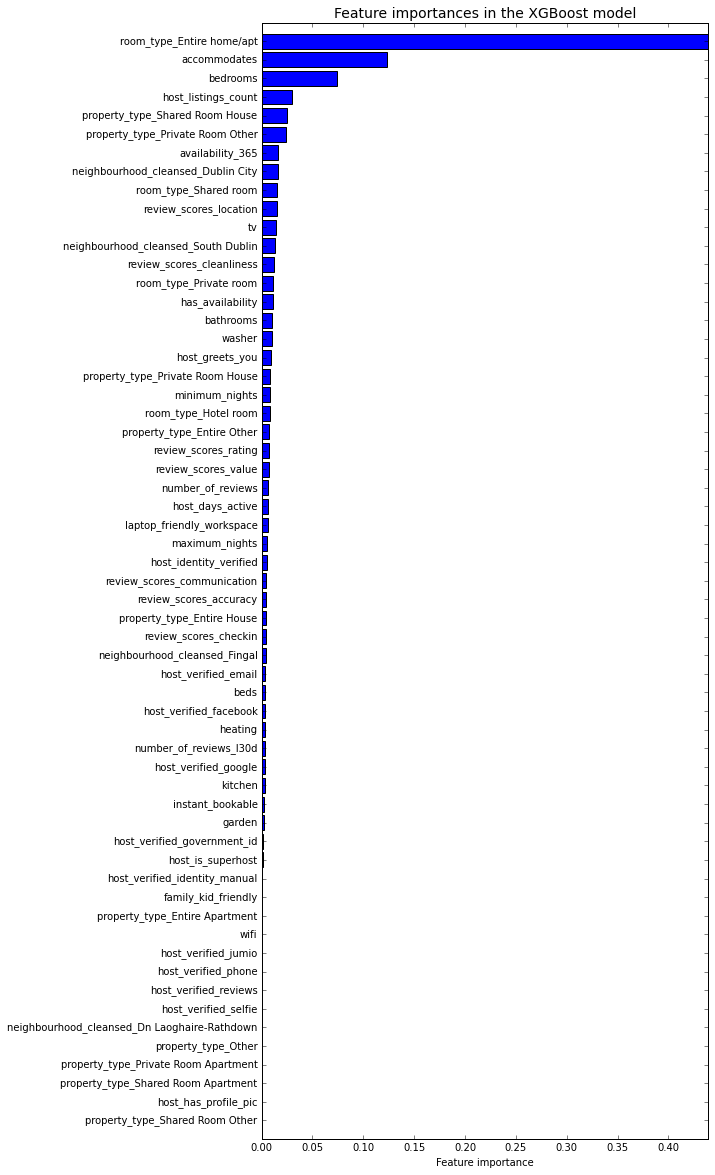

In [136]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [137]:
top5Features = X_train[['room_type_Entire home/apt', 'accommodates', 'bedrooms', 'host_listings_count', 'property_type_Shared Room House', 'property_type_Shared Room Other', 'availability_365', 'neighbourhood_cleansed_Dublin City', 'room_type_Shared room', 'review_scores_location','tv', 'neighbourhood_cleansed_South Dublin', 'review_scores_cleanliness', 'room_type_Private room', 'has_availability', 'bathrooms', 'washer', 'host_greets_you', 'property_type_Private Room House', 'minimum_nights']]
top5F = X_test[['room_type_Entire home/apt', 'accommodates', 'bedrooms', 'host_listings_count', 'property_type_Shared Room House', 'property_type_Shared Room Other', 'availability_365', 'neighbourhood_cleansed_Dublin City', 'room_type_Shared room', 'review_scores_location','tv', 'neighbourhood_cleansed_South Dublin', 'review_scores_cleanliness', 'room_type_Private room', 'has_availability', 'bathrooms', 'washer', 'host_greets_you', 'property_type_Private Room House', 'minimum_nights']]
top5Features

room_type_Entire home/apt  accommodates  bedrooms  host_listings_count  \
2312                  -0.997407     -0.457458 -0.621585             0.277653   
2485                   1.002600      0.778269 -0.621585            -0.117674   
2909                   1.002600      0.265396 -0.621585             1.782803   
2606                   1.002600      0.265396 -0.621585            -0.117674   
1736                  -0.997407     -0.457458 -0.621585            -0.117674   
...                         ...           ...       ...                  ...   
5218                   1.002600      1.176085  1.818931            -0.117674   
4060                   1.002600      1.775940  2.458003            -0.117674   
1346                   1.002600      0.778269  0.918209            -0.117674   
3454                   1.002600      1.176085  1.818931            -0.117674   
3582                   1.002600      0.778269  0.918209            -0.117674   

      property_type_Shared Room House  property_type_Shared Room Other  \
2312                        -0.117151                        -0.036054   
2485                        -0.117151                        -0.036054   
2909                        -0.117151                        -0.036054   
2606                        -0.117151                        -0.036054   
1736                        -0.117151                        -0.036054   
...                               ...                              ...   
5218                        -0.117151                        -0.036054   
4060                        -0.117151                        -0.036054   
1346                        -0.117151                        -0.036054   
3454                        -0.117151                        -0.036054   
3582                        -0.117151                        -0.036054   

      availability_365  neighbourhood_cleansed_Dublin City  \
2312         -0.566360                            0.559929   
2485         -0.566360                            0.559929   
2909          0.818739                            0.559929   
2606         -0.566360                            0.559929   
1736         -0.566360                            0.559929   
...                ...                                 ...   
5218         -0.566360                            0.559929   
4060         -0.566360                           -1.785942   
1346         -0.566360                            0.559929   
3454         -0.566360                            0.559929   
3582         -0.566360                            0.559929   

      room_type_Shared room  review_scores_location        tv  \
2312              -0.125798                0.010131 -1.350746   
2485              -0.125798               -0.122331  0.740331   
2909              -0.125798               -0.055888  0.740331   
2606              -0.125798                0.606821  0.740331   
1736              -0.125798                0.119236 -1.350746   
...                     ...                     ...       ...   
5218              -0.125798                0.606821  0.740331   
4060              -0.125798                0.032045  0.740331   
1346              -0.125798                0.075732  0.740331   
3454              -0.125798               -1.075894  0.740331   
3582              -0.125798                0.606821  0.740331   

      neighbourhood_cleansed_South Dublin  review_scores_cleanliness  \
2312                            -0.199305                   0.301319   
2485                            -0.199305                  -0.344813   
2909                            -0.199305                   0.185013   
2606                            -0.199305                   0.380048   
1736                            -0.199305                  -0.038265   
...                                   ...                        ...   
5218                            -0.199305                   0.157724   
4060                            -0.199305             

In [138]:
'''Before building a neural network, a vanilla XGBoost model will be used to predict price, in order to provide a baseline level of accuracy and a 
measure of feature importance. This most likely provides the best achievable accuracy using machine learning models (other than possible small accuracy
increases from hyper-parameter tuning) due to XGBoost's superior performance'''
#XGboost model
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor(silent=True)
xgb_reg.fit(top5Features, y_train)
training_preds_xgb_reg = xgb_reg.predict(top5Features)
val_preds_xgb_reg = xgb_reg.predict(top5F)

xgb_reg_end = time.time()

print('Top 20 Features XGBoost')
print(f"\tTime taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\tR-Squared on Training data: ", round(r2_score(y_train, training_preds_xgb_reg),4))
print("\tRoot Mean Squared Error on training data: ", round(sqrt(mean_squared_error(y_train, training_preds_xgb_reg)),4))
print("\tR-Squared on testing data: ", round(r2_score(y_test, val_preds_xgb_reg),4))
print("\tRoot Mean Squared Error on testing data: ", round(sqrt(mean_squared_error(y_test, val_preds_xgb_reg)),4))


Top 20 Features XGBoost
	Time taken to run: 0.0 minutes
	R-Squared on Training data:  0.6878
	Root Mean Squared Error on training data:  0.3969
	R-Squared on testing data:  0.603
	Root Mean Squared Error on testing data:  0.4517


#Option 2: Create reviewed column yes/no
Benefit: I don't lose any rows of data.

In [139]:
df.isna().sum()

host_since                          0
host_is_superhost                   0
host_listings_count                 0
host_has_profile_pic                0
host_identity_verified              0
neighbourhood_cleansed              0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                            0
beds                                0
price                               0
minimum_nights                      0
maximum_nights                      0
has_availability                    0
availability_365                    0
number_of_reviews                   0
number_of_reviews_l30d              0
first_review                     1419
last_review                      1419
review_scores_rating             1419
review_scores_accuracy           1564
review_scores_cleanliness        1563
review_scores_checkin            1570
review_scores_communication      1564
review_scores_location           1570
review_score

In [140]:
#Creating a column where if review score value is null the new column gets a 0.0 (meaning that the host has not import received a review)
#***review score or review ...... is null***
import numpy as np
df['property_has_review']=np.where(df['review_scores_value'].isna(), 0.0, 1.0)
df[['review_scores_rating','review_scores_value','property_has_review']]

review_scores_rating  review_scores_value  property_has_review
id                                                                      
44077                     4.77                 4.82                  1.0
85148                     0.00                  NaN                  0.0
85156                     4.79                 4.80                  1.0
159889                    4.75                 4.74                  1.0
162809                    4.83                 4.84                  1.0
...                        ...                  ...                  ...
53159314                   NaN                  NaN                  0.0
53160612                   NaN                  NaN                  0.0
53177641                   NaN                  NaN                  0.0
53178928                   NaN                  NaN                  0.0
53180353                   NaN                  NaN                  0.0

[6965 rows x 3 columns]

In [141]:
#drop review columns with the null data 
df_has_review = df.drop(['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication', 'review_scores_location', 'review_scores_value', 'first_review', 'last_review', 'host_since'], axis = 1)

In [142]:
#view head of the data 
df_has_review.head()

host_is_superhost  host_listings_count  host_has_profile_pic  \
id                                                                     
44077                 1.0                  3.0                   1.0   
85148                 0.0                  1.0                   1.0   
85156                 1.0                  3.0                   1.0   
159889                0.0                  0.0                   1.0   
162809                1.0                  2.0                   1.0   

        host_identity_verified neighbourhood_cleansed       property_type  \
id                                                                          
44077                      1.0  Dn Laoghaire-Rathdown  Private Room House   
85148                      0.0           South Dublin  Private Room House   
85156                      1.0  Dn Laoghaire-Rathdown  Private Room House   
159889                     1.0            Dublin City  Private Room House   
162809                     1.0  Dn Laoghaire-Rathdown  Private Room House   

           room_type  accommodates  bedrooms  beds  ...  host_verified_email  \
id                                                  ...                        
44077   Private room             2       1.0   2.0  ...                  1.0   
85148   Private room             2       1.0   1.0  ...                  1.0   
85156   Private room             2       1.0   1.0  ...                  1.0   
159889  Private room             1       1.0   1.0  ...                  1.0   
162809  Private room             6       2.0   4.0  ...                  1.0   

        host_verified_facebook  host_verified_google  \
id                                                     
44077                      1.0                   0.0   
85148                      0.0                   0.0   
85156                      1.0                   0.0   
159889                     0.0                   0.0   
162809                     0.0                   0.0   

        host_verified_government_id  host_verified_identity_manual  \
id                                                                   
44077                           1.0                            1.0   
85148                           0.0                            0.0   
85156                           1.0                            1.0   
159889                          1.0                            1.0   
162809                          1.0                            0.0   

        host_verified_jumio  host_verified_phone  host_verified_reviews  \
id                                                                        
44077                   1.0                  1.0                    1.0   
85148                   0.0                  1.0                    1.0   
85156                   1.0                  1.0                    1.0   
159889                  0.0                  1.0                    1.0   
162809                  1.0                  1.0                    1.0   

        host_verified_selfie  property_has_review  
id                                                 
44077                    1.0                  1.0  
85148                    0.0                  0.0  
85156                    1.0                  1.0  
159889                   1.0                  1.0  
162809                   0.0                  1.0  

[5 rows x 39 columns]

In [143]:
#check that all nulls are gone
df_has_review.isna().sum()

host_is_superhost                0
host_listings_count              0
host_has_profile_pic             0
host_identity_verified           0
neighbourhood_cleansed           0
property_type                    0
room_type                        0
accommodates                     0
bedrooms                         0
beds                             0
price                            0
minimum_nights                   0
maximum_nights                   0
has_availability                 0
availability_365                 0
number_of_reviews                0
number_of_reviews_l30d           0
instant_bookable                 0
host_days_active                 0
bathrooms                        0
tv                               0
wifi                             0
kitchen                          0
heating                          0
washer                           0
laptop_friendly_workspace        0
family_kid_friendly              0
host_greets_you                  0
garden              

In [144]:
#We have 4 object columns in order for our models to run we must one hot encode them.
df_has_review_dummies = pd.get_dummies(df_has_review)
df_has_review_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6965 entries, 44077 to 53180353
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_is_superhost                             6965 non-null   float64
 1   host_listings_count                           6965 non-null   float64
 2   host_has_profile_pic                          6965 non-null   float64
 3   host_identity_verified                        6965 non-null   float64
 4   accommodates                                  6965 non-null   int64  
 5   bedrooms                                      6965 non-null   float64
 6   beds                                          6965 non-null   float64
 7   price                                         6965 non-null   float64
 8   minimum_nights                                6965 non-null   int64  
 9   maximum_nights                                6965 non-

In [145]:
#Other than availability_365 and host_days_active, the remaining numerical features are all skewed and could benefit from log transformation
has_review_numerical_columns = ['accommodates', 'host_listings_count', 'bathrooms', 'bedrooms', 'beds', 'price', 'maximum_nights', 'minimum_nights', 
                     'number_of_reviews', 'number_of_reviews_l30d']

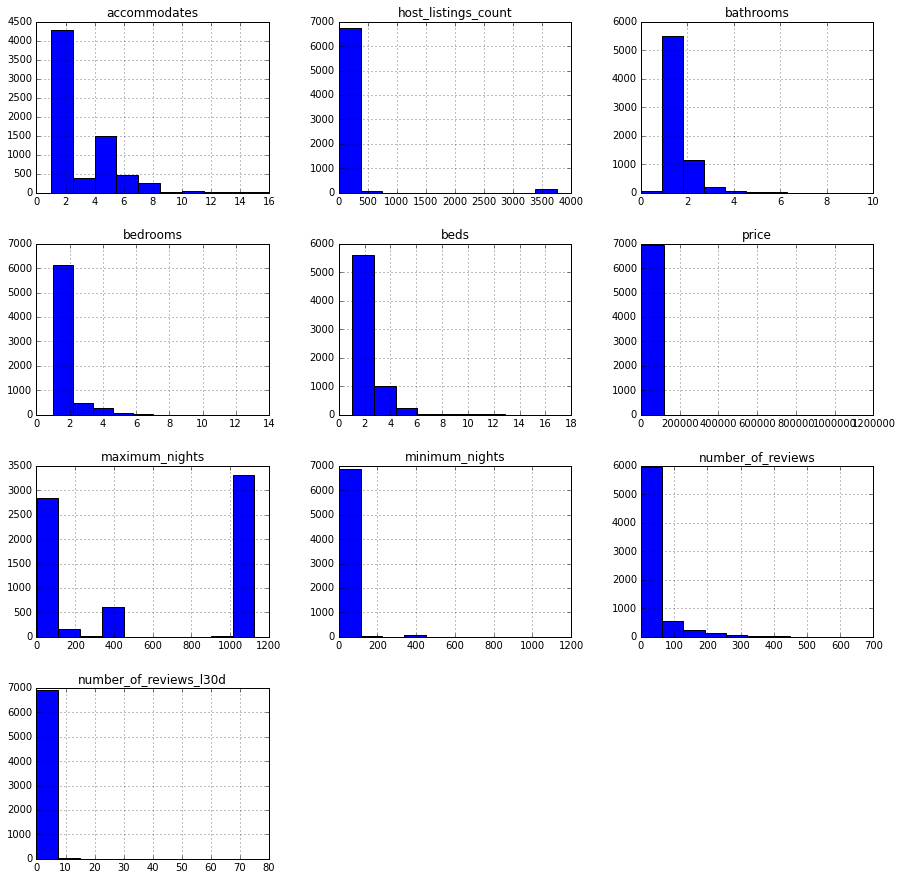

In [146]:
df_has_review_dummies[has_review_numerical_columns].hist(figsize=(15,15));

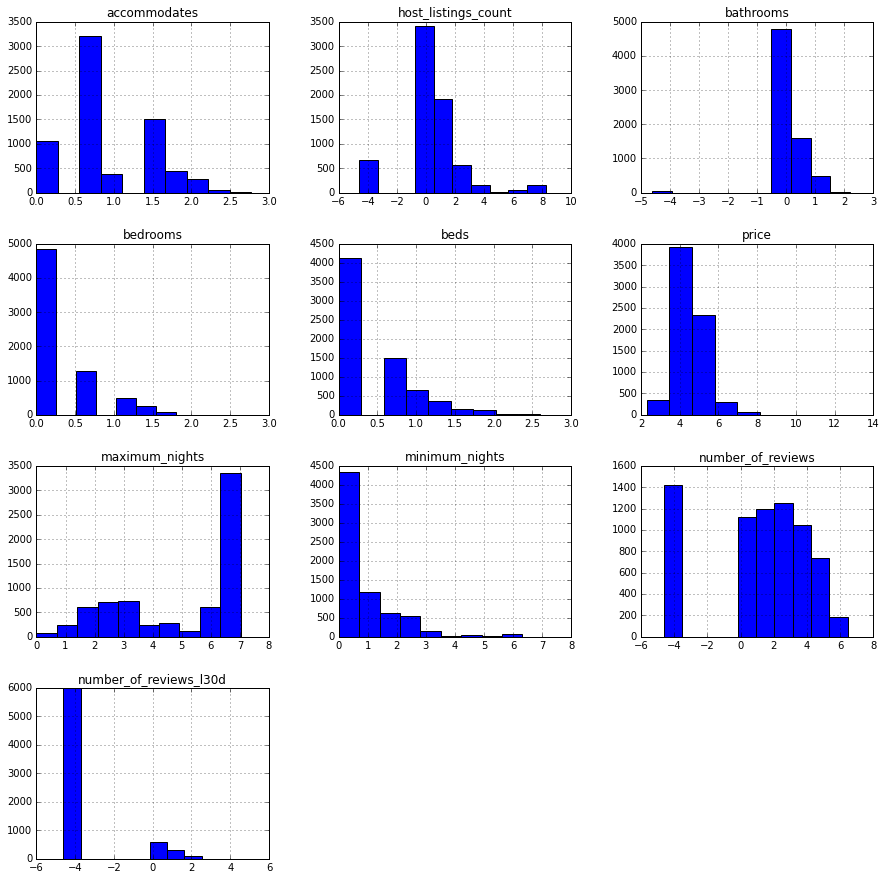

In [147]:
# Log transforming columns
for cols in has_review_numerical_columns:
    df_has_review_dummies[cols] = df_has_review_dummies[cols].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    df_has_review_dummies[cols] = np.log(df_has_review_dummies[cols])

df_has_review_dummies[has_review_numerical_columns].hist(figsize=(15,15));

In [148]:
#Splitting the data for modelling
'''Finally, the predictive features X and the target feature y can be separated, and X will be scaled. StandardScaler from sklearn will be used, 
but the type of scaling used could be experimented with later to see if alternative versions yield better results.'''
# Separating X and y
X2 = df_has_review_dummies.drop('price', axis=1)
y2 = df_has_review_dummies.price

# Scaling
scaler = StandardScaler()
X2 = pd.DataFrame(scaler.fit_transform(X2), columns=list(X2.columns))

In [149]:
# Splitting into train and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=123)
print(X_train2.shape); print(X_test2.shape)

(5572, 53)
(1393, 53)


***BASELINE MODELS***

In [150]:
#OLS
# Cross validate on 5 folds
cv = KFold(n_splits = 5)
linreg = LinearRegression()

# Store r2 and median absolute error of testing data for graphing purposes later
MSE_2 =[]
R2_2 = []

for train, test in cv.split(X2):
    # Fit linreg
    linreg.fit(X_train2, y_train2)
    
    #predict training
    y_predict_train2 = linreg.predict(X_train2)
    # Predict and score testing
    y_predict_test2 = linreg.predict(X_test2)
    R2_2.append(linreg.score(X_test2, y_test2))
    MSE_2.append(mean_squared_error(y_test2, y_predict_test2))

# Output and store scores after CV
lin_testing_set_score = np.mean(R2_2)
lin_mean_squared_error = np.mean(MSE_2)
print("Linear Regression")
print("\tR-squared training data:  " + str(round(r2_score(y_train2, y_predict_train2), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train2,y_predict_train2)), 3)))
print('\tR-Squared on testing data: ' + str(round(lin_testing_set_score, 3)))
print('\tRoot Mean Squared Error on testing data: ' + str(round(sqrt(lin_mean_squared_error), 3)))

Linear Regression
	R-squared training data:  0.483
	RMSE training data: 0.553
	R-Squared on testing data: 0.433
	Root Mean Squared Error on testing data: 0.571


In [151]:
#Ridge Regression
# Tuning paramater values for Ridge
lambdas = 10.**np.array([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Perform Ridge regression using expanded set of predictors, 
# choose best regularization parameter lambda using 5-fold x-validation
cv = KFold(n_splits = 5)
ridge = RidgeCV(alphas = lambdas, fit_intercept = True, cv = 5)

# Store r2 and median absolute error
MSE_2 =[]
R2_2 = []

# Find best score by cross validating over 5 folds
for train, test in cv.split(X2):
    # Fit linreg
    ridge.fit(X_train2, y_train2)
    
    #predict training
    y_predict_train2 = ridge.predict(X_train2)
    # Predict and score
    Y_predict2 = ridge.predict(X_test2)
    R2_2.append(ridge.score(X_test2, y_test2))
    MSE_2.append(mean_squared_error(y_test2, Y_predict2))
    
# Output and store scores after CV
ridge_testing_set_score = np.mean(R2_2)
ridge_mean_squared_error = np.mean(MSE_2)
print("Ridge Regression")
print("\tR-squared training data:  " + str(round(r2_score(y_train2, y_predict_train2), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train2,y_predict_train2)), 3)))
print('\tR-squared testing data: ' + str(round(ridge_testing_set_score,3)))
print('\tRoot Mean Squared Error testing data: ' + str(round(sqrt(ridge_mean_squared_error),3)))


Ridge Regression
	R-squared training data:  0.491
	RMSE training data: 0.549
	R-squared testing data: 0.446
	Root Mean Squared Error testing data: 0.564


In [152]:
# Perform Lasso regression using expanded set of predictors, 
# choose best regularization parameter lambda using 5-fold x-validation
cv = KFold(n_splits = 5)
lasso = LassoCV(alphas = lambdas, tol = 0.5, fit_intercept = True, cv = 5)

# Store r2 and median absolute error
MSE_2 =[]
R2_2 = []

# Find best score by cross validating over 5 folds
for train, test in cv.split(X2):
    # Fit linreg
    lasso.fit(X_train2, y_train2)
    
    #predict training
    y_predict_train2 = lasso.predict(X_train2)
    # Predict and score
    Y_predict2 = lasso.predict(X_test2)
    R2_2.append(lasso.score(X_test2, y_test2))
    MSE_2.append(mean_squared_error(y_test2, Y_predict2))

# Output and store scores after CV
lasso_testing_set_score = np.mean(R2_2)
lasso_mean_squared_error = np.mean(MSE_2)
print("Lasso Regression")
print("\tR-squared training data:  " + str(round(r2_score(y_train2, y_predict_train2), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train2,y_predict_train2)), 3)))
print('\tR-squared testing data: ' + str(round(lasso_testing_set_score,3)))
print('\tThe root mean squared error testing data: ' + str(round(sqrt(lasso_mean_squared_error),3)))

Lasso Regression
	R-squared training data:  0.481
	RMSE training data: 0.554
	R-squared testing data: 0.428
	The root mean squared error testing data: 0.573


##Ensemble Models

In [153]:
from sklearn.ensemble import RandomForestRegressor
# Fit random forest
rf = RandomForestRegressor(oob_score = True)
rf.fit(X_train2, y_train2)

#predict training
y_predict_train2 = rf.predict(X_train2)
# Predict and score RF
y_predict2 = rf.predict(X_test2)
rf_testing_set_score = rf.score(X_test2, y_test2)
rf_mean_squared_error = mean_squared_error(y_test2, y_predict2)
print("Random Forest Regressor")
print("\tR-squared training data:  " + str(round(r2_score(y_train2, y_predict_train2), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train2,y_predict_train2)), 3)))
print('\tR-squared testing data: ' + str(round(rf_testing_set_score,3)))
print('\tThe root mean squared error testing data:  ' + str(round(sqrt(rf_mean_squared_error),3)))

Random Forest Regressor
	R-squared training data:  0.945
	RMSE training data: 0.181
	R-squared testing data: 0.594
	The root mean squared error testing data:  0.483


In [154]:
#Tuned random forest regressor
# Parameters to run grid search on
tuned_parameters = {
    "n_estimators": [10, 30, 50],
    "n_jobs": [-1],
   # "oob_score": [True],
    "max_features": [None, 'log2', 'auto']
}

# Run 3-fold CV grid search to tune hyperparameters
rf_tuned = GridSearchCV(RandomForestRegressor(), cv = 3, param_grid = tuned_parameters)

# Score model
preds = rf_tuned.fit(X_train2, y_train2)
best = rf_tuned.best_estimator_ 
y_predict_train2 = rf_tuned.predict(X_train2)
y_predict2 = rf_tuned.predict(X_test2)
rft_testing_set_score = rf_tuned.score(X_test2, y_test2)
rft_mean_squared_error = mean_squared_error(y_test2, y_predict2)

# Output score and model info
print('Tuned Random Forest Regressor')
print('\tThe best paramaters are:', rf_tuned.best_params_)
print("\tR-squared training data:  " + str(round(r2_score(y_train2, y_predict_train2), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train2,y_predict_train2)), 3)))
print('\tR-squared testing data: ' + str(round(rft_testing_set_score,3)))
print('\tThe root mean squared error testing data: ' + str(round(sqrt(rft_mean_squared_error),3)))
#Improve on the Original Random Forest 

Tuned Random Forest Regressor
	The best paramaters are: {'max_features': 'log2', 'n_estimators': 50, 'n_jobs': -1}
	R-squared training data:  0.944
	RMSE training data: 0.182
	R-squared testing data: 0.615
	The root mean squared error testing data: 0.47


In [155]:
#AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
# Fit AdaBoost forest
ada = AdaBoostRegressor()
ada.fit(X_train2, y_train2)

y_predict_train2 = ada.predict(X_train2)

# Predict and score adaboost
y_predict2 = ada.predict(X_test2)
ada_testing_set_score = ada.score(X_test2, y_test2)
ada_mean_squared_error = mean_squared_error(y_test2, y_predict2)

#output score of model
print('AdaBoost Regressor')
print("\tR-squared training data:  " + str(round(r2_score(y_train2, y_predict_train2), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train2,y_predict_train2)), 3)))
print('\tThe R-squared testing data: ' + str(round(ada_testing_set_score,3)))
print('\tThe root mean squared error testing data: ' + str(round(sqrt(ada_mean_squared_error),3)))

AdaBoost Regressor
	R-squared training data:  0.048
	RMSE training data: 0.75
	The R-squared testing data: -0.003
	The root mean squared error testing data: 0.759


In [156]:
#AdaBoost Regressor (with tuned Random Forest as Base Estimator)
from sklearn.ensemble import AdaBoostRegressor
# Fit AdaBoost forest
ada_rf = AdaBoostRegressor(base_estimator = rf_tuned)
ada_rf.fit(X_train2, y_train2)

y_predict_train2 = ada_rf.predict(X_train2)

# Predict and score adaboost
y_predict2 = ada_rf.predict(X_test2)
ada_rf_testing_set_score = ada_rf.score(X_test2, y_test2)
ada_rf_mean_squared_error = mean_squared_error(y_test2, y_predict2)

#output score of model
print('AdaBoost Regressor TunedRF')
print("\tR-squared training data:  " + str(round(r2_score(y_train2, y_predict_train2), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train2,y_predict_train2)), 3)))
print('\tThe R-squared testing data: ' + str(round(ada_rf_testing_set_score,3)))
print('\tThe root mean squared error testing data: ' + str(round(sqrt(ada_rf_mean_squared_error),3)))

AdaBoost Regressor TunedRF
	R-squared training data:  0.914
	RMSE training data: 0.225
	The R-squared testing data: 0.61
	The root mean squared error testing data: 0.473


In [157]:
#Tuned AdaBoost Regressor (with Decision Tree as Base Estimator)
# Parameters to run grid search on
tuned_parameters = {
    "n_estimators": [10, 25, 50, 100],
    "learning_rate": [0.01, 0.1, 1],
    "loss" : ['linear', 'square']
}

clf = GridSearchCV(AdaBoostRegressor(), cv=3, param_grid=tuned_parameters)
preds = clf.fit(X_train2, y_train2)
best = clf.best_estimator_ 
y_predict_train2 = clf.predict(X_train2)
Y_predict2 = clf.predict(X_test2)
clf_testing_set_score = clf.score(X_test2, y_test2)
clf_mean_sqrd_error = mean_squared_error(y_test2, Y_predict2)

# Output score and model info
print('Tuned AdaBoost Regressor')
print('\tThe best paramaters are:', clf.best_params_)
print("\tR-squared training data:  " + str(round(r2_score(y_train2, y_predict_train2), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train2,y_predict_train2)), 3)))
print('\tR-squared testing data: ' + str(round(clf_testing_set_score,3)))
print('\tThe root mean squared error testing data: ' + str(round(sqrt(clf_mean_sqrd_error),3)))

Tuned AdaBoost Regressor
	The best paramaters are: {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 100}
	R-squared training data:  0.531
	RMSE training data: 0.527
	R-squared testing data: 0.488
	The root mean squared error testing data: 0.542


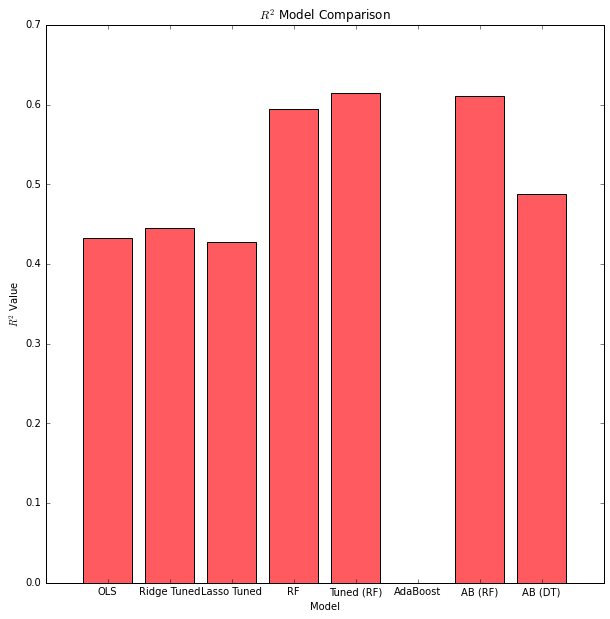

In [158]:
# Graph x and y axis values
labels = np.array(['OLS','Ridge Tuned','Lasso Tuned', 'RF', 'Tuned (RF)', 'AdaBoost', 'AB (RF)', 'AB (DT)'])
error_val = np.array([lin_testing_set_score, ridge_testing_set_score, lasso_testing_set_score, 
                      rf_testing_set_score, rft_testing_set_score, ada_testing_set_score,
                      ada_rf_testing_set_score, clf_testing_set_score])

# Arrange bars
pos = np.arange(error_val.shape[0])


# Plots R^2 bars across functions
plt.figure(figsize=(10,10))
plt.bar(pos, error_val, align = 'center', color=BNB_RED)
plt.xticks(pos, labels)
plt.xlabel('Model')
plt.ylabel('$R^2$ Value')
plt.title('$R^2$ Model Comparison')
plt.ylim(0.0,0.70)
plt.show()

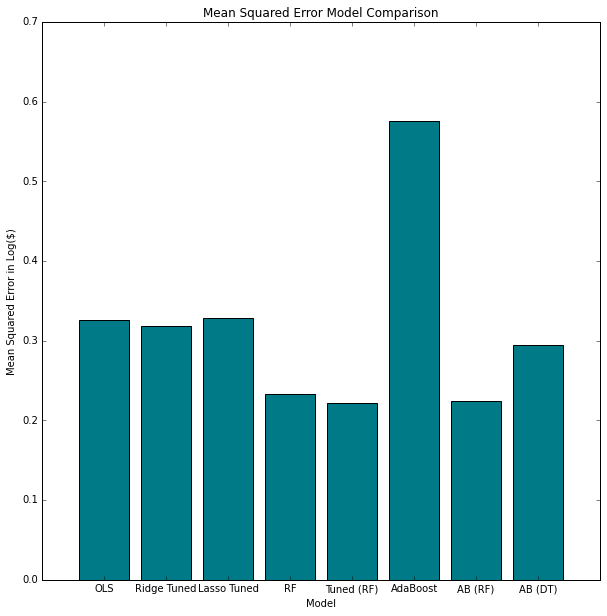

In [159]:
#MSE Chart
# Graph x and y axis values
labels = np.array(['OLS','Ridge Tuned','Lasso Tuned', 'RF', 'Tuned (RF)', 'AdaBoost', 'AB (RF)', 'AB (DT)'])
error_val = np.array([lin_mean_squared_error, ridge_mean_squared_error, lasso_mean_squared_error, 
                      rf_mean_squared_error, rft_mean_squared_error, ada_mean_squared_error, 
                      ada_rf_mean_squared_error, clf_mean_sqrd_error])

# Arrange bars
pos = np.arange(error_val.shape[0])
#srt = np.argsort(error_val)

# Plots Mean Absolute Variance bars across functions
plt.figure(figsize=(10,10))
#plt.bar(pos, error_val[srt], align = 'center', color=BNB_BLUE)
#plt.xticks(pos, labels[srt])
plt.bar(pos, error_val, align = 'center', color=BNB_BLUE)
plt.xticks(pos, labels)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error in Log($)')
plt.title('Mean Squared Error Model Comparison')
plt.ylim(0.0,0.7)
plt.show()

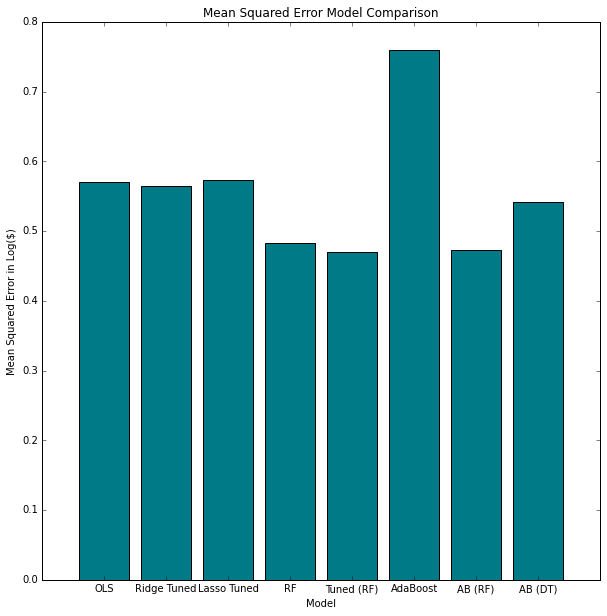

In [160]:
#RMSE Chart
# Graph x and y axis values
labels = np.array(['OLS','Ridge Tuned','Lasso Tuned', 'RF', 'Tuned (RF)', 'AdaBoost', 'AB (RF)', 'AB (DT)'])
error_val = np.array([sqrt(lin_mean_squared_error), sqrt(ridge_mean_squared_error), sqrt(lasso_mean_squared_error), 
                      sqrt(rf_mean_squared_error), sqrt(rft_mean_squared_error), sqrt(ada_mean_squared_error), 
                      sqrt(ada_rf_mean_squared_error), sqrt(clf_mean_sqrd_error)])

# Arrange bars
pos = np.arange(error_val.shape[0])
#srt = np.argsort(error_val)

# Plots Mean Absolute Variance bars across functions
plt.figure(figsize=(10,10))
#plt.bar(pos, error_val[srt], align = 'center', color=BNB_BLUE)
#plt.xticks(pos, labels[srt])
plt.bar(pos, error_val, align = 'center', color=BNB_BLUE)
plt.xticks(pos, labels)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error in Log($)')
plt.title('Mean Squared Error Model Comparison')
plt.ylim(0.0,0.8)
plt.show()
#Tuned RandomForest model is best performing model, only slightly beating the AdaBoost with RF as base estimator.

##Advanced Modelling (Building Neural Network)

In [161]:
'''Before building a neural network, a vanilla XGBoost model will be used to predict price, in order to provide a baseline level of accuracy and a 
measure of feature importance. This most likely provides the best achievable accuracy using machine learning models (other than possible small accuracy
increases from hyper-parameter tuning) due to XGBoost's superior performance'''
#XGboost model
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train2, y_train2)
training_preds_xgb_reg = xgb_reg.predict(X_train2)
val_preds_xgb_reg = xgb_reg.predict(X_test2)

xgb_reg_end = time.time()

print('Vanilla XGBoost')
print(f"\tTime taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\tR-Squared on Training data: ", round(r2_score(y_train2, training_preds_xgb_reg),3))
print("\tMean Squared Error on training data: ", round(sqrt(mean_squared_error(y_train2, training_preds_xgb_reg)),3))
print("\tR-Squared on testing data: ", round(r2_score(y_test2, val_preds_xgb_reg),3))
print("\tMean Squared Error on testing data: ", round(sqrt(mean_squared_error(y_test2, val_preds_xgb_reg)),3))


[12:12:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Vanilla XGBoost
	Time taken to run: 0.0 minutes
	R-Squared on Training data:  0.671
	Mean Squared Error on training data:  0.441
	R-Squared on testing data:  0.588
	Mean Squared Error on testing data:  0.487


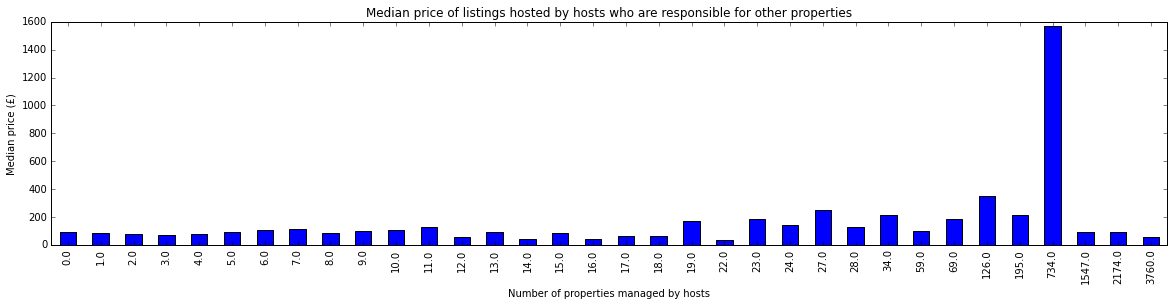

In [162]:
# Median price for different host listing counts
plt.figure()
df_has_review.groupby('host_listings_count').price.median().plot(figsize=(20,4), kind='bar')
plt.title('Median price of listings hosted by hosts who are responsible for other properties')
plt.xlabel('Number of properties managed by hosts')
plt.ylabel('Median price (£)');

Neural Network

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               6912      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 105,985
Trainable params: 105,985
Non-trainable params: 0
_________________________________________________________________
None


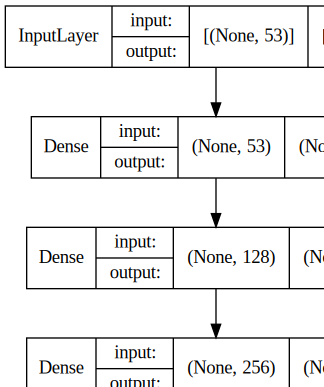

In [163]:
#Three layer neural network
'''For the initial version of the neural network, a relatively shallow three layer NN will be created. It will consist of densely-connected layers,
and use a relu activation function for the hidden layers and a linear activation function for the output layer, as it is being used for a regression task.
The loss function will be mean squared error (again, because this is for regression).'''
# Building the model
nn2_2 = models.Sequential()
nn2_2.add(layers.Dense(128, input_shape=(X_train2.shape[1],), activation='relu'))
nn2_2.add(layers.Dense(256, activation='relu'))
nn2_2.add(layers.Dense(256, activation='relu'))
nn2_2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2_2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn2_2.summary())

# Visualising the neural network
SVG(model_to_dot(nn2_2, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

In [164]:
# Training the model
nn2_start = time.time()

nn2_history_ = nn2_2.fit(X_train2,
                  y_train2,
                  epochs=100,
                  batch_size=256,
                  validation_split = 0.1)

nn2_end = time.time()

print(f"Time taken to run: {round((nn2_end - nn2_start)/60,1)} minutes")

Epoch 1/100
20/20 [==============================] - 1s 14ms/step - loss: 4.5988 - mean_squared_error: 4.5988 - val_loss: 1.3508 - val_mean_squared_error: 1.3508
Epoch 2/100
20/20 [==============================] - 0s 8ms/step - loss: 0.8487 - mean_squared_error: 0.8487 - val_loss: 0.4720 - val_mean_squared_error: 0.4720
Epoch 3/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4700 - mean_squared_error: 0.4700 - val_loss: 0.3284 - val_mean_squared_error: 0.3284
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.3625 - mean_squared_error: 0.3625 - val_loss: 0.2906 - val_mean_squared_error: 0.2906
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 0.3197 - mean_squared_error: 0.3197 - val_loss: 0.2755 - val_mean_squared_error: 0.2755
Epoch 6/100
20/20 [==============================] - 0s 8ms/step - loss: 0.2904 - mean_squared_error: 0.2904 - val_loss: 0.2636 - val_mean_squared_error: 0.2636
Epoch 7/100
20/20 [==============

In [165]:
#RMSE and r squared values
y_test_pred2 = nn2_2.predict(X_test2)
y_train_pred2 = nn2_2.predict(X_train2)
print('Three layer Neural Network')
print("\tR-squared on Training data: ", round(r2_score(y_train2, y_train_pred2),3))
print("\tMean Squared Error on Training data: ", round(sqrt(mean_squared_error(y_train2, y_train_pred2)),3))
print("\tR-squared on Testing data: ", round(r2_score(y_test2, y_test_pred2),3))
print("\tMean Squared Error on Testing data: ", round(sqrt(mean_squared_error(y_test2, y_test_pred2)),3))


Three layer Neural Network
	R-squared on Training data:  0.93
	Mean Squared Error on Training data:  0.204
	R-squared on Testing data:  0.311
	Mean Squared Error on Testing data:  0.629


###Tuning XGBoost
Tune XGBoost to try improve performance.

In [166]:
#As a result I will take the best performing model (Vanilla XGBoost) and try to immprove its accuracies.
#XGboost model using grid search 
#in order to tune the XGBoost, I first need to build DMatrices for the model
dtrain = xgb.DMatrix(X_train2, label=y_train2)
dtest = xgb.DMatrix(X_test2, label=y_test2)


# Parameters to run grid search on
params = {
    # Parameters that we are going to tune.
    'max_depth':5,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}
params['eval_metric'] = "rmse"
num_boost_round = 2000

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=12
)

print("Best RMSE: {:.3f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))


[12:12:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:2.89708
Will train until Test-rmse hasn't improved in 12 rounds.
[1]	Test-rmse:2.0673
[2]	Test-rmse:1.49777
[3]	Test-rmse:1.11433
[4]	Test-rmse:0.863251
[5]	Test-rmse:0.707708
[6]	Test-rmse:0.616785
[7]	Test-rmse:0.559217
[8]	Test-rmse:0.529916
[9]	Test-rmse:0.51312
[10]	Test-rmse:0.501735
[11]	Test-rmse:0.497538
[12]	Test-rmse:0.493432
[13]	Test-rmse:0.491408
[14]	Test-rmse:0.490334
[15]	Test-rmse:0.490233
[16]	Test-rmse:0.48751
[17]	Test-rmse:0.487883
[18]	Test-rmse:0.48735
[19]	Test-rmse:0.486334
[20]	Test-rmse:0.484133
[21]	Test-rmse:0.484331
[22]	Test-rmse:0.484146
[23]	Test-rmse:0.484149
[24]	Test-rmse:0.484519
[25]	Test-rmse:0.483415
[26]	Test-rmse:0.48414
[27]	Test-rmse:0.483698
[28]	Test-rmse:0.483095
[29]	Test-rmse:0.482415
[30]	Test-rmse:0.481963
[31]	Test-rmse:0.481559
[32]	Test-rmse:0.480597
[33]	Test-rmse:0.480293
[34]	Test-rmse:0.47

In [167]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10
)
cv_results

[12:12:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0          2.899160        0.007430        2.899670       0.037379
1          2.064040        0.005350        2.066120       0.033089
2          1.489416        0.003318        1.494722       0.031397
3          1.098875        0.002512        1.109132       0.027719
4          0.840409        0.002202        0.858217       0.029349
5          0.674431        0.001650        0.699186       0.030511
6          0.572082        0.001942        0.604013       0.030476
7          0.512071        0.002417        0.551029       0.031719
8          0.474940        0.002814        0.519927       0.031877
9          0.454200        0.002672        0.503676       0.032166
10         0.440282        0.002320        0.495056       0.032804
11         0.431252        0.003004        0.490118       0.032408
12         0.423829        0.002696        0.485754       0.033024
13         0.418501        0.003296        0.483819       0.033200
14         0.413548        0.004573        0.481615       0.032530
15         0.409896        0.003616        0.480685       0.032913
16         0.406698        0.003830        0.479382       0.032636
17         0.403889        0.003484        0.478704       0.032622
18         0.399450        0.002416        0.478136       0.033022
19         0.395903        0.002681        0.477623       0.033157
20         0.392144        0.002342        0.476266       0.031117
21         0.388499        0.002486        0.476236       0.031618
22         0.386092        0.002604        0.475657       0.031274
23         0.383785        0.002701        0.474932       0.031784
24         0.380479        0.003579        0.474254       0.030986
25         0.377842        0.004218        0.473968       0.031107
26         0.375850        0.004627        0.473726       0.031648
27         0.373869        0.004581        0.473514       0.031750
28         0.372256        0.005079        0.473534       0.031821
29         0.368614        0.005153        0.471910       0.031930
30         0.365973        0.005496        0.471502       0.032293
31         0.363465        0.005648        0.471740       0.032300
32         0.361853        0.006244        0.472215       0.032452
33         0.360253        0.006001        0.472374       0.032191
34         0.358159        0.006409        0.472241       0.031588
35         0.355543        0.006559        0.472218       0.031328
36         0.353538        0.006424        0.472109       0.031996
37         0.351250        0.005979        0.471692       0.032476
38         0.349418        0.005964        0.471290       0.032481
39         0.347930        0.005688        0.471163       0.032520
40         0.346721        0.005873        0.470519       0.031688

In [168]:
cv_results['test-rmse-mean'].min()

0.47051940000000003

In [169]:
# You can try wider intervals with a larger step between
# each value and then narrow it down. Here after several
# iteration I found that the optimal value was in the
# following ranges.
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [170]:

# Define initial best params and RMSE
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best RMSE
    mean_rmse= cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=9, min_child_weight=5
[12:12:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 0.47478560000000003 for 18 rounds
CV with max_depth=9, min_child_weight=6
[12:12:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squar

In [171]:
#We get the best score with a max_depth of 10 and min_child_weight of 6, so let's update our params
params['max_depth'] = 9
params['min_child_weight'] = 5

gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(6,10)]
    for colsample in [i/10. for i in range(6,10)]
]

In [172]:
min_rmse = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with subsample=0.9, colsample=0.9
[12:13:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 0.48004040000000003 for 21 rounds
CV with subsample=0.9, colsample=0.8
[12:13:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederro

In [173]:
params['subsample'] = .9
params['colsample_bytree'] = .6
# This can take some time…
min_rmse = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics=['rmse'],
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds\n".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

CV with eta=0.3
[12:13:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 0.4760224 for 19 rounds

CV with eta=0.2
[12:13:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:57] WARNING: /workspace/src/objective/reg

In [174]:
params['eta'] = .005
#different to option 1 param

In [175]:
#Here is how the final dictionary of parameters looks like after running the cross validation results:
params
{'colsample_bytree': .6,
 'eta': 0.005,
 'eval_metric': 'rmse',
 'max_depth': 9,
 'min_child_weight': 5,
 'objective': 'reg:linear',
 'subsample': 0.9}

{'colsample_bytree': 0.6,
 'eta': 0.005,
 'eval_metric': 'rmse',
 'max_depth': 9,
 'min_child_weight': 5,
 'objective': 'reg:linear',
 'subsample': 0.9}

In [176]:
#Finally lets train our tuned model and test its performance using test data
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Best RMSE: {:.3f} in {} rounds".format(model.best_score, model.best_iteration+1))
#Best RMSE: 0.462 in 1209 rounds not as low as option 1, showing that the score associated with the different review categories could be important predictors.

[12:16:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:4.07664
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:4.05679
[2]	Test-rmse:4.03702
[3]	Test-rmse:4.0173
[4]	Test-rmse:3.99768
[5]	Test-rmse:3.97813
[6]	Test-rmse:3.95878
[7]	Test-rmse:3.93942
[8]	Test-rmse:3.92018
[9]	Test-rmse:3.90106
[10]	Test-rmse:3.88204
[11]	Test-rmse:3.86308
[12]	Test-rmse:3.84421
[13]	Test-rmse:3.8255
[14]	Test-rmse:3.80685
[15]	Test-rmse:3.78832
[16]	Test-rmse:3.76982
[17]	Test-rmse:3.75147
[18]	Test-rmse:3.7332
[19]	Test-rmse:3.71496
[20]	Test-rmse:3.69684
[21]	Test-rmse:3.67884
[22]	Test-rmse:3.66096
[23]	Test-rmse:3.64321
[24]	Test-rmse:3.62554
[25]	Test-rmse:3.60792
[26]	Test-rmse:3.59038
[27]	Test-rmse:3.57292
[28]	Test-rmse:3.55553
[29]	Test-rmse:3.53829
[30]	Test-rmse:3.52107
[31]	Test-rmse:3.50392
[32]	Test-rmse:3.48694
[33]	Test-rmse:3.47005
[34]	Test-rmse:3.45327
[35]	Test-rmse:3.43654
[

In [177]:
model = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train2.columns)
model.sort_values('weight', inplace=True)
model

weight
property_has_review                           0.000000
property_type_Shared Room Other               0.000000
room_type_Private room                        0.000000
host_verified_google                          0.000000
wifi                                          0.000000
property_type_Other                           0.000000
property_type_Entire Other                    0.000000
property_type_Entire Apartment                0.000000
neighbourhood_cleansed_Fingal                 0.000000
has_availability                              0.000000
host_verified_identity_manual                 0.000000
host_verified_selfie                          0.000000
host_verified_government_id                   0.000153
family_kid_friendly                           0.000866
host_identity_verified                        0.001763
host_has_profile_pic                          0.001872
host_verified_facebook                        0.002372
host_verified_phone                           0.002628
neighbourhood_cleansed_Dn Laoghaire-Rathdown  0.002633
property_type_Shared Room Apartment           0.002831
number_of_reviews_l30d                        0.003126
host_verified_email                           0.003269
host_greets_you                               0.003482
host_is_superhost                             0.003696
property_type_Private Room Apartment          0.003761
beds                                          0.004096
host_verified_jumio                           0.004667
laptop_friendly_workspace                     0.004722
washer                                        0.004746
host_verified_reviews                         0.005625
garden                                        0.005717
kitchen                                       0.005879
room_type_Hotel room                          0.005884
heating                                       0.005991
instant_bookable                              0.006437
minimum_nights                                0.006963
number_of_reviews                             0.007289
host_days_active                              0.007489
neighbourhood_cleansed_South Dublin           0.008776
bathrooms                                     0.009747
property_type_Private Room House              0.009786
maximum_nights                                0.012376
tv                                            0.015221
neighbourhood_cleansed_Dublin City            0.016752
room_type_Shared room                         0.017760
property_type_Shared Room House               0.022402
availability_365                              0.024652
property_type_Private Room Other              0.025655
bedrooms                                      0.042693
property_type_Entire House                    0.044461
host_listings_count                           0.063366
accommodates                                  0.109931
room_type_Entire home/apt                     0.468465

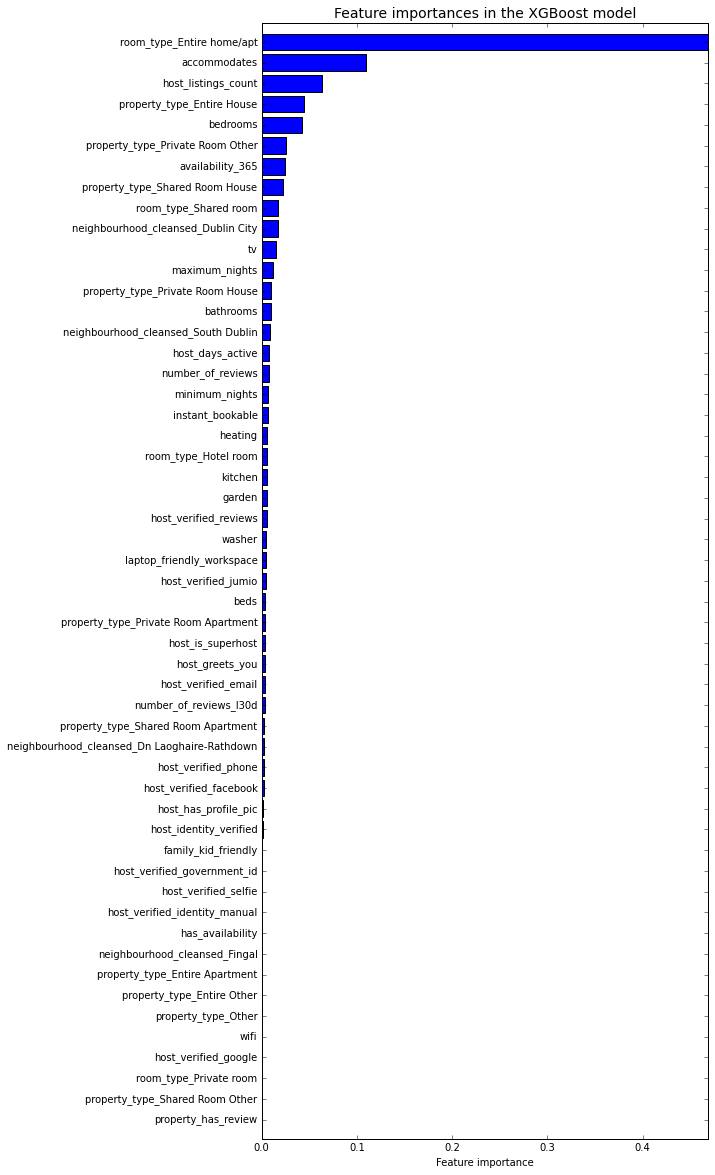

In [178]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(model.index, model.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()
#We see a change compared to when we dropped the null rows. We see bedrooms is less important dropping from 3rd to 5th, however property_type_entire_house jumps up roughly 30 spots compared to when we dropped the null data.

#Option 3: Predict rows with no reviews using Linear Regression and Randomforest regressor

##Linear regression approach<br>
predict each column individually. Categorical data will be encoded and then included as a predictor.

In [179]:
df_imputed_values = df.drop(['host_since', 'first_review', 'last_review','property_has_review'], axis=1)
#One hot encode columns 'neighbourhood_cleansed', 'property_type' , 'room_type'
# Get one hot encoding of columns 
one_hot = pd.get_dummies(df_imputed_values[['neighbourhood_cleansed', 'property_type' , 'room_type']])
# Drop columns as they are now encoded
df_imputed_values = df_imputed_values.drop(['neighbourhood_cleansed', 'property_type' , 'room_type'],axis = 1)
# Join the encoded df
df_one_hot_encoded = df_imputed_values.join(one_hot)
df_one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6965 entries, 44077 to 53180353
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_is_superhost                             6965 non-null   float64
 1   host_listings_count                           6965 non-null   float64
 2   host_has_profile_pic                          6965 non-null   float64
 3   host_identity_verified                        6965 non-null   float64
 4   accommodates                                  6965 non-null   int64  
 5   bedrooms                                      6965 non-null   float64
 6   beds                                          6965 non-null   float64
 7   price                                         6965 non-null   float64
 8   minimum_nights                                6965 non-null   int64  
 9   maximum_nights                                6965 non-

In [180]:
#I have to predict missing values within 6 columns, to do so I will use all non null columns as my features and set the review_scores_... as the target column. 
df_review_scores_rating = df_one_hot_encoded['review_scores_rating']                        
df_review_scores_accuracy = df_one_hot_encoded['review_scores_accuracy']                     
df_review_scores_cleanliness = df_one_hot_encoded['review_scores_cleanliness']                
df_review_scores_checkin = df_one_hot_encoded['review_scores_checkin']                        
df_review_scores_communication = df_one_hot_encoded['review_scores_communication']                 
df_review_scores_location = df_one_hot_encoded['review_scores_location']                    
df_review_scores_value = df_one_hot_encoded['review_scores_value']            
#initialise dataframes to work with for predicitng
df_predictors = df_one_hot_encoded.drop(['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',  'review_scores_communication', 'review_scores_location', 
                 'review_scores_value'], axis = 1)

**Review_scores_rating (rsr)**

In [181]:
pred_col_rsr = pd.merge(df_predictors, df_review_scores_rating, on="id")
pred_col_rsr.head()



host_is_superhost  host_listings_count  host_has_profile_pic  \
id                                                                     
44077                 1.0                  3.0                   1.0   
85148                 0.0                  1.0                   1.0   
85156                 1.0                  3.0                   1.0   
159889                0.0                  0.0                   1.0   
162809                1.0                  2.0                   1.0   

        host_identity_verified  accommodates  bedrooms  beds  price  \
id                                                                    
44077                      1.0             2       1.0   2.0   65.0   
85148                      0.0             2       1.0   1.0   30.0   
85156                      1.0             2       1.0   1.0   63.0   
159889                     1.0             1       1.0   1.0   45.0   
162809                     1.0             6       2.0   4.0   65.0   

        minimum_nights  maximum_nights  ...  property_type_Private Room House  \
id                                      ...                                     
44077                3            1125  ...                                 1   
85148                1               5  ...                                 1   
85156                3              21  ...                                 1   
159889               2              21  ...                                 1   
162809               1              12  ...                                 1   

        property_type_Private Room Other  property_type_Shared Room Apartment  \
id                                                                              
44077                                  0                                    0   
85148                                  0                                    0   
85156                                  0                                    0   
159889                                 0                                    0   
162809                                 0                                    0   

        property_type_Shared Room House  property_type_Shared Room Other  \
id                                                                         
44077                                 0                                0   
85148                                 0                                0   
85156                                 0                                0   
159889                                0                                0   
162809                                0                                0   

        room_type_Entire home/apt  room_type_Hotel room  \
id                                                        
44077                           0                     0   
85148                           0                     0   
85156                           0                     0   
159889                          0                     0   
162809                          0                     0   

        room_type_Private room  room_type_Shared room  review_scores_rating  
id                                                                           
44077                        1                      0                  4.77  
85148                        1                      0                  0.00  
85156                        1                      0                  4.79  
159889                       1                      0                  4.75  
162809                       1                      0                  4.83  

[5 rows x 54 columns]

In [182]:
# split datasets
train_data = pred_col_rsr[pred_col_rsr['review_scores_rating'].notnull()]
test_data  = pred_col_rsr[pred_col_rsr['review_scores_rating'].isnull()]

# define X
X_train = train_data.drop('review_scores_rating', axis=1)
X_test  = test_data.drop('review_scores_rating', axis=1)

# define y
y_train = train_data['review_scores_rating']

In [183]:
print("Shape of Training Data:", train_data.shape)
print("Shape of Test Data:    ",test_data.shape)
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("\nShape of y_train:", y_train.shape)

Shape of Training Data: (5546, 54)
Shape of Test Data:     (1419, 54)

Shape of X_train: (5546, 53)
Shape of X_test: (1419, 53)

Shape of y_train: (5546,)


In [184]:
# import Linear Regression
from sklearn.linear_model import LinearRegression
# instantiate
linreg = LinearRegression()
# fit model to training data
linreg.fit(X_train, y_train)

LinearRegression()

In [185]:
X_test.isna().sum()

host_is_superhost                               0
host_listings_count                             0
host_has_profile_pic                            0
host_identity_verified                          0
accommodates                                    0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
has_availability                                0
availability_365                                0
number_of_reviews                               0
number_of_reviews_l30d                          0
instant_bookable                                0
host_days_active                                0
bathrooms                                       0
tv                                              0
wifi                                            0
kitchen                                         0


In [186]:
# making predictions
y_test = linreg.predict(X_test)

In [187]:
y_test = pd.DataFrame(y_test)
y_test.columns = ['review_scores_rating']
print(y_test.shape)
y_test.head()

(1419, 1)


review_scores_rating
0              4.400423
1              4.638420
2              4.430654
3              4.406378
4              4.546995

In [188]:
print(X_test.shape)
X_test.head()

(1419, 53)


host_is_superhost  host_listings_count  host_has_profile_pic  \
id                                                                      
575339                 0.0                  1.0                   1.0   
1771007                0.0                  1.0                   1.0   
1789253                0.0                  1.0                   1.0   
2202076                0.0                  1.0                   1.0   
2215722                0.0                  1.0                   1.0   

         host_identity_verified  accommodates  bedrooms  beds  price  \
id                                                                     
575339                      1.0             2       1.0   2.0   50.0   
1771007                     1.0             2       1.0   1.0   50.0   
1789253                     1.0             4       1.0   1.0  170.0   
2202076                     1.0             6       2.0   3.0  100.0   
2215722                     0.0             2       1.0   3.0  120.0   

         minimum_nights  maximum_nights  ...  \
id                                       ...   
575339                1            1125  ...   
1771007               1               2  ...   
1789253               2            1125  ...   
2202076               3               7  ...   
2215722               1            1125  ...   

         property_type_Private Room Apartment  \
id                                              
575339                                      0   
1771007                                     0   
1789253                                     0   
2202076                                     0   
2215722                                     0   

         property_type_Private Room House  property_type_Private Room Other  \
id                                                                            
575339                                  1                                 0   
1771007                                 1                                 0   
1789253                                 0                                 0   
2202076                                 0                                 0   
2215722                                 1                                 0   

         property_type_Shared Room Apartment  property_type_Shared Room House  \
id                                                                              
575339                                     0                                0   
1771007                                    0                                0   
1789253                                    0                                0   
2202076                                    0                                0   
2215722                                    0                                0   

         property_type_Shared Room Other  room_type_Entire home/apt  \
id                                                                    
575339                                 0                          0   
1771007                                0                          0   
1789253                                0                          1   
2202076                                0                          1   
2215722                                0                          0   

         room_type_Hotel room  room_type_Private room  room_type_Shared room  
id                                                                            
575339                      0                       1                      0  
1771007                     0                       1                      0  
1789253                     0                       0                      0  
2202076                     0                       0                      0  
2215722                     0                       1                      0  

[5 rows x 53 columns]

To combine y_test and X_test back to our full test_dataframe, we have to create a bit of a circuit. As we can see here, the X_test dataframe has a specific index that's not compatible with y_test, where the numbers simply start from 0 onwards. So we need to provide y_test with the X_test index to make sure everyting fits together

In [189]:
# make the index of X_test to an own dataframe
prelim_index = pd.DataFrame(X_test.index)
prelim_index.columns = ['prelim']

# ... and concat this dataframe with y_test
y_test = pd.concat([y_test, prelim_index], axis=1)
y_test.set_index(['prelim'], inplace=True)
y_test.head()

review_scores_rating
prelim                       
575339               4.400423
1771007              4.638420
1789253              4.430654
2202076              4.406378
2215722              4.546995

In [190]:
new_test_data = pd.concat([X_test, y_test], axis=1)

In [191]:
print(new_test_data.shape)
new_test_data.head()

(1419, 54)


host_is_superhost  host_listings_count  host_has_profile_pic  \
575339                 0.0                  1.0                   1.0   
1771007                0.0                  1.0                   1.0   
1789253                0.0                  1.0                   1.0   
2202076                0.0                  1.0                   1.0   
2215722                0.0                  1.0                   1.0   

         host_identity_verified  accommodates  bedrooms  beds  price  \
575339                      1.0             2       1.0   2.0   50.0   
1771007                     1.0             2       1.0   1.0   50.0   
1789253                     1.0             4       1.0   1.0  170.0   
2202076                     1.0             6       2.0   3.0  100.0   
2215722                     0.0             2       1.0   3.0  120.0   

         minimum_nights  maximum_nights  ...  \
575339                1            1125  ...   
1771007               1               2  ...   
1789253               2            1125  ...   
2202076               3               7  ...   
2215722               1            1125  ...   

         property_type_Private Room House  property_type_Private Room Other  \
575339                                  1                                 0   
1771007                                 1                                 0   
1789253                                 0                                 0   
2202076                                 0                                 0   
2215722                                 1                                 0   

         property_type_Shared Room Apartment  property_type_Shared Room House  \
575339                                     0                                0   
1771007                                    0                                0   
1789253                                    0                                0   
2202076                                    0                                0   
2215722                                    0                                0   

         property_type_Shared Room Other  room_type_Entire home/apt  \
575339                                 0                          0   
1771007                                0                          0   
1789253                                0                          1   
2202076                                0                          1   
2215722                                0                          0   

         room_type_Hotel room  room_type_Private room  room_type_Shared room  \
575339                      0                       1                      0   
1771007                     0                       1                      0   
1789253                     0                       0                      0   
2202076                     0                       0                      0   
2215722                     0                       1                      0   

         review_scores_rating  
575339               4.400423  
1771007              4.638420  
1789253              4.430654  
2202076              4.406378  
2215722              4.546995  

[5 rows x 54 columns]

In [192]:
new_test_data['review_scores_rating'].describe()
#We see that the max figure predicted is 17.122 however we know that all scores should be between 0 and 5 therefore, the RandomForest Regressor approach will be chosen.

count    1419.000000
mean        4.124398
std         0.775570
min         2.151330
25%         4.140498
50%         4.322684
75%         4.487508
max        17.122468
Name: review_scores_rating, dtype: float64

###Option 3: Predict rows with no reviews using Randomforest regressor

In [193]:
#option 2: predict the missing value with a Machine Learning Algorithm. To not make it too complicated, we'll only use numerical features. Next, we have to split our data into
#a) a training set where we have sizes and
#b) a test set where we don't.
#df_imputed_values = df.drop(['host_since', 'first_review', 'last_review','property_has_review'], axis=1)

In [194]:
df_imputed_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6965 entries, 44077 to 53180353
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   host_is_superhost              6965 non-null   float64
 1   host_listings_count            6965 non-null   float64
 2   host_has_profile_pic           6965 non-null   float64
 3   host_identity_verified         6965 non-null   float64
 4   accommodates                   6965 non-null   int64  
 5   bedrooms                       6965 non-null   float64
 6   beds                           6965 non-null   float64
 7   price                          6965 non-null   float64
 8   minimum_nights                 6965 non-null   int64  
 9   maximum_nights                 6965 non-null   int64  
 10  has_availability               6965 non-null   int64  
 11  availability_365               6965 non-null   int64  
 12  number_of_reviews              6965 non-

In [195]:
#for model to work dataframe cannot contain object or string features
df_hot_encoded = df_imputed_values.join(one_hot)
#df_hot_encoded.info()

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer



imp_mean = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
imp_mean.fit(df_hot_encoded)
test_df = pd.DataFrame(imp_mean.transform(df_hot_encoded))


In [196]:
df_hot_encoded.shape


(6965, 60)

In [197]:
test_df.shape

(6965, 60)

In [199]:
# define modeling pipeline
# evaluate iterative imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
model = RandomForestClassifier()
imputer = IterativeImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


>ascending 0.105 (0.011)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


>descending 0.105 (0.009)


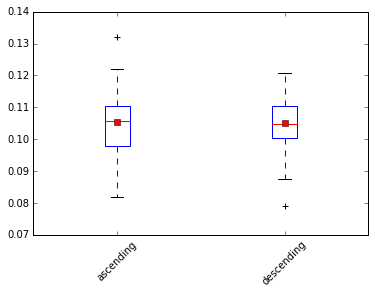

In [200]:
# split into input and output elements
X = df_hot_encoded.drop(['price'], axis=1)
y = df_hot_encoded['price']
# evaluate each strategy on the dataset
results = list()
strategies = ['ascending', 'descending', 'roman', 'arabic', 'random']


for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', IterativeImputer(imputation_order=s)), ('m', RandomForestClassifier())])
	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

In [201]:
test_df.head()

0    1    2    3    4    5    6     7    8       9   ...   50   51   52  \
0  1.0  3.0  1.0  1.0  2.0  1.0  2.0  65.0  3.0  1125.0  ...  0.0  1.0  0.0   
1  0.0  1.0  1.0  0.0  2.0  1.0  1.0  30.0  1.0     5.0  ...  0.0  1.0  0.0   
2  1.0  3.0  1.0  1.0  2.0  1.0  1.0  63.0  3.0    21.0  ...  0.0  1.0  0.0   
3  0.0  0.0  1.0  1.0  1.0  1.0  1.0  45.0  2.0    21.0  ...  0.0  1.0  0.0   
4  1.0  2.0  1.0  1.0  6.0  2.0  4.0  65.0  1.0    12.0  ...  0.0  1.0  0.0   

    53   54   55   56   57   58   59  
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[5 rows x 60 columns]

In [202]:
df_hot_encoded.info()
#need 14-20 (columns with null data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6965 entries, 44077 to 53180353
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_is_superhost                             6965 non-null   float64
 1   host_listings_count                           6965 non-null   float64
 2   host_has_profile_pic                          6965 non-null   float64
 3   host_identity_verified                        6965 non-null   float64
 4   accommodates                                  6965 non-null   int64  
 5   bedrooms                                      6965 non-null   float64
 6   beds                                          6965 non-null   float64
 7   price                                         6965 non-null   float64
 8   minimum_nights                                6965 non-null   int64  
 9   maximum_nights                                6965 non-

In [203]:
#Imputed review_scores columns (Notice all columns within 0 and 5)
test_df.iloc[:,[14,15,16,17,18,19,20]].describe()

14           15           16           17           18  \
count  6965.000000  6965.000000  6965.000000  6965.000000  6965.000000   
mean      3.652019     4.447050     3.966896     4.714998     4.737797   
std       1.970620     0.718386     1.353223     0.406035     0.405869   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.830000     4.000000     3.330000     4.483700     4.604500   
50%       4.690000     4.830000     4.690000     4.890000     4.900000   
75%       4.920000     5.000000     4.940000     5.000000     5.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

                19           20  
count  6965.000000  6965.000000  
mean      4.636429     4.100864  
std       0.365839     1.058857  
min       1.000000     0.000000  
25%       4.403600     3.690000  
50%       4.720000     4.620000  
75%       4.930000     4.840000  
max       5.000000     5.000000

In [204]:
#need to add column names to 'test_df' data frame
df_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6965 entries, 44077 to 53180353
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_is_superhost                             6965 non-null   float64
 1   host_listings_count                           6965 non-null   float64
 2   host_has_profile_pic                          6965 non-null   float64
 3   host_identity_verified                        6965 non-null   float64
 4   accommodates                                  6965 non-null   int64  
 5   bedrooms                                      6965 non-null   float64
 6   beds                                          6965 non-null   float64
 7   price                                         6965 non-null   float64
 8   minimum_nights                                6965 non-null   int64  
 9   maximum_nights                                6965 non-

In [205]:
#New column df_imputed_dummies with new column names for clarity
df_imputed_dummies = test_df.rename(columns={0: 'host_is_superhost', 1: 'host_listings_count', 2: 'host_has_profile_pic', 3: 'host_identity_verified',
                                             4: 'accommodates', 5: 'bedrooms', 6: 'beds', 7: 'price', 8: 'minimum_nights', 9: 'maximum_nights', 10: 'has_availability',
                                             11: 'availability_365', 12: 'number_of_reviews', 13: 'number_of_reviews_l30d', 14: 'review_scores_rating',
                                             15: 'review_scores_accuracy', 16: 'review_scores_cleanliness', 17: 'review_scores_checkin', 18: 'review_scores_communication',
                                             19: 'review_scores_location', 20: 'review_scores_value', 21: 'instant_bookable', 22: 'host_days_active', 23: 'bathrooms',
                                             24: 'tv', 25: 'wifi', 26: 'kitchen', 27: 'heating', 28: 'washer', 29: 'laptop_friendly_workspace', 30: 'family_kid_friendly',
                                             31: 'host_greets_you', 32: 'garden', 33: 'host_verified_email', 34: 'host_verified_facebook', 35: 'host_verified_google',
                                             36: 'host_verified_government_id', 37: 'host_verified_identity_manual', 38: 'host_verified_jumio', 39: 'host_verified_phone',
                                             40: 'host_verified_reviews', 41: 'host_verified_selfie', 42: 'location_DunLaoghaire-Rathdown', 43: 'location_Dublin_City',
                                             44: 'location_Fingal', 45: 'location_South_Dublin', 46: 'property_type_Entire Apartment', 47: 'property_type_Entire House',
                                             48: 'property_type_Entire Other', 49: 'property_type_Other', 50: 'property_type_Private Room Apartment', 
                                             51: 'property_type_Private Room House', 52: 'property_type_Private Room Other', 53: 'property_type_Shared Room Apartment',
                                             54: 'property_type_Shared Room House', 55: 'property_type_Shared Room Other', 56: 'room_type_Entire home/apt',
                                             57: 'room_type_Hotel room', 58: 'room_type_Private room', 59: 'room_type_Shared room'})
df_imputed_dummies.isna().sum()


host_is_superhost                       0
host_listings_count                     0
host_has_profile_pic                    0
host_identity_verified                  0
accommodates                            0
bedrooms                                0
beds                                    0
price                                   0
minimum_nights                          0
maximum_nights                          0
has_availability                        0
availability_365                        0
number_of_reviews                       0
number_of_reviews_l30d                  0
review_scores_rating                    0
review_scores_accuracy                  0
review_scores_cleanliness               0
review_scores_checkin                   0
review_scores_communication             0
review_scores_location                  0
review_scores_value                     0
instant_bookable                        0
host_days_active                        0
bathrooms                         

In [206]:
df_hot_encoded.head()
#make sure shape and column names match for both dataframes.

host_is_superhost  host_listings_count  host_has_profile_pic  \
id                                                                     
44077                 1.0                  3.0                   1.0   
85148                 0.0                  1.0                   1.0   
85156                 1.0                  3.0                   1.0   
159889                0.0                  0.0                   1.0   
162809                1.0                  2.0                   1.0   

        host_identity_verified  accommodates  bedrooms  beds  price  \
id                                                                    
44077                      1.0             2       1.0   2.0   65.0   
85148                      0.0             2       1.0   1.0   30.0   
85156                      1.0             2       1.0   1.0   63.0   
159889                     1.0             1       1.0   1.0   45.0   
162809                     1.0             6       2.0   4.0   65.0   

        minimum_nights  maximum_nights  ...  \
id                                      ...   
44077                3            1125  ...   
85148                1               5  ...   
85156                3              21  ...   
159889               2              21  ...   
162809               1              12  ...   

        property_type_Private Room Apartment  \
id                                             
44077                                      0   
85148                                      0   
85156                                      0   
159889                                     0   
162809                                     0   

        property_type_Private Room House  property_type_Private Room Other  \
id                                                                           
44077                                  1                                 0   
85148                                  1                                 0   
85156                                  1                                 0   
159889                                 1                                 0   
162809                                 1                                 0   

        property_type_Shared Room Apartment  property_type_Shared Room House  \
id                                                                             
44077                                     0                                0   
85148                                     0                                0   
85156                                     0                                0   
159889                                    0                                0   
162809                                    0                                0   

        property_type_Shared Room Other  room_type_Entire home/apt  \
id                                                                   
44077                                 0                          0   
85148                                 0                          0   
85156                                 0                          0   
159889                                0                          0   
162809                                0                          0   

        room_type_Hotel room  room_type_Private room  room_type_Shared room  
id                                                                           
44077                      0                       1                      0  
85148                      0                       1                      0  
85156                      0                       1                      0  
159889                     0                       1                      0  
162809                     0                       1                      0  

[5 rows x 60 columns]

In [207]:
df_imputed_dummies.head()

host_is_superhost  host_listings_count  host_has_profile_pic  \
0                1.0                  3.0                   1.0   
1                0.0                  1.0                   1.0   
2                1.0                  3.0                   1.0   
3                0.0                  0.0                   1.0   
4                1.0                  2.0                   1.0   

   host_identity_verified  accommodates  bedrooms  beds  price  \
0                     1.0           2.0       1.0   2.0   65.0   
1                     0.0           2.0       1.0   1.0   30.0   
2                     1.0           2.0       1.0   1.0   63.0   
3                     1.0           1.0       1.0   1.0   45.0   
4                     1.0           6.0       2.0   4.0   65.0   

   minimum_nights  maximum_nights  ...  property_type_Private Room Apartment  \
0             3.0          1125.0  ...                                   0.0   
1             1.0             5.0  ...                                   0.0   
2             3.0            21.0  ...                                   0.0   
3             2.0            21.0  ...                                   0.0   
4             1.0            12.0  ...                                   0.0   

   property_type_Private Room House  property_type_Private Room Other  \
0                               1.0                               0.0   
1                               1.0                               0.0   
2                               1.0                               0.0   
3                               1.0                               0.0   
4                               1.0                               0.0   

   property_type_Shared Room Apartment  property_type_Shared Room House  \
0                                  0.0                              0.0   
1                                  0.0                              0.0   
2                                  0.0                              0.0   
3                                  0.0                              0.0   
4                                  0.0                              0.0   

   property_type_Shared Room Other  room_type_Entire home/apt  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              0.0                        0.0   
4                              0.0                        0.0   

   room_type_Hotel room  room_type_Private room  room_type_Shared room  
0                   0.0                     1.0                    0.0  
1                   0.0                     1.0                    0.0  
2                   0.0                     1.0                    0.0  
3                   0.0                     1.0                    0.0  
4                   0.0                     1.0                    0.0  

[5 rows x 60 columns]

In [208]:
# make the index of X_test to an own dataframe
prelim_index = pd.DataFrame(df_hot_encoded.index)
prelim_index.columns = ['id']

# ... and concat this dataframe with y_test
df_imputed_dummies = pd.concat([df_imputed_dummies, prelim_index], axis=1)
df_imputed_dummies.set_index(['id'], inplace=True)
df_imputed_dummies.info()
#no nulls present now, succesfully predicted null reviews.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6965 entries, 44077 to 53180353
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   host_is_superhost                     6965 non-null   float64
 1   host_listings_count                   6965 non-null   float64
 2   host_has_profile_pic                  6965 non-null   float64
 3   host_identity_verified                6965 non-null   float64
 4   accommodates                          6965 non-null   float64
 5   bedrooms                              6965 non-null   float64
 6   beds                                  6965 non-null   float64
 7   price                                 6965 non-null   float64
 8   minimum_nights                        6965 non-null   float64
 9   maximum_nights                        6965 non-null   float64
 10  has_availability                      6965 non-null   float64
 11  availabil

In [209]:
df_imputed_dummies.shape

(6965, 60)

In [210]:
#Other than availability_365 and host_days_active, the remaining numerical features are all skewed and could benefit from log transformation
imp_numerical_columns = ['accommodates', 'host_listings_count', 'bathrooms', 'bedrooms', 'beds', 'price', 'maximum_nights', 'minimum_nights', 
                     'number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                     'review_scores_communication', 'review_scores_location', 'review_scores_value']


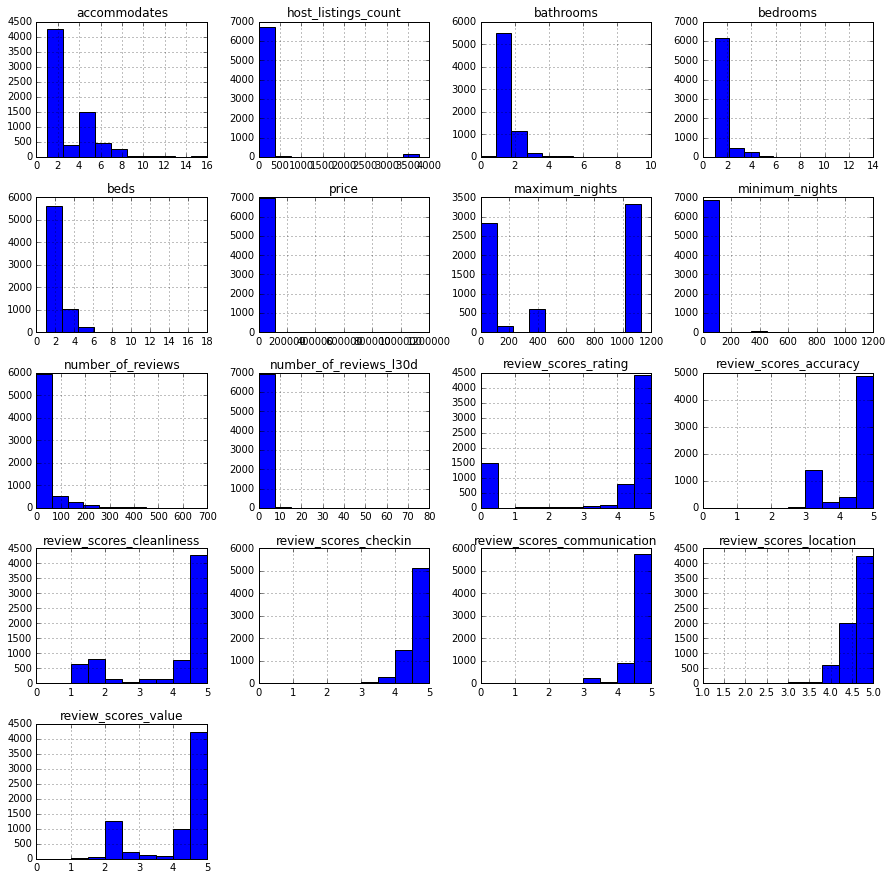

In [211]:
df_imputed_dummies[imp_numerical_columns].hist(figsize=(15,15));

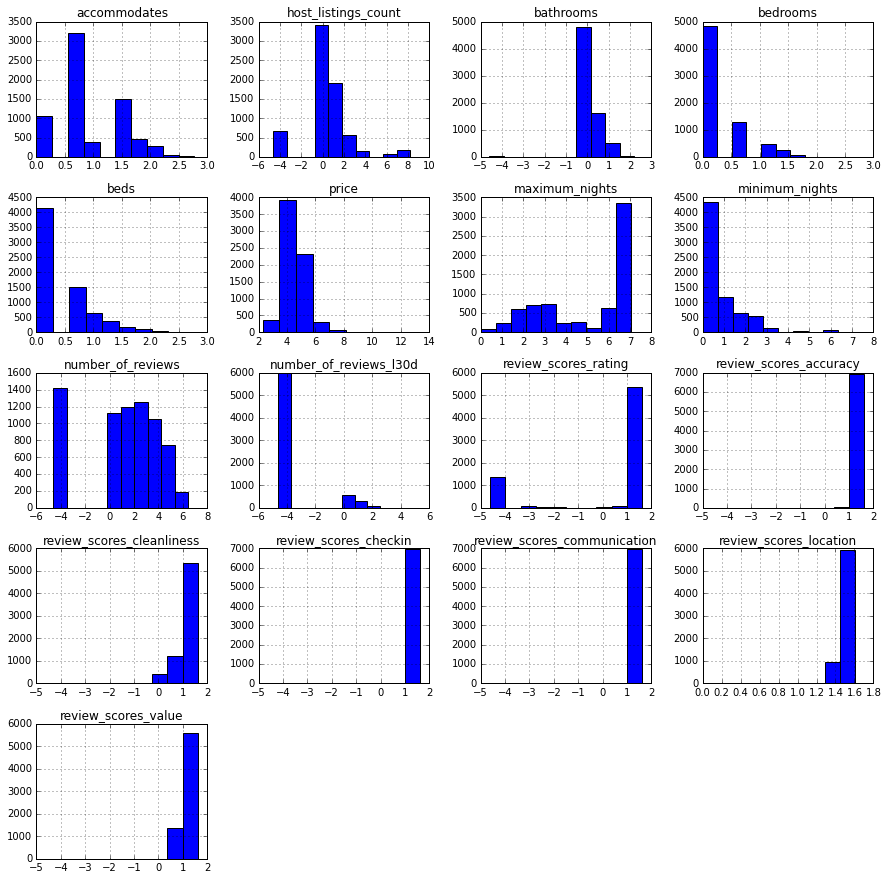

In [212]:
# Log transforming columns
for cols in imp_numerical_columns:
    df_imputed_dummies[cols] = df_imputed_dummies[cols].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    df_imputed_dummies[cols] = np.log(df_imputed_dummies[cols])

df_imputed_dummies[imp_numerical_columns].hist(figsize=(15,15));

In [213]:
#Splitting the data for modelling
'''Finally, the predictive features X and the target feature y can be separated, and X will be scaled. StandardScaler from sklearn will be used, 
but the type of scaling used could be experimented with later to see if alternative versions yield better results.'''
# Separating X and y
X3 = df_imputed_dummies.drop('price', axis=1)
y3 = df_imputed_dummies.price

# Scaling
scaler = StandardScaler()
X3 = pd.DataFrame(scaler.fit_transform(X3), columns=list(X3.columns))

In [214]:
# Splitting into train and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=123)
print(X_train3.shape); print(X_test3.shape)

(5572, 59)
(1393, 59)


In [215]:
#OLS
# Cross validate on 5 folds
cv = KFold(n_splits = 5)
linreg = LinearRegression()

# Store r2 and mean squared error of testing data for graphing purposes later
MSE_3 =[]
R2_3 = []

for train, test in cv.split(X3):
    # Fit linreg
    linreg.fit(X_train3, y_train3)
    
    #predict training
    y_predict_train3 = linreg.predict(X_train3)
    # Predict and score testing
    y_predict_test3 = linreg.predict(X_test3)
    R2_3.append(linreg.score(X_test3, y_test3))
    MSE_3.append(mean_squared_error(y_test3, y_predict_test3))

# Output and store scores after CV
lin_testing_set_score = np.mean(R2_3)
lin_mean_squared_error = np.mean(MSE_3)
print("Linear Regression")
print("\tR-squared training data:  " + str(round(r2_score(y_train3, y_predict_train3), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train3,y_predict_train3)), 3)))
print('\tR-Squared on testing data: ' + str(round(lin_testing_set_score, 3)))
print('\tRoot Mean Squared Error on testing data: ' + str(round(sqrt(lin_mean_squared_error), 3)))

Linear Regression
	R-squared training data:  0.498
	RMSE training data: 0.545
	R-Squared on testing data: 0.449
	Root Mean Squared Error on testing data: 0.563


In [216]:
#Ridge Regression
# Tuning paramater values for Ridge
lambdas = 10.**np.array([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Perform Ridge regression using expanded set of predictors, 
# choose best regularization parameter lambda using 5-fold x-validation
cv = KFold(n_splits = 5)
ridge = RidgeCV(alphas = lambdas, fit_intercept = True, cv = 5)

# Store r2 and median absolute error
MSE_3 =[]
R2_3 = []

# Find best score by cross validating over 5 folds
for train, test in cv.split(X3):
    # Fit linreg
    ridge.fit(X_train3, y_train3)
    
    #predict training
    y_predict_train3 = ridge.predict(X_train3)
    # Predict and score
    Y_predict3 = ridge.predict(X_test3)
    R2_3.append(ridge.score(X_test3, y_test3))
    MSE_3.append(mean_squared_error(y_test3, Y_predict3))
    
# Output and store scores after CV
ridge_testing_set_score = np.mean(R2_3)
ridge_mean_squared_error = np.mean(MSE_3)
print("Ridge Regression")
print("\tR-squared training data:  " + str(round(r2_score(y_train3, y_predict_train3), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train3,y_predict_train3)), 3)))
print('\tR-squared testing data: ' + str(round(ridge_testing_set_score,3)))
print('\tRoot Mean Squared Error testing data: ' + str(round(sqrt(ridge_mean_squared_error),3)))


Ridge Regression
	R-squared training data:  0.495
	RMSE training data: 0.546
	R-squared testing data: 0.456
	Root Mean Squared Error testing data: 0.559


In [217]:
# Perform Lasso regression using expanded set of predictors, 
# choose best regularization parameter lambda using 5-fold x-validation
cv = KFold(n_splits = 5)
lasso = LassoCV(alphas = lambdas, tol = 0.5, fit_intercept = True, cv = 5)

# Store r2 and median absolute error
MSE_3 =[]
R2_3 = []

# Find best score by cross validating over 5 folds
for train, test in cv.split(X3):
    # Fit linreg
    lasso.fit(X_train3, y_train3)
    
    #predict training
    y_predict_train3 = lasso.predict(X_train3)
    # Predict and score
    Y_predict3 = lasso.predict(X_test3)
    R2_3.append(lasso.score(X_test3, y_test3))
    MSE_3.append(mean_squared_error(y_test3, Y_predict3))

# Output and store scores after CV
lasso_testing_set_score = np.mean(R2_3)
lasso_mean_squared_error = np.mean(MSE_3)
print("Lasso Regression")
print("\tR-squared training data:  " + str(round(r2_score(y_train3, y_predict_train3), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train3,y_predict_train3)), 3)))
print('\tR-squared testing data: ' + str(round(lasso_testing_set_score,3)))
print('\tThe root mean squared error testing data: ' + str(round(sqrt(lasso_mean_squared_error),3)))

Lasso Regression
	R-squared training data:  0.493
	RMSE training data: 0.547
	R-squared testing data: 0.444
	The root mean squared error testing data: 0.565


##Ensemble models

In [218]:
from sklearn.ensemble import RandomForestRegressor
# Fit random forest
rf = RandomForestRegressor(oob_score = True)
rf.fit(X_train3, y_train3)

#predict training
y_predict_train3 = rf.predict(X_train3)
# Predict and score RF
y_predict3 = rf.predict(X_test3)
rf_testing_set_score = rf.score(X_test3, y_test3)
rf_mean_squared_error = mean_squared_error(y_test3, y_predict3)
print("Random Forest Regressor")
print("\tR-squared training data:  " + str(round(r2_score(y_train3, y_predict_train3), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train3,y_predict_train3)), 3)))
print('\tR-squared testing data: ' + str(round(rf_testing_set_score,3)))
print('\tThe root mean squared error testing data:  ' + str(round(sqrt(rf_mean_squared_error),3)))

Random Forest Regressor
	R-squared training data:  0.95
	RMSE training data: 0.172
	R-squared testing data: 0.638
	The root mean squared error testing data:  0.456


In [219]:
#Tuned random forest regressor
# Parameters to run grid search on
tuned_parameters = {
    "n_estimators": [10, 30, 50],
    "n_jobs": [-1],
   # "oob_score": [True],
    "max_features": [None, 'log2', 'auto']
}

# Run 3-fold CV grid search to tune hyperparameters
rf_tuned = GridSearchCV(RandomForestRegressor(), cv = 3, param_grid = tuned_parameters)

# Score model
preds = rf_tuned.fit(X_train3, y_train3)
best = rf_tuned.best_estimator_ 
y_predict_train3 = rf_tuned.predict(X_train3)
y_predict3 = rf_tuned.predict(X_test3)
rft_testing_set_score = rf_tuned.score(X_test3, y_test3)
rft_mean_squared_error = mean_squared_error(y_test3, y_predict3)

# Output score and model info
print('Tuned Random Forest Regressor')
print('\tThe best paramaters are:', rf_tuned.best_params_)
print("\tR-squared training data:  " + str(round(r2_score(y_train3, y_predict_train3), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train3,y_predict_train3)), 3)))
print('\tR-squared testing data: ' + str(round(rft_testing_set_score,3)))
print('\tThe root mean squared error testing data: ' + str(round(sqrt(rft_mean_squared_error),3)))

Tuned Random Forest Regressor
	The best paramaters are: {'max_features': 'auto', 'n_estimators': 50, 'n_jobs': -1}
	R-squared training data:  0.945
	RMSE training data: 0.18
	R-squared testing data: 0.634
	The root mean squared error testing data: 0.459


In [220]:
#AdaBoost Regressor (with Random Forest as Base Estimator)
from sklearn.ensemble import AdaBoostRegressor
# Fit AdaBoost forest
ada = AdaBoostRegressor(base_estimator = rf)
ada.fit(X_train3, y_train3)

y_predict_train3 = ada.predict(X_train3)

# Predict and score adaboost
y_predict3 = ada.predict(X_test3)
ada_testing_set_score = ada.score(X_test3, y_test3)
ada_mean_squared_error = mean_squared_error(y_test3, y_predict3)

#output score of model
print('AdaBoost Regressor')
print("\tR-squared training data:  " + str(round(r2_score(y_train3, y_predict_train3), 3)))
print("\tRMSE training data: " + str(round(sqrt(mean_squared_error(y_train3,y_predict_train3)), 3)))
print('\tThe R-squared testing data: ' + str(round(ada_testing_set_score,3)))
print('\tThe root mean squared error testing data: ' + str(round(sqrt(ada_mean_squared_error),3)))

AdaBoost Regressor
	R-squared training data:  0.983
	RMSE training data: 0.101
	The R-squared testing data: 0.67
	The root mean squared error testing data: 0.435


In [221]:
#Tuned AdaBoost Regressor (with Decision Tree as Base Estimator)
# Parameters to run grid search on
tuned_parameters = {
    "n_estimators": [10, 25, 50, 100],
    "learning_rate": [0.01, 0.1, 1],
    "loss" : ['linear', 'square']
}

clf = GridSearchCV(AdaBoostRegressor(), cv=3, param_grid=tuned_parameters)
preds = clf.fit(X_train3, y_train3)
best = clf.best_estimator_ 
y_predict_train3 = clf.predict(X_train3)
Y_predict3 = clf.predict(X_test3)
clf_testing_set_score = clf.score(X_test3, y_test3)
clf_mean_sqrd_error = mean_squared_error(y_test3, Y_predict3)

# Output score and model info
print('Tuned AdaBoost Regressor')
print('\tThe best paramaters are:', clf.best_params_)
print("\tR-squared training data:  " + str(round(r2_score(y_train3, y_predict_train3), 3)))
print("\tMSE training data: " + str(round(sqrt(mean_squared_error(y_train3,y_predict_train3)), 3)))
print('\tR-squared testing data: ' + str(round(clf_testing_set_score,3)))
print('\tThe mean squared error testing data: ' + str(round(sqrt(clf_mean_sqrd_error),3)))

Tuned AdaBoost Regressor
	The best paramaters are: {'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 50}
	R-squared training data:  0.514
	MSE training data: 0.536
	R-squared testing data: 0.457
	The mean squared error testing data: 0.558


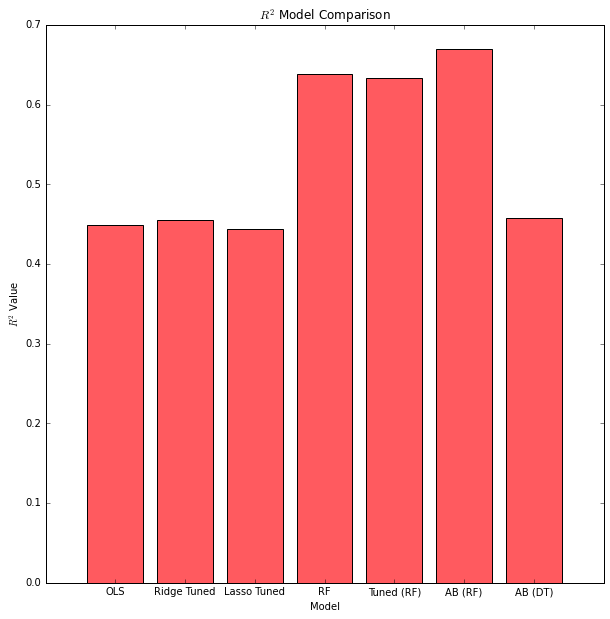

In [222]:
# Graph x and y axis values
labels = np.array(['OLS','Ridge Tuned','Lasso Tuned', 'RF', 'Tuned (RF)', 'AB (RF)', 'AB (DT)'])
error_val = np.array([lin_testing_set_score, ridge_testing_set_score, lasso_testing_set_score, 
                      rf_testing_set_score, rft_testing_set_score, ada_testing_set_score, 
                      clf_testing_set_score])

# Arrange bars
pos = np.arange(error_val.shape[0])
#srt = np.argsort(error_val)

# Plots R^2 bars across functions
plt.figure(figsize=(10,10))
plt.bar(pos, error_val, align = 'center', color=BNB_RED)
plt.xticks(pos, labels)
plt.xlabel('Model')
plt.ylabel('$R^2$ Value')
plt.title('$R^2$ Model Comparison')
plt.ylim(0,0.70)
plt.show()

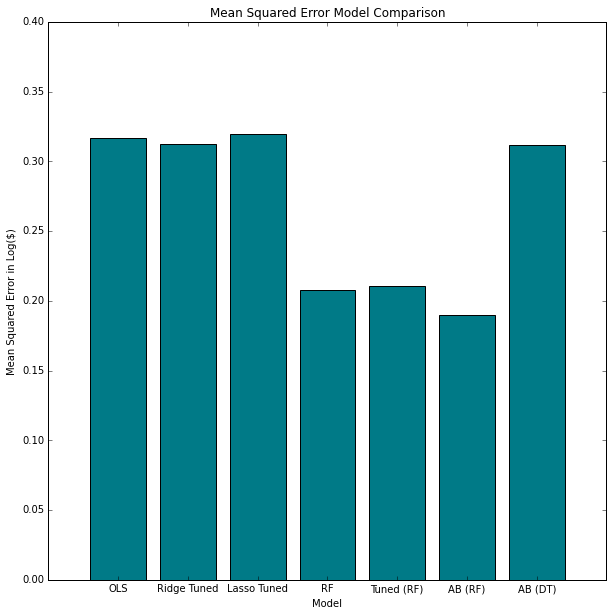

In [223]:
#MSE Chart
# Graph x and y axis values
labels = np.array(['OLS','Ridge Tuned','Lasso Tuned', 'RF', 'Tuned (RF)', 'AB (RF)', 'AB (DT)'])
error_val = np.array([lin_mean_squared_error, ridge_mean_squared_error, lasso_mean_squared_error, 
                      rf_mean_squared_error, rft_mean_squared_error, ada_mean_squared_error, 
                      clf_mean_sqrd_error])

# Arrange bars
pos = np.arange(error_val.shape[0])
#srt = np.argsort(error_val)

# Plots Mean Absolute Variance bars across functions
plt.figure(figsize=(10,10))
#plt.bar(pos, error_val[srt], align = 'center', color=BNB_BLUE)
#plt.xticks(pos, labels[srt])
plt.bar(pos, error_val, align = 'center', color=BNB_BLUE)
plt.xticks(pos, labels)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error in Log($)')
plt.title('Mean Squared Error Model Comparison')
plt.ylim(0,0.4)
plt.show()

##Advanced Modelling

In [224]:
'''Before building a neural network, a vanilla XGBoost model will be used to predict price, in order to provide a baseline level of accuracy and a 
measure of feature importance. This most likely provides the best achievable accuracy using machine learning models (other than possible small accuracy
increases from hyper-parameter tuning) due to XGBoost's superior performance'''
#XGboost model
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train3, y_train3)
training_preds_xgb_reg = xgb_reg.predict(X_train3)
val_preds_xgb_reg = xgb_reg.predict(X_test3)

xgb_reg_end = time.time()

print('Vanilla XGBoost')
print(f"\tTime taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\tR-Squared on Training data: ", round(r2_score(y_train3, training_preds_xgb_reg),3))
print("\tMean Squared Error on training data: ", round(sqrt(mean_squared_error(y_train3, training_preds_xgb_reg)),3))
print("\tR-Squared on testing data: ", round(r2_score(y_test3, val_preds_xgb_reg), 3))
print("\tMean Squared Error on testing data: ", round(sqrt(mean_squared_error(y_test3, val_preds_xgb_reg)), 3))

[12:33:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Vanilla XGBoost
	Time taken to run: 0.0 minutes
	R-Squared on Training data:  0.712
	Mean Squared Error on training data:  0.412
	R-Squared on testing data:  0.638
	Mean Squared Error on testing data:  0.456


In [225]:
ft_weights_xgb_reg3 = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train3.columns)
ft_weights_xgb_reg3.sort_values('weight', inplace=True)
ft_weights_xgb_reg3

weight
host_verified_selfie                  0.000000
host_verified_phone                   0.000000
host_has_profile_pic                  0.000000
host_identity_verified                0.000000
property_type_Shared Room Other       0.000000
property_type_Shared Room Apartment   0.000000
host_verified_identity_manual         0.000000
host_verified_google                  0.000000
property_type_Private Room House      0.000000
has_availability                      0.000000
property_type_Private Room Apartment  0.000000
room_type_Private room                0.000000
property_type_Entire Apartment        0.000000
property_type_Other                   0.000000
family_kid_friendly                   0.000683
wifi                                  0.001254
host_verified_reviews                 0.001990
laptop_friendly_workspace             0.002386
beds                                  0.003065
kitchen                               0.003320
location_DunLaoghaire-Rathdown        0.003346
number_of_reviews_l30d                0.003615
heating                               0.003633
location_Fingal                       0.003663
host_greets_you                       0.004062
host_verified_government_id           0.004265
host_verified_email                   0.004409
host_verified_jumio                   0.005840
washer                                0.006070
minimum_nights                        0.006168
property_type_Entire House            0.006223
garden                                0.006721
room_type_Hotel room                  0.006805
host_days_active                      0.006905
host_verified_facebook                0.006917
bathrooms                             0.007210
review_scores_value                   0.007805
number_of_reviews                     0.007915
review_scores_cleanliness             0.008009
review_scores_accuracy                0.008023
property_type_Entire Other            0.010300
host_is_superhost                     0.010713
maximum_nights                        0.011313
review_scores_checkin                 0.011603
instant_bookable                      0.011893
location_South_Dublin                 0.012188
review_scores_location                0.012298
tv                                    0.013797
room_type_Shared room                 0.015345
property_type_Private Room Other      0.017373
location_Dublin_City                  0.017872
review_scores_rating                  0.021210
availability_365                      0.021695
property_type_Shared Room House       0.035601
review_scores_communication           0.048533
host_listings_count                   0.055515
bedrooms                              0.060596
accommodates                          0.109229
room_type_Entire home/apt             0.372623

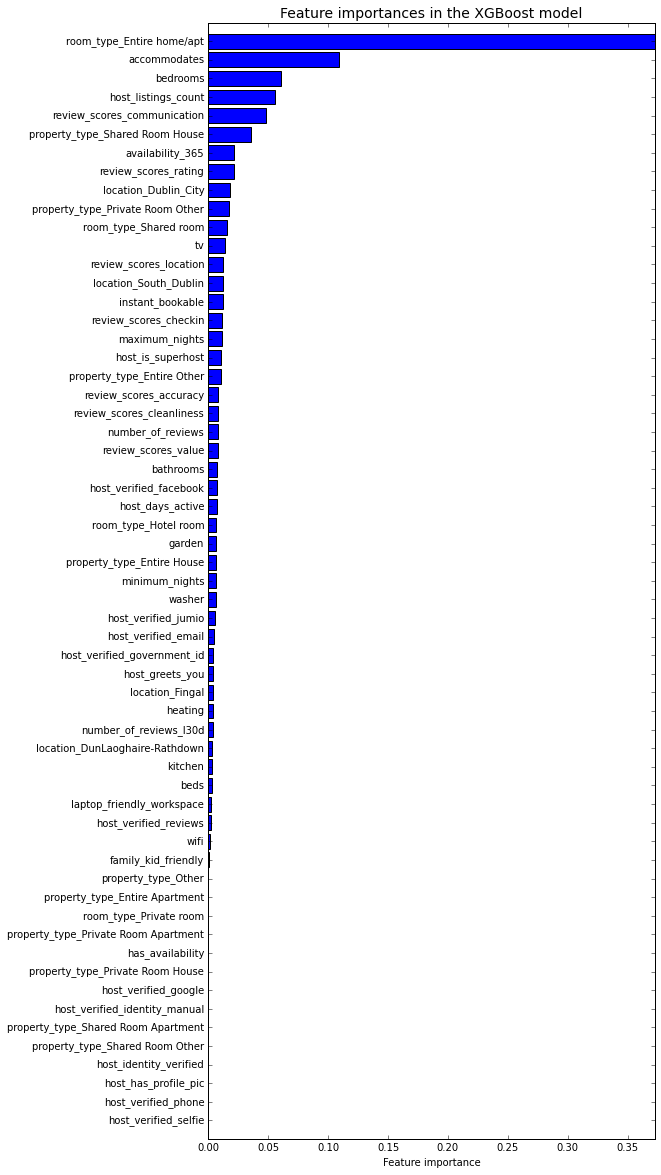

In [226]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg3.index, ft_weights_xgb_reg3.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()
#We see a change compared to when we dropped the null rows. We see bedrooms is less important dropping from 3rd to 5th, however property_type_entire_house jumps up roughly 30 spots compared to when we dropped the null data.

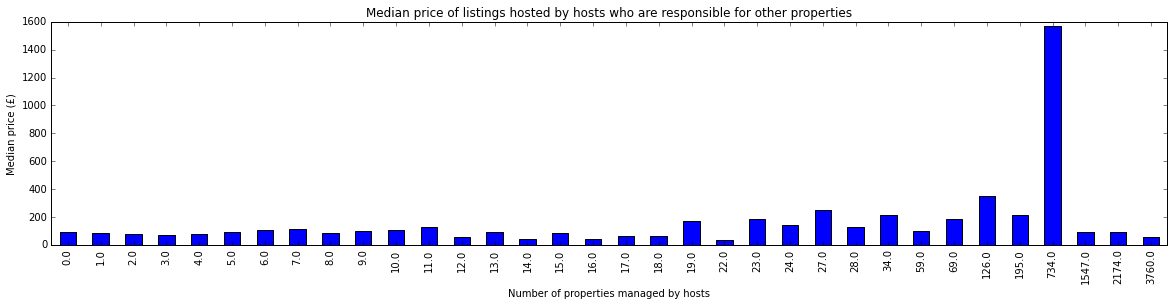

In [227]:
# Median price for different host listing counts
plt.figure()
df_imputed_values.groupby('host_listings_count').price.median().plot(figsize=(20,4), kind='bar')
plt.title('Median price of listings hosted by hosts who are responsible for other properties')
plt.xlabel('Number of properties managed by hosts')
plt.ylabel('Median price (£)');
#Same as df_has_review which makes sense as same amount of data rows compared to dropped null dataframe.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               7680      
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 106,753
Trainable params: 106,753
Non-trainable params: 0
_________________________________________________________________
None


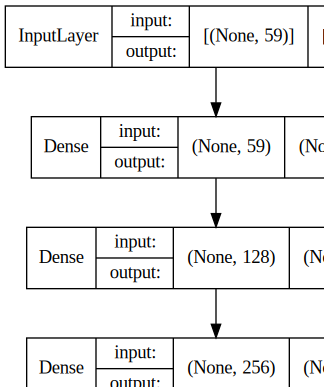

In [228]:
#Three layer neural network
'''For the initial version of the neural network, a relatively shallow three layer NN will be created. It will consist of densely-connected layers,
and use a relu activation function for the hidden layers and a linear activation function for the output layer, as it is being used for a regression task.
The loss function will be mean squared error (again, because this is for regression).'''
# Building the model
nn2_3 = models.Sequential()
nn2_3.add(layers.Dense(128, input_shape=(X_train3.shape[1],), activation='relu'))
nn2_3.add(layers.Dense(256, activation='relu'))
nn2_3.add(layers.Dense(256, activation='relu'))
nn2_3.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2_3.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn2_3.summary())

# Visualising the neural network
SVG(model_to_dot(nn2_3, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

In [229]:
# Training the model
nn2_start = time.time()

nn2_history_ = nn2_3.fit(X_train3,
                  y_train3,
                  epochs=100,
                  batch_size=256,
                  validation_split = 0.1)

nn2_end = time.time()

print(f"Time taken to run: {round((nn2_end - nn2_start)/60,1)} minutes")

Epoch 1/100
20/20 [==============================] - 1s 16ms/step - loss: 6.3229 - mean_squared_error: 6.3229 - val_loss: 1.4709 - val_mean_squared_error: 1.4709
Epoch 2/100
20/20 [==============================] - 0s 8ms/step - loss: 1.2329 - mean_squared_error: 1.2329 - val_loss: 0.5312 - val_mean_squared_error: 0.5312
Epoch 3/100
20/20 [==============================] - 0s 8ms/step - loss: 0.5674 - mean_squared_error: 0.5674 - val_loss: 0.3887 - val_mean_squared_error: 0.3887
Epoch 4/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4027 - mean_squared_error: 0.4027 - val_loss: 0.3407 - val_mean_squared_error: 0.3407
Epoch 5/100
20/20 [==============================] - 0s 9ms/step - loss: 0.3409 - mean_squared_error: 0.3409 - val_loss: 0.3045 - val_mean_squared_error: 0.3045
Epoch 6/100
20/20 [==============================] - 0s 8ms/step - loss: 0.3017 - mean_squared_error: 0.3017 - val_loss: 0.2869 - val_mean_squared_error: 0.2869
Epoch 7/100
20/20 [==============

In [230]:
#RMSE and r squared values
y_test_pred3 = nn2_3.predict(X_test3)
y_train_pred3 = nn2_3.predict(X_train3)
print('Three layer Neural Network')
print("\tR-squared on Training data: ", round(r2_score(y_train3, y_train_pred3),3))
print("\tMean Sqiared Error on Training data: ", round(sqrt(mean_squared_error(y_train3, y_train_pred3)),3))
print("\tR-squared on Testing data: ", round(r2_score(y_test3, y_test_pred3),3))
print("\tMean Squared Error on Testing data: ", round(sqrt(mean_squared_error(y_test3, y_test_pred3)),3))


Three layer Neural Network
	R-squared on Training data:  0.933
	Mean Sqiared Error on Training data:  0.198
	R-squared on Testing data:  0.396
	Mean Squared Error on Testing data:  0.589


#Option 4: Bin review columns and one hot encode columns. <br>
Airbnb deems a review of 3/5 a good review, anything less than 3 is deemed as a bad review.


*   0 = Unknown (Not reviewed yet)
*   1-2 = listings that receuved a Poor review
*   3+ = Listings that received a good rating.





#Classification Modelling Approach 

In [231]:
#Bin price ranges Dropped Null data approach
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5392 entries, 44077 to 53006324
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_is_superhost                             5392 non-null   float64
 1   host_listings_count                           5392 non-null   float64
 2   host_has_profile_pic                          5392 non-null   float64
 3   host_identity_verified                        5392 non-null   float64
 4   accommodates                                  5392 non-null   float64
 5   bedrooms                                      5392 non-null   float64
 6   beds                                          5392 non-null   float64
 7   price                                         5392 non-null   float64
 8   minimum_nights                                5392 non-null   float64
 9   maximum_nights                                5392 non-

In [232]:
#I have not removed outliers in the data and therefore the mean may be influenced by outliers. Therefore when binnning the price column I will use the median.
mean_price = round(df_dropped_nulls['price'].mean(),3)
median_price = round(df_dropped_nulls['price'].median(),3)

print(f'Mean price: {mean_price}.')
print(f'Median price: {median_price}.')

Mean price: 125.387.
Median price: 85.0.


In [233]:
df_dropped_nulls['price'].describe()

count    5392.000000
mean      125.387240
std       171.452778
min        10.000000
25%        55.000000
50%        85.000000
75%       142.000000
max      4357.000000
Name: price, dtype: float64

In [234]:
'''Create A column where:
0 = listing was Below the average price for Dublin and
1 = listing was Above the average price for Dublin.'''
df_dropped_nulls['price_cat'] = np.where(df_dropped_nulls['price']<125.40, 0, 1)
df_dropped_nulls[['price','price_cat']]
df_dNAN_cat = df_dropped_nulls.drop(('price'), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [235]:
df_dNAN_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5392 entries, 44077 to 53006324
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   host_is_superhost              5392 non-null   float64
 1   host_listings_count            5392 non-null   float64
 2   host_has_profile_pic           5392 non-null   float64
 3   host_identity_verified         5392 non-null   float64
 4   neighbourhood_cleansed         5392 non-null   object 
 5   property_type                  5392 non-null   object 
 6   room_type                      5392 non-null   object 
 7   accommodates                   5392 non-null   int64  
 8   bedrooms                       5392 non-null   float64
 9   beds                           5392 non-null   float64
 10  minimum_nights                 5392 non-null   int64  
 11  maximum_nights                 5392 non-null   int64  
 12  has_availability               5392 non-

In [236]:
#scaling our numerical columns which are number_of_reviews_l30d, review_scores_location,review_scores_value ,review_scores_communication, review_scores_checkin,
#review_scores_cleanliness,number_of_reviews ,review_scores_rating, and review_scores_accuracy
#scaling the data allows for numerical features to be within the same range as others 
dNAN_numerical = ['accommodates','bedrooms','beds','minimum_nights', 'maximum_nights', 'availability_365', 'host_days_active', 'number_of_reviews_l30d', 'review_scores_location', 'review_scores_value' ,'review_scores_communication', 'review_scores_checkin', 'review_scores_cleanliness', 'number_of_reviews' ,'review_scores_rating', 'review_scores_accuracy']
scaler = StandardScaler()
df_dNAN_cat[dNAN_numerical] = scaler.fit_transform(df_dNAN_cat[dNAN_numerical])
df_dNAN_cat.head()

host_is_superhost  host_listings_count  host_has_profile_pic  \
id                                                                     
44077                 1.0                  3.0                   1.0   
85156                 1.0                  3.0                   1.0   
159889                0.0                  0.0                   1.0   
162809                1.0                  2.0                   1.0   
165828                1.0                  5.0                   1.0   

        host_identity_verified neighbourhood_cleansed       property_type  \
id                                                                          
44077                      1.0  Dn Laoghaire-Rathdown  Private Room House   
85156                      1.0  Dn Laoghaire-Rathdown  Private Room House   
159889                     1.0            Dublin City  Private Room House   
162809                     1.0  Dn Laoghaire-Rathdown  Private Room House   
165828                     1.0            Dublin City        Entire House   

              room_type  accommodates  bedrooms      beds  ...  \
id                                                         ...   
44077      Private room     -0.539535 -0.548989  0.121870  ...   
85156      Private room     -0.539535 -0.548989 -0.604233  ...   
159889     Private room     -1.054525 -0.548989 -0.604233  ...   
162809     Private room      1.520422  0.562596  1.574077  ...   
165828  Entire home/apt      1.005433 -0.548989  0.847974  ...   

        host_verified_email  host_verified_facebook  host_verified_google  \
id                                                                          
44077                   1.0                     1.0                   0.0   
85156                   1.0                     1.0                   0.0   
159889                  1.0                     0.0                   0.0   
162809                  1.0                     0.0                   0.0   
165828                  1.0                     0.0                   0.0   

        host_verified_government_id  host_verified_identity_manual  \
id                                                                   
44077                           1.0                            1.0   
85156                           1.0                            1.0   
159889                          1.0                            1.0   
162809                          1.0                            0.0   
165828                          1.0                            0.0   

        host_verified_jumio  host_verified_phone  host_verified_reviews  \
id                                                                        
44077                   1.0                  1.0                    1.0   
85156                   1.0                  1.0                    1.0   
159889                  0.0                  1.0                    1.0   
162809                  1.0                  1.0                    1.0   
165828                  1.0                  1.0                    1.0   

        host_verified_selfie  price_cat  
id                                       
44077                    1.0          0  
85156                    1.0          0  
159889                   1.0          0  
162809                   0.0          0  
165828                   0.0          0  

[5 rows x 45 columns]

In [237]:
#Get dummies
#one hot encoding the columns with more than two different attributes
dfC_dNAN = pd.get_dummies(data=df_dNAN_cat,columns= ['neighbourhood_cleansed','property_type','room_type'])
dfC_dNAN.head()


host_is_superhost  host_listings_count  host_has_profile_pic  \
id                                                                     
44077                 1.0                  3.0                   1.0   
85156                 1.0                  3.0                   1.0   
159889                0.0                  0.0                   1.0   
162809                1.0                  2.0                   1.0   
165828                1.0                  5.0                   1.0   

        host_identity_verified  accommodates  bedrooms      beds  \
id                                                                 
44077                      1.0     -0.539535 -0.548989  0.121870   
85156                      1.0     -0.539535 -0.548989 -0.604233   
159889                     1.0     -1.054525 -0.548989 -0.604233   
162809                     1.0      1.520422  0.562596  1.574077   
165828                     1.0      1.005433 -0.548989  0.847974   

        minimum_nights  maximum_nights  has_availability  ...  \
id                                                        ...   
44077        -0.097991        0.999556                 1  ...   
85156        -0.097991       -1.074604                 1  ...   
159889       -0.133106       -1.074604                 1  ...   
162809       -0.168220       -1.091513                 1  ...   
165828       -0.062877       -0.428308                 1  ...   

        property_type_Private Room Apartment  \
id                                             
44077                                      0   
85156                                      0   
159889                                     0   
162809                                     0   
165828                                     0   

        property_type_Private Room House  property_type_Private Room Other  \
id                                                                           
44077                                  1                                 0   
85156                                  1                                 0   
159889                                 1                                 0   
162809                                 1                                 0   
165828                                 0                                 0   

        property_type_Shared Room Apartment  property_type_Shared Room House  \
id                                                                             
44077                                     0                                0   
85156                                     0                                0   
159889                                    0                                0   
162809                                    0                                0   
165828                                    0                                0   

        property_type_Shared Room Other  room_type_Entire home/apt  \
id                                                                   
44077                                 0                          0   
85156                                 0                          0   
159889                                0                          0   
162809                                0                          0   
165828                                0                          1   

        room_type_Hotel room  room_type_Private room  room_type_Shared room  
id                                                                           
44077                      0                       1                      0  
85156                      0                       1                      0  
159889                     0                       1                      0  
162809                     0                       1                      0  
165828                     0                       0                      0  

[5 rows x 60 columns]

In [238]:
dfC_dNAN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5392 entries, 44077 to 53006324
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_is_superhost                             5392 non-null   float64
 1   host_listings_count                           5392 non-null   float64
 2   host_has_profile_pic                          5392 non-null   float64
 3   host_identity_verified                        5392 non-null   float64
 4   accommodates                                  5392 non-null   float64
 5   bedrooms                                      5392 non-null   float64
 6   beds                                          5392 non-null   float64
 7   minimum_nights                                5392 non-null   float64
 8   maximum_nights                                5392 non-null   float64
 9   has_availability                              5392 non-

In [239]:
'''Finally, the predictive features X and the target feature y can be separated, and X will be scaled. StandardScaler from sklearn will be used, 
but the type of scaling used could be experimented with later to see if alternative versions yield better results.'''
# Separating X and y
X = dfC_dNAN.drop('price_cat', axis=1)
y = dfC_dNAN.price_cat


# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape); print(X_test.shape)

(4313, 59)
(1079, 59)


In [240]:
#importing our models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import metrics   
from sklearn.model_selection import GridSearchCV 
#importing our model evaluators
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, roc_auc_score, auc

In [241]:
#logistic regression // INcrease max iterations alert
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(X_train,y_train)
accuracy_log_tr = log_reg.score(X_train, y_train)
accuracy_log = log_reg.score(X_test,y_test)
print("Logistic Regression Accuracy on Training :",accuracy_log_tr)
print("Logistic Regression Accuracy on Testing :",accuracy_log)

Logistic Regression Accuracy on Training : 0.8571759795965685
Logistic Regression Accuracy on Testing : 0.8359592215013901


In [242]:
#using classification report to check the accuracy of predictions
log_pred= log_reg.predict(X_test)
log_report = classification_report(y_test,log_pred)
print(log_report)

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       763
           1       0.75      0.66      0.70       316

    accuracy                           0.84      1079
   macro avg       0.81      0.78      0.79      1079
weighted avg       0.83      0.84      0.83      1079



Text(0.5, 57.0, 'Predicted')

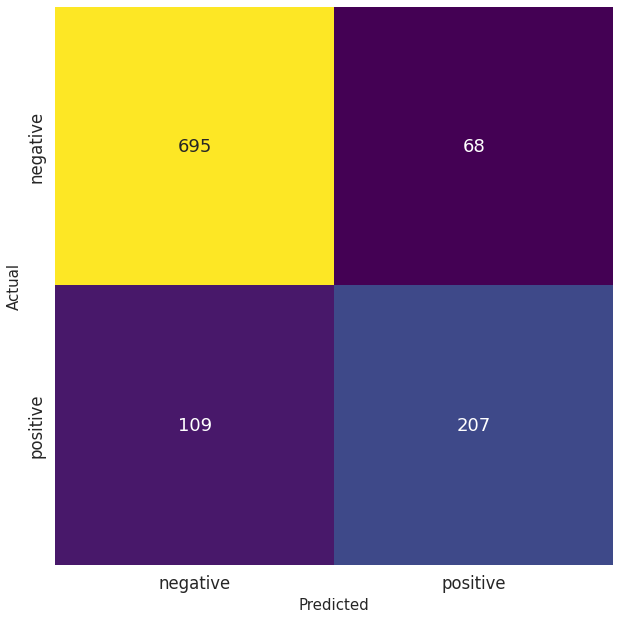

In [243]:
#create confusion matrix
conf_matrix = confusion_matrix(y_test,log_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

In [244]:
y_test.nunique

<bound method IndexOpsMixin.nunique of id
32100890    1
21681711    1
26495991    1
19826649    1
38322404    0
           ..
24194293    0
50031150    0
13338141    0
23763860    1
29462007    1
Name: price_cat, Length: 1079, dtype: int64>

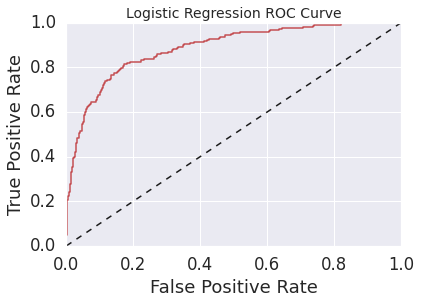

In [245]:
log_pred_prob = log_reg.predict_proba(X_test)[:,1]
#y_test_map = y_test.map({'Below Average': 1, 'Above Average': 0}).astype(int)
false_positive, true_positive, thresholds = roc_curve(y_test, log_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(false_positive, true_positive, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=14)
plt.show();

The above graphs show that despite the original accuracy for the testing data being reasonably high, upon further inspection using classification report and confusion matrix shows its inability to predict the customers who churned. Due to the data being imbalanced, we will try fitting logistic regression model with the help of cross validation.

In [246]:
# fit a svm on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

model = LogisticRegression()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.849


We can see that the Logistic Regression Model is giving an average ROC AUC score of 0.799 which is a good benchmark given that it is the most simple of the model. We will see can we improve this score with our other models.

In [247]:
#SVM
svm = SVC(probability=True)
svm.fit(X_train, y_train)
accuracy_svm_tr = svm.score(X_train, y_train)
accuracy_svm = svm.score(X_test,y_test)
print("Support Vector Machine Accuracy on Training :",accuracy_svm_tr)
print("Support Vector Machine Accuracy on Testing:",accuracy_svm)

Support Vector Machine Accuracy on Training : 0.8256434036633434
Support Vector Machine Accuracy on Testing: 0.8192771084337349


In [248]:
svm_pred= svm.predict(X_test)
svm_report = classification_report(y_test,svm_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       763
           1       0.82      0.49      0.62       316

    accuracy                           0.82      1079
   macro avg       0.82      0.72      0.75      1079
weighted avg       0.82      0.82      0.80      1079



Text(0.5, 57.0, 'Predicted')

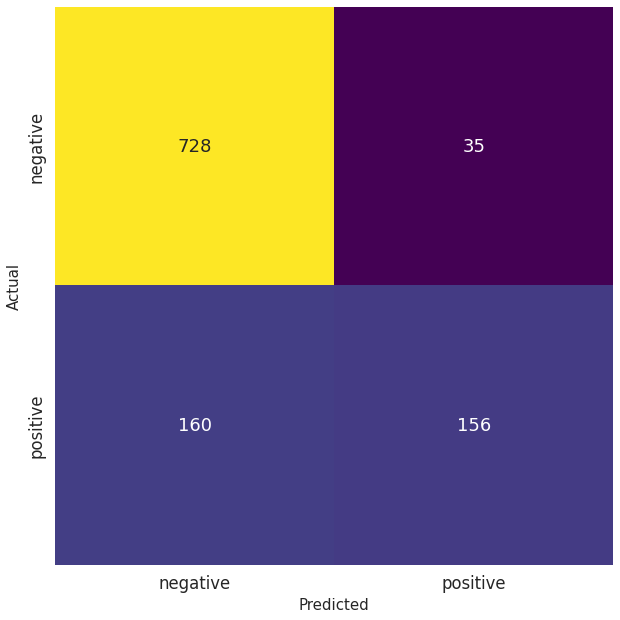

In [249]:
#create confusion matrix
conf_matrix = confusion_matrix(y_test,svm_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

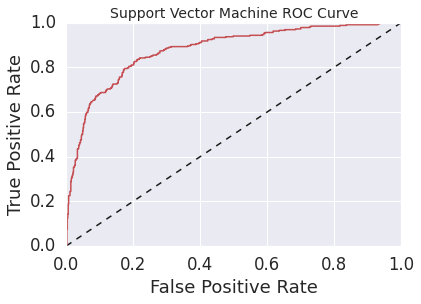

In [250]:
svm_pred_prob = svm.predict_proba(X_test)[:,1]
false_positive, true_positive, thresholds = roc_curve(y_test, svm_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(false_positive, true_positive, label='Support Vector Machine',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Machine ROC Curve',fontsize=14)
plt.show();

In [251]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = SVC(gamma = 'scale')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.818


While SVM did a better job predicting the customers who didn't churn, it performed worse than Logistic Regression predicting those customers who did churn. It also had a lower ROC AUC score. We will now try decision trees to see if we get any improvement.

In [252]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
predictdt_y = decision_tree.predict(X_test)
accuracy_tree_tr = decision_tree.score(X_train,y_train)
accuracy_tree = decision_tree.score(X_test,y_test)
print("Decision Tree accuracy on Training :",accuracy_tree_tr)
print("Decision Tree accuracy on Testing :",accuracy_tree)

Decision Tree accuracy on Training : 1.0
Decision Tree accuracy on Testing : 0.768303985171455


In [253]:
decision_tree_report = classification_report(y_test,predictdt_y)
print(decision_tree_report)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       763
           1       0.60      0.63      0.61       316

    accuracy                           0.77      1079
   macro avg       0.72      0.73      0.72      1079
weighted avg       0.77      0.77      0.77      1079



In [254]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(decision_tree, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.796


Very low performance/accuracy from decision tree. This tree model memorised the training data and had a lot of issues predicting the testing data. Because of this model not being anywhere near as accurate as our Logistic Regression or SVM model in predicting those who churned, we will not try improve its performance.

In [255]:
#Random forest classifier
rf = RandomForestClassifier(n_estimators=300 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

accuracy_tree_rf = rf.score(X_train,y_train)
accuracy_tree_test = rf.score(X_test,y_test)
print("Decision Tree accuracy on Training :",accuracy_tree_rf)
print("Decision Tree accuracy on Testing :",accuracy_tree_test)

# Make predictions
#pred_rf = rf.predict(X_test)
#print(metrics.accuracy_score(y_test, pred_rf))

Decision Tree accuracy on Training : 0.8567122652446093
Decision Tree accuracy on Testing : 0.835032437442076


In [256]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       763
           1       0.74      0.67      0.71       316

    accuracy                           0.84      1079
   macro avg       0.80      0.79      0.80      1079
weighted avg       0.83      0.84      0.83      1079



Text(0.5, 57.0, 'Predicted')

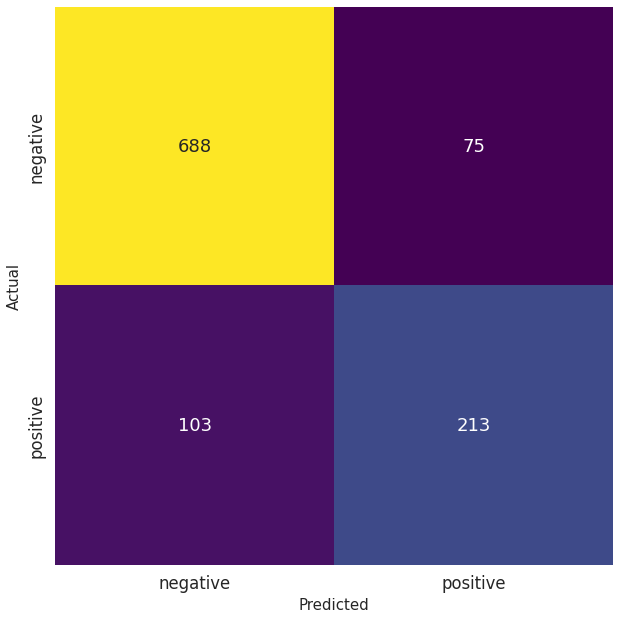

In [257]:
#create confusion matrix
conf_matrix = confusion_matrix(y_test,pred_rf)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

The Random Forest classifier posts almost identical resutls to our Decision Tree model. It is appearing that these two simpler tree models aren't working well on the data. We will double the Random Forest Classifier number of estimators to see if this improves performance

In [258]:
rf_2 = RandomForestClassifier(n_estimators=600 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
rf_2.fit(X_train, y_train)

# Make predictions
pred_rf_2 = rf_2.predict(X_test)
accuracy_tree_rf_2 = rf_2.score(X_train,y_train)
accuracy_tree_test_2 = rf_2.score(X_test,y_test)
print("Decision Tree accuracy on Training :",accuracy_tree_rf_2)
print("Decision Tree accuracy on Testing :",accuracy_tree_test_2)
#print(metrics.accuracy_score(y_test, pred_rf_2))

Decision Tree accuracy on Training : 0.8557848365406909
Decision Tree accuracy on Testing : 0.8331788693234476


In [259]:
print(classification_report(y_test, pred_rf_2))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       763
           1       0.74      0.67      0.70       316

    accuracy                           0.83      1079
   macro avg       0.80      0.79      0.79      1079
weighted avg       0.83      0.83      0.83      1079



Text(0.5, 57.0, 'Predicted')

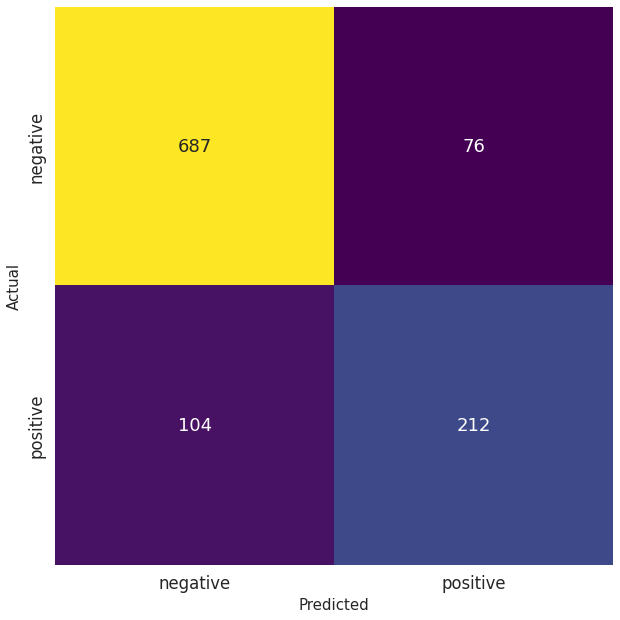

In [260]:
#create confusion matrix
conf_matrix = confusion_matrix(y_test,pred_rf_2)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

In [261]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores_rf = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
scores_rf_2 = cross_val_score(rf_2, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean ROC AUC for Random Forest 300 Estimators: %.3f' % mean(scores_rf))
print('Mean ROC AUC for Random Forest 600 Estimators: %.3f' % mean(scores_rf_2))

Mean ROC AUC for Random Forest 300 Estimators: 0.841
Mean ROC AUC for Random Forest 600 Estimators: 0.842


We can see that by doubling the amount of n_estimators in our Random Forest Classifier model, the performance marginally disimproved. It performed similarly to our SVM model in predicting those who didn't churn, but again the accuracy in predicting those who did was quite low and still not as good as Logistic Regression.

We will next try using Gradient Boosting.

In [262]:
#Gradient Boosting
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
gradient_boosting_tr = gradient_boosting.score(X_train,y_train)
gradient_boosting_test = gradient_boosting.score(X_test,y_test)
print("Gradient Boosting Classifier on Training: ", gradient_boosting_tr)
print("Gradient Boosting Classifier", gradient_boosting_test)

Gradient Boosting Classifier on Training:  0.8856944122420589
Gradient Boosting Classifier 0.8535681186283596


In [263]:
gradient_boosting_pred = gradient_boosting.predict(X_test)
gb_report = classification_report(y_test,gradient_boosting_pred)
print(gb_report)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       763
           1       0.77      0.71      0.74       316

    accuracy                           0.85      1079
   macro avg       0.83      0.81      0.82      1079
weighted avg       0.85      0.85      0.85      1079



Text(0.5, 57.0, 'Predicted')

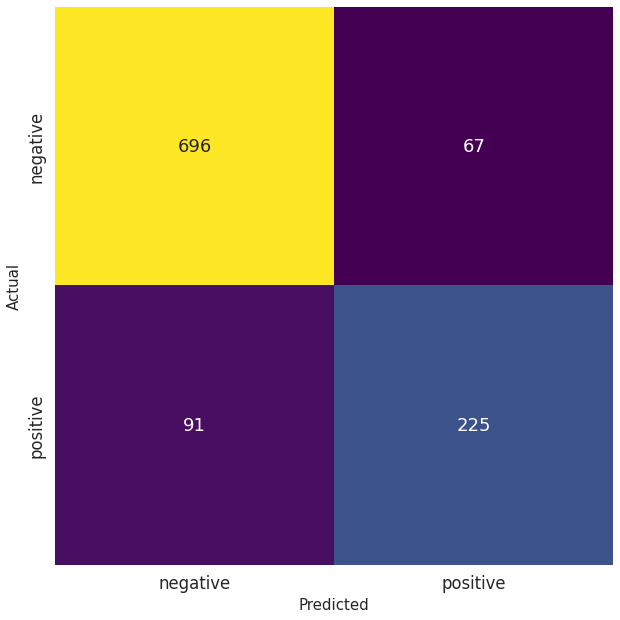

In [264]:
#create confusion matrix
conf_matrix = confusion_matrix(y_test,gradient_boosting_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

In [265]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores_gradient = cross_val_score(gradient_boosting, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean ROC AUC for Gradient Boosting: %.3f' % mean(scores_gradient))

Mean ROC AUC for Gradient Boosting: 0.854


Gradient Boost appears to perform model very similarly to our Logistic Regression model. The two models shared the same ROC AUC score as well as performing very similarly on both churn and non churn customers. They were both a better predictor of the churn customers in comparison to SVM, Decision Tree, and Random Forest Classifier.

This is a model we will explore further.

In [266]:
#AdaBoost
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)
ada_acc_tr = adaboost.score(X_train, y_train)
ada_acc_test = adaboost.score(X_test, y_test)
print("AdaBoost Classifier on Training: ", ada_acc_tr)
print("AdaBoost Classifier on Testing: ", ada_acc_test)

AdaBoost Classifier on Training:  0.8564804080686297
AdaBoost Classifier on Testing:  0.8294717330861909


In [267]:
ada_pred = adaboost.predict(X_test)
ada_report = classification_report(y_test,ada_pred)
print(ada_report)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       763
           1       0.73      0.66      0.69       316

    accuracy                           0.83      1079
   macro avg       0.80      0.78      0.79      1079
weighted avg       0.83      0.83      0.83      1079



Text(0.5, 57.0, 'Predicted')

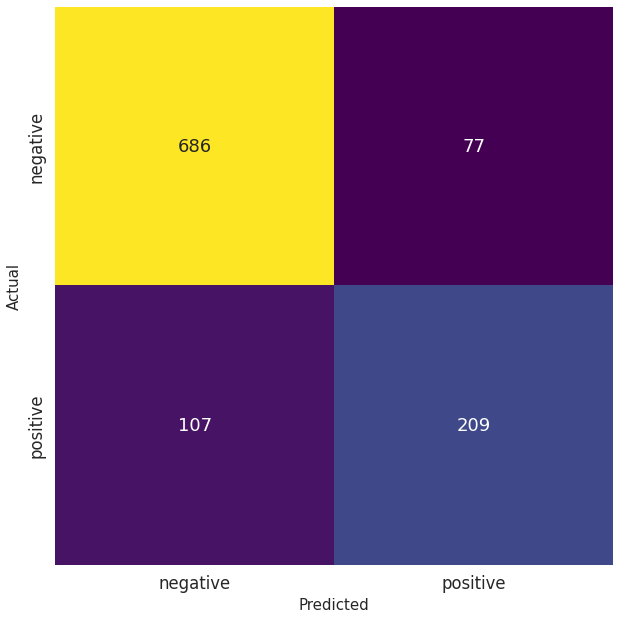

In [268]:
#create confusion matrix
conf_matrix = confusion_matrix(y_test,ada_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

In [269]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores_ada = cross_val_score(adaboost, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean ROC AUC for Random Forest 300 Estimators: %.3f' % mean(scores_ada))

Mean ROC AUC for Random Forest 300 Estimators: 0.843


Our AdaBoost model's accuracy was only slightly worse then our Gradient Boosting model. Again, it's let down was its ability to predict those who churned.

We will now explore Gradient Boosting further and see can we improve its performance further with hyperparameter tuning as well as manipulating the data to make life easier for our models.

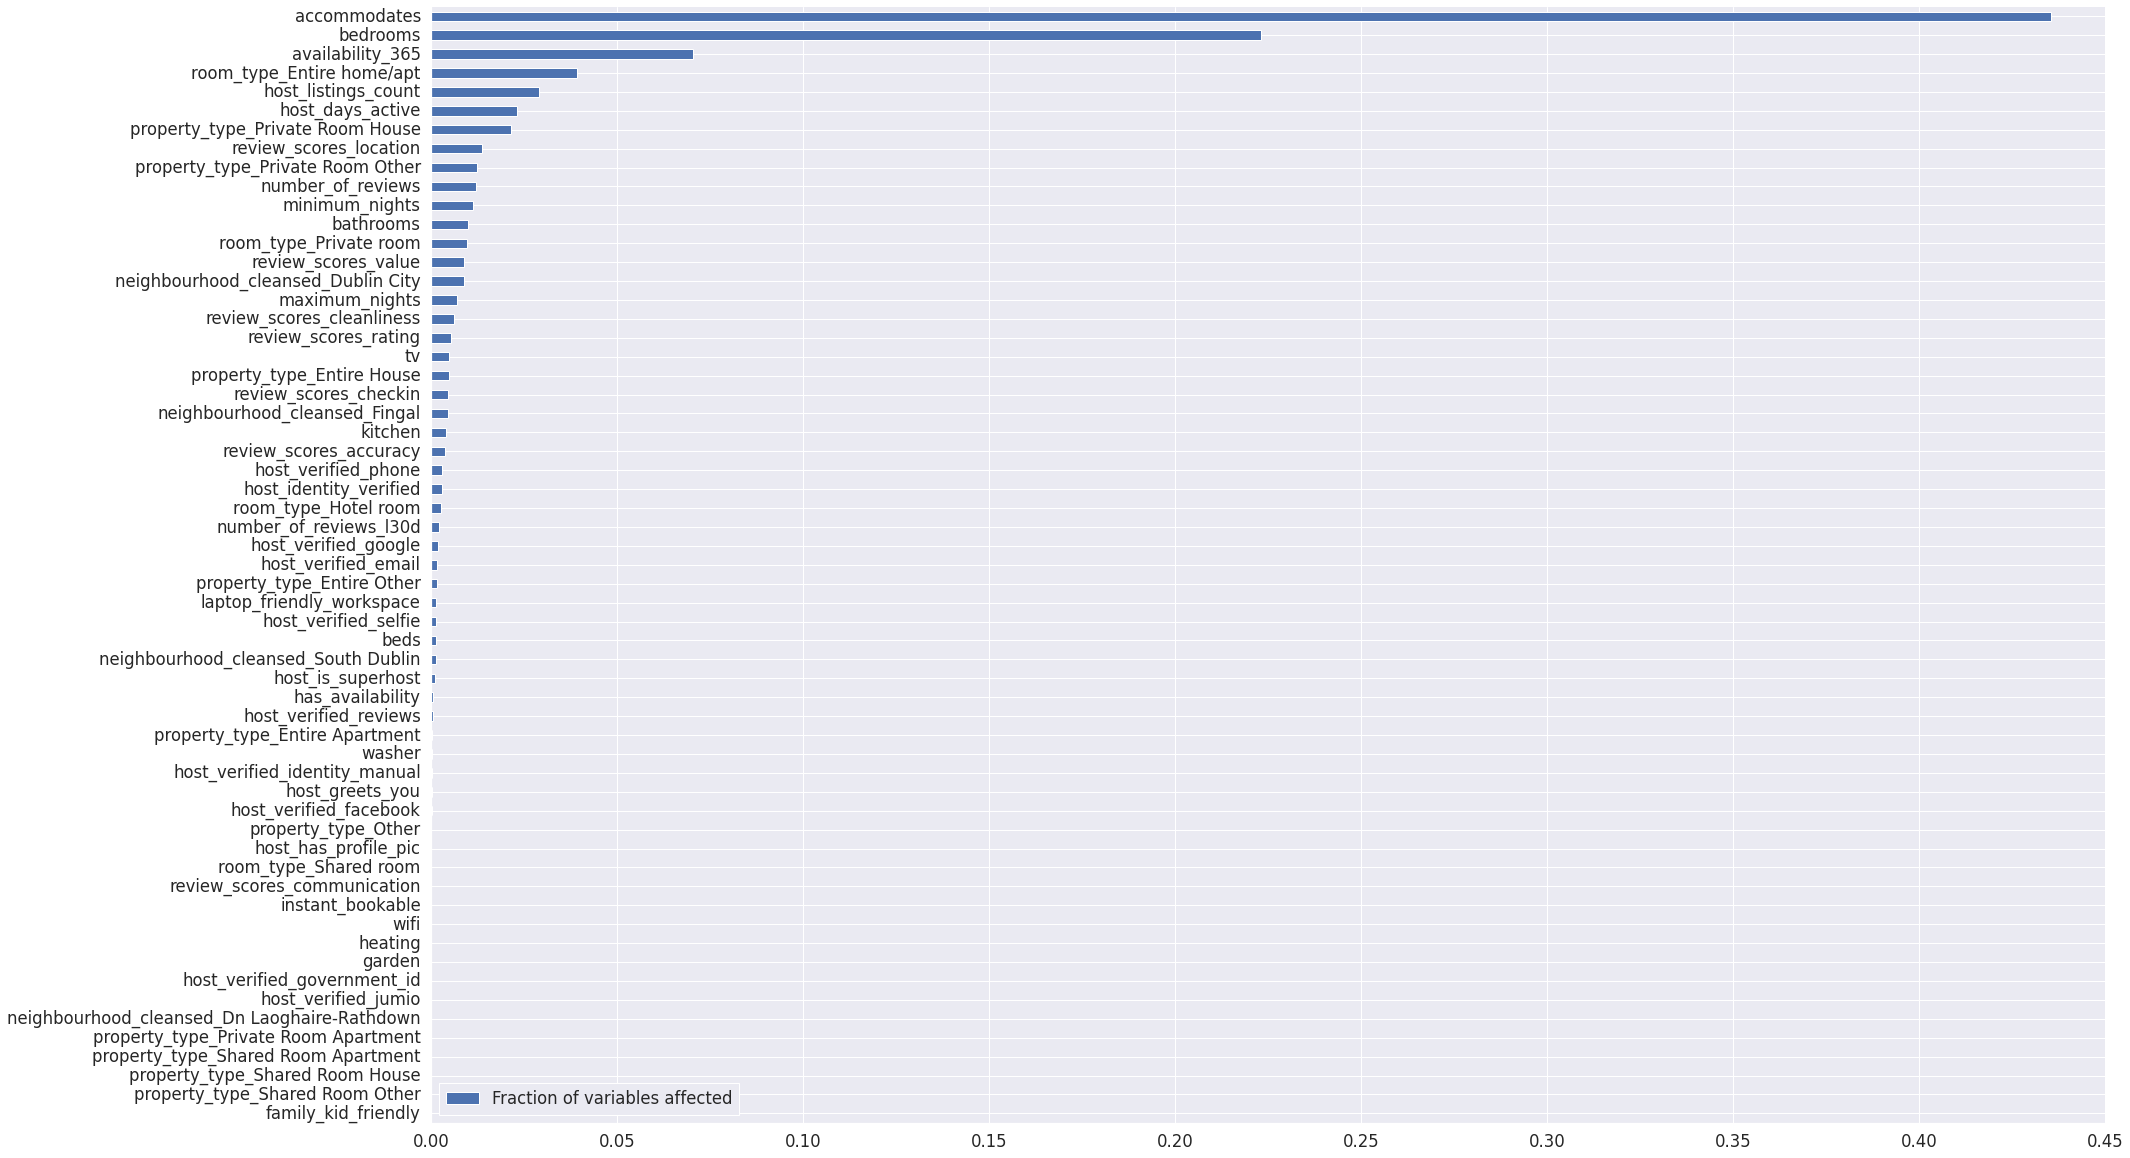

In [270]:
#FEATURE IMPORTANCE
feat_scores= pd.DataFrame({"Fraction of variables affected" : gradient_boosting.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (30, 20))
sns.despine()

Above is a quick look at the current feature importance for our Gradient Boosting model. It will be interesting to see if this changes as we tune this model and manipulate the data.

In [271]:
#We will now try balance the dataset to try improve on our model's performance
#We will first start with under sampling. To do this, we will randomly extract the number of samples from the majority class that is equal to the minority class

#Balancing the dataset
count_class0,count_class1= dfC_dNAN.price_cat.value_counts()
print(f'class 0: {count_class0} and class 1: {count_class1}')
#divide by class
data_class_0 = dfC_dNAN[dfC_dNAN['price_cat']==1]
data_class_1 = dfC_dNAN[dfC_dNAN['price_cat']==0]
print(data_class_0.shape,data_class_1.shape)

class 0: 3796 and class 1: 1596
(1596, 60) (3796, 60)


In [272]:
# Our data has 3755 samples in Below Average and 1637 samples in class Above Average.
# we extract the 1637 samples from Below Average.
under_sampled_data = pd.concat([data_class_0.sample(count_class1),data_class_1],axis = 0)
under_sampled_data.price_cat.value_counts()

0    3796
1    1596
Name: price_cat, dtype: int64

In [273]:
# now our training data is balanced
X = under_sampled_data.drop('price_cat',axis='columns')
y = under_sampled_data['price_cat']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 40,stratify=y)

In [274]:
#We will now see what effect this has on the model
#We will use Gradient Boosting due to it being the model with the best detection for customers who churn

gradient_boosting_under = GradientBoostingClassifier()
gradient_boosting_under.fit(X_train, y_train)
gradient_boosting_tr = gradient_boosting_under.score(X_train,y_train)
gradient_boosting_test = gradient_boosting_under.score(X_test,y_test)
print("Gradient Boosting Classifier on Training: ", gradient_boosting_tr)
print("Gradient Boosting Classifier on Testing: ", gradient_boosting_test)

Gradient Boosting Classifier on Training:  0.8913619501854796
Gradient Boosting Classifier on Testing:  0.8559950556242274


In [275]:
gradient_boosting_pred = gradient_boosting_under.predict(X_test)
gb_report = classification_report(y_test,gradient_boosting_pred)
print(gb_report)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1139
           1       0.77      0.72      0.75       479

    accuracy                           0.86      1618
   macro avg       0.83      0.82      0.82      1618
weighted avg       0.85      0.86      0.85      1618



Text(0.5, 57.0, 'Predicted')

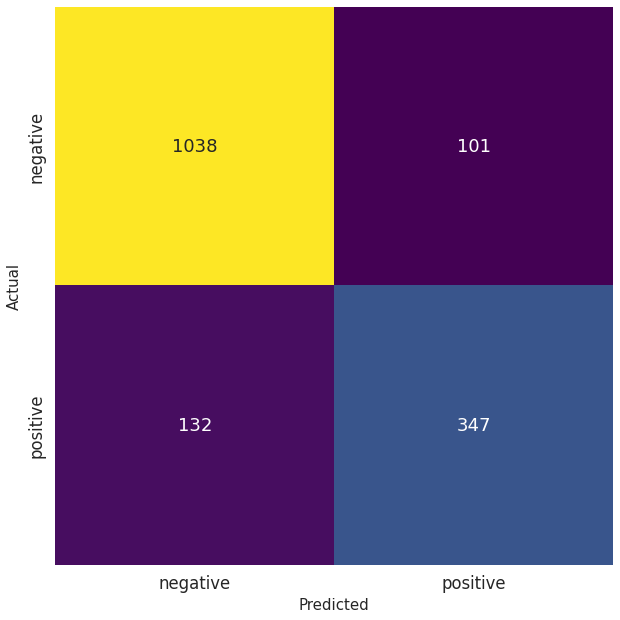

In [276]:
conf_matrix = confusion_matrix(y_test,gradient_boosting_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

#OverSampling Using SMOTE
SMOTE (Synthetic Minority Oversampling Technique) works by oversampling and generates synthetic samples from the minority class. It is used to obtain a synthetically class-balanced or nearly class-balanced training set, which is then used to train the classifier.

You can read more about it here : https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [277]:
X = dfC_dNAN.drop(columns = ['price_cat'])
y = dfC_dNAN['price_cat'].values

In [278]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

X_sm,y_sm = smote.fit_resample(X,y)
X_sm = pd.DataFrame(X_sm)
y_sm = pd.Series(y_sm)
y_sm.value_counts()

0    3796
1    3796
dtype: int64

We can see now by balancing the dataset via SMOTE, we now have 3755 instances of both Above and Below Average priced listings. We can now train, test, split our data and rerun our Gradient Boosting Model.

In [279]:
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size = 0.3,random_state = 40,stratify=y_sm)
#taking a test size of 0.3 so as we're training & testing the same amount as when we ran Gradient Boosting on the original dataset.

In [280]:
gradient_boosting_smote = GradientBoostingClassifier()
gradient_boosting_smote.fit(X_train, y_train)
gradient_boosting_tr = gradient_boosting_smote.score(X_train,y_train)
gradient_boosting_test = gradient_boosting_smote.score(X_test,y_test)
print("Gradient Boosting Classifier on Training: ", gradient_boosting_tr)
print("Gradient Boosting Classifier on Testing: ", gradient_boosting_test)

Gradient Boosting Classifier on Training:  0.9055325555137373
Gradient Boosting Classifier on Testing:  0.8911325724319579


In [281]:
gradient_boosting_pred = gradient_boosting_smote.predict(X_test)
gb_report = classification_report(y_test,gradient_boosting_pred)
print(gb_report)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1139
           1       0.88      0.90      0.89      1139

    accuracy                           0.89      2278
   macro avg       0.89      0.89      0.89      2278
weighted avg       0.89      0.89      0.89      2278



Text(0.5, 57.0, 'Predicted')

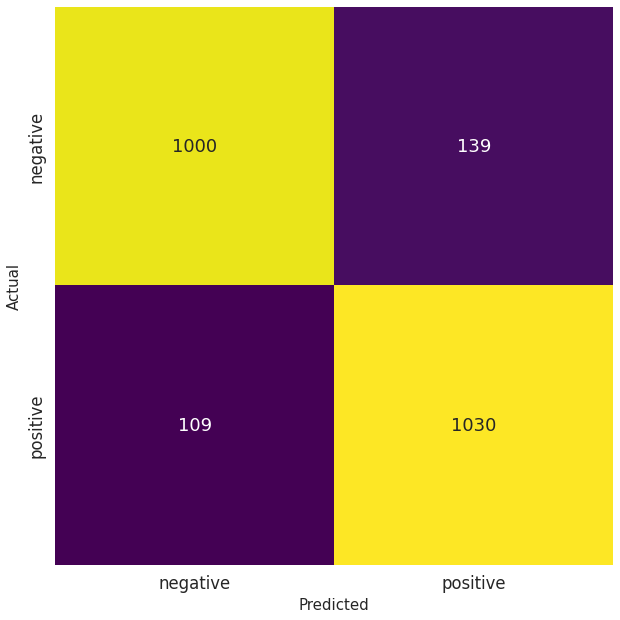

In [282]:

conf_matrix = confusion_matrix(y_test,gradient_boosting_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

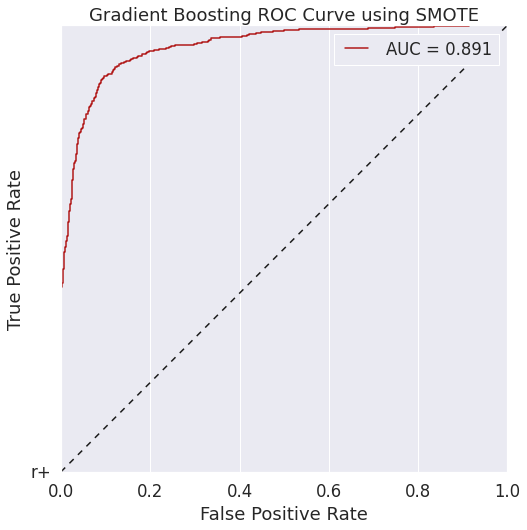

In [283]:
y_pred_prob = gradient_boosting_smote.predict_proba(X_test)[:,1]
roc = roc_auc_score(y_test, gradient_boosting_pred)
# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.figure(figsize = (8, 8))
plt.plot([0,1],[0,1],"k--",'r+')
figsize=(16,12)
plt.plot(fpr,tpr,color = '#b01717', label = 'AUC = %0.3f' % roc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting ROC Curve using SMOTE")
plt.legend()
plt.show()

I managed to improve the ROC AUC score to 0.894. To try get the best performance out of the model, I used hyperparameter tuning to see if I can improve this accuracy further.

In [284]:
gb_smote_tune = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance', max_depth=3,
                                            max_features=None, max_leaf_nodes=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                                            n_estimators=200, random_state=None,
                                            subsample=1.0, verbose=0, warm_start=False)
gb_smote_tune.fit(X_train, y_train)
gradient_boosting_tr_tune = gb_smote_tune.score(X_train,y_train)
gradient_boosting_test_tune = gb_smote_tune.score(X_test,y_test)
print("Gradient Boosting Classifier on Training: ", gradient_boosting_tr_tune)
print("Gradient Boosting Classifier on Testing: ", gradient_boosting_test_tune)

Gradient Boosting Classifier on Training:  0.9269853217914942
Gradient Boosting Classifier on Testing:  0.8990342405618964


In [285]:
gradient_boosting_pred = gb_smote_tune.predict(X_test)
gb_report = classification_report(y_test,gradient_boosting_pred)
print(gb_report)

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1139
           1       0.89      0.91      0.90      1139

    accuracy                           0.90      2278
   macro avg       0.90      0.90      0.90      2278
weighted avg       0.90      0.90      0.90      2278



Text(0.5, 57.0, 'Predicted')

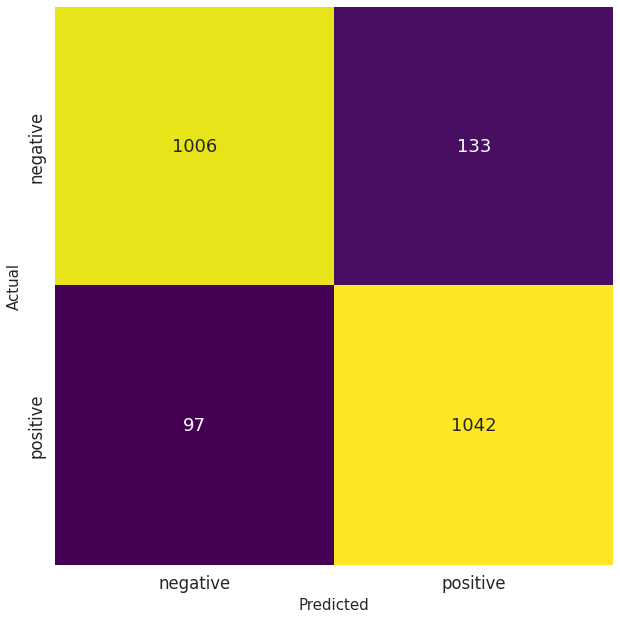

In [286]:
conf_matrix = confusion_matrix(y_test,gradient_boosting_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

In [287]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores_gradient = cross_val_score(gb_smote_tune, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean ROC AUC for Gradient Boosting: %.3f' % mean(scores_gradient))

Mean ROC AUC for Gradient Boosting: 0.893


The initial changes to the model have improved the performance slightly on both the training and the testing data. We will now look at the AUC (Area Under the Curve) score.

In [288]:
y_pred_tune = gb_smote_tune.predict(X_test) 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_tune)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8990342405618963

We will next assess the learning rate (shrinkage) for this model. The learning rate refers to how quickly the error is corrected from each tree to the next. 

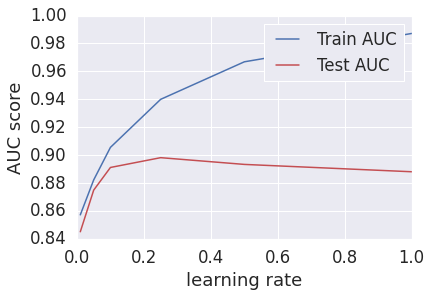

In [289]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

The above graph shows that the higher the learning rate, the more likely it is that our model will suffer from overfitting. Because of this,  I used a learning rate of 0.3.

The next step will be to assess the number of n_estimators in the model. Adding a lot of trees to the model can slow down the training process despite improving its learning accuracy.

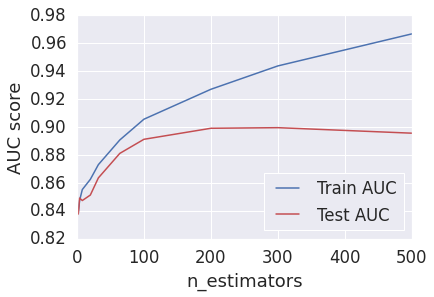

In [290]:
n_estimators = [1, 2, 4, 8, 20, 32, 64, 100, 200, 300, 500]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, loc= "lower right")
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

Increasing the number of n_estimators anymore than 300 will result in overfitting, so thus I decided to use 200 for the number of estimators. 

I assess max_depth which will show how deep the tree can be built. A deeper tree can potentially result in the data being interpreted better.

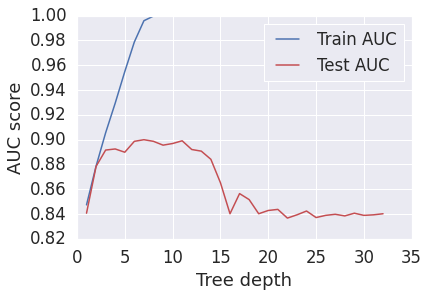

In [291]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   model = GradientBoostingClassifier(max_depth=max_depth)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

The above graph shows that with a greater tree depth, it predicts the training data perfectly, however, the unseen testing data prediction accuracy falls. It appears that the sweet spot for n_estimators is 4.

We will next look at min_samples_split. This is the minimum number of data samples required to split an internal node. Increasing the number of samples results in the tree having more varience. The parameters we will use will vary from 10% to all parameters.

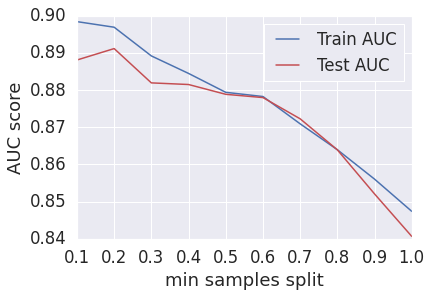

In [292]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   model = GradientBoostingClassifier(min_samples_split=min_samples_split)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

The above graph differs from the other parameters we've tuned as the increased number of samples for min_sample_split has caused the AUC score to decrease. For our model we will use a min_sample_split of 0.075.

Next for our model is the min_sample_leaf, which is the minimum number of samples needed to be at a leaf node. It is similar to min_sample split, except this describes the number of samples of samples at the leaves.

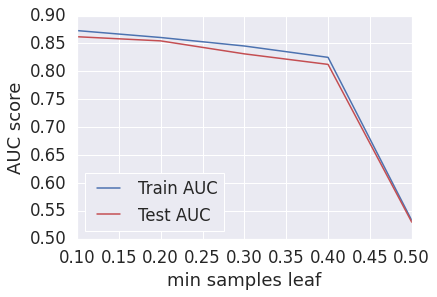

In [293]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   model = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, loc = 'lower left')
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

Similarly to our previous graph, increasing the number of min_sample_leaf will cause the model to be underfit. Because of this we will keep it at 0.1.

Our next parameter is max_features, which looks at the number of features when looking for the best split.

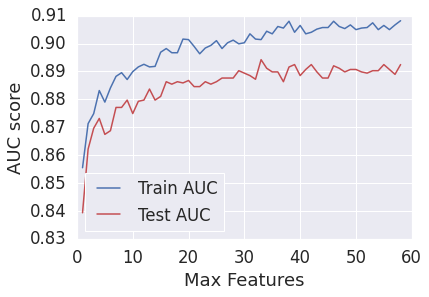

In [294]:
max_features = list(range(1,X.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   model = GradientBoostingClassifier(max_features=max_feature)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, loc = 'lower left')
plt.ylabel('AUC score')
plt.xlabel('Max Features')
plt.show()

We can see from the graph that using a larger number of features does improve the AUC score on both the training and the testing data. We will choose to use a max_features of 42.

In [295]:
gb_smote_tune_final = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.3, loss='deviance', max_depth=4,
                                            max_features=42, max_leaf_nodes=None,
                                            min_samples_leaf=0.075,
                                            min_samples_split=0.075, min_weight_fraction_leaf=0.0,
                                            n_estimators=250, random_state=None,
                                            subsample=1.0, verbose=0, warm_start=False)
gb_smote_tune_final.fit(X_train, y_train)
gradient_boosting_tr_tune_f = gb_smote_tune_final.score(X_train,y_train)
gradient_boosting_test_tune_f = gb_smote_tune_final.score(X_test,y_test)
print("Gradient Boosting Classifier on Training: ", gradient_boosting_tr_tune_f)
print("Gradient Boosting Classifier on Testing: ", gradient_boosting_test_tune_f)

Gradient Boosting Classifier on Training:  0.9587881068874671
Gradient Boosting Classifier on Testing:  0.8933274802458296


In [296]:
gradient_boosting_pred_f = gb_smote_tune_final.predict(X_test)
gb_report = classification_report(y_test,gradient_boosting_pred_f)
print(gb_report)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1139
           1       0.89      0.90      0.89      1139

    accuracy                           0.89      2278
   macro avg       0.89      0.89      0.89      2278
weighted avg       0.89      0.89      0.89      2278



Text(0.5, 57.0, 'Predicted')

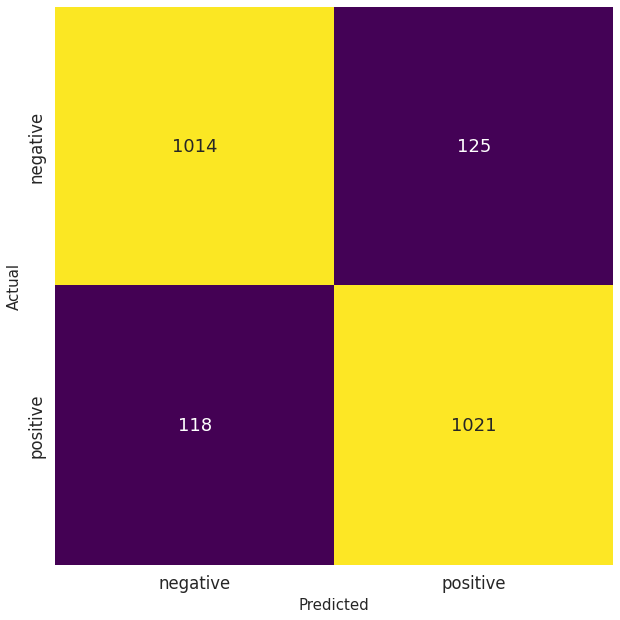

In [297]:
conf_matrix = confusion_matrix(y_test,gradient_boosting_pred_f)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

In [298]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores_gradient = cross_val_score(gb_smote_tune_final, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean ROC AUC for Gradient Boosting: %.3f' % mean(scores_gradient))

Mean ROC AUC for Gradient Boosting: 0.888


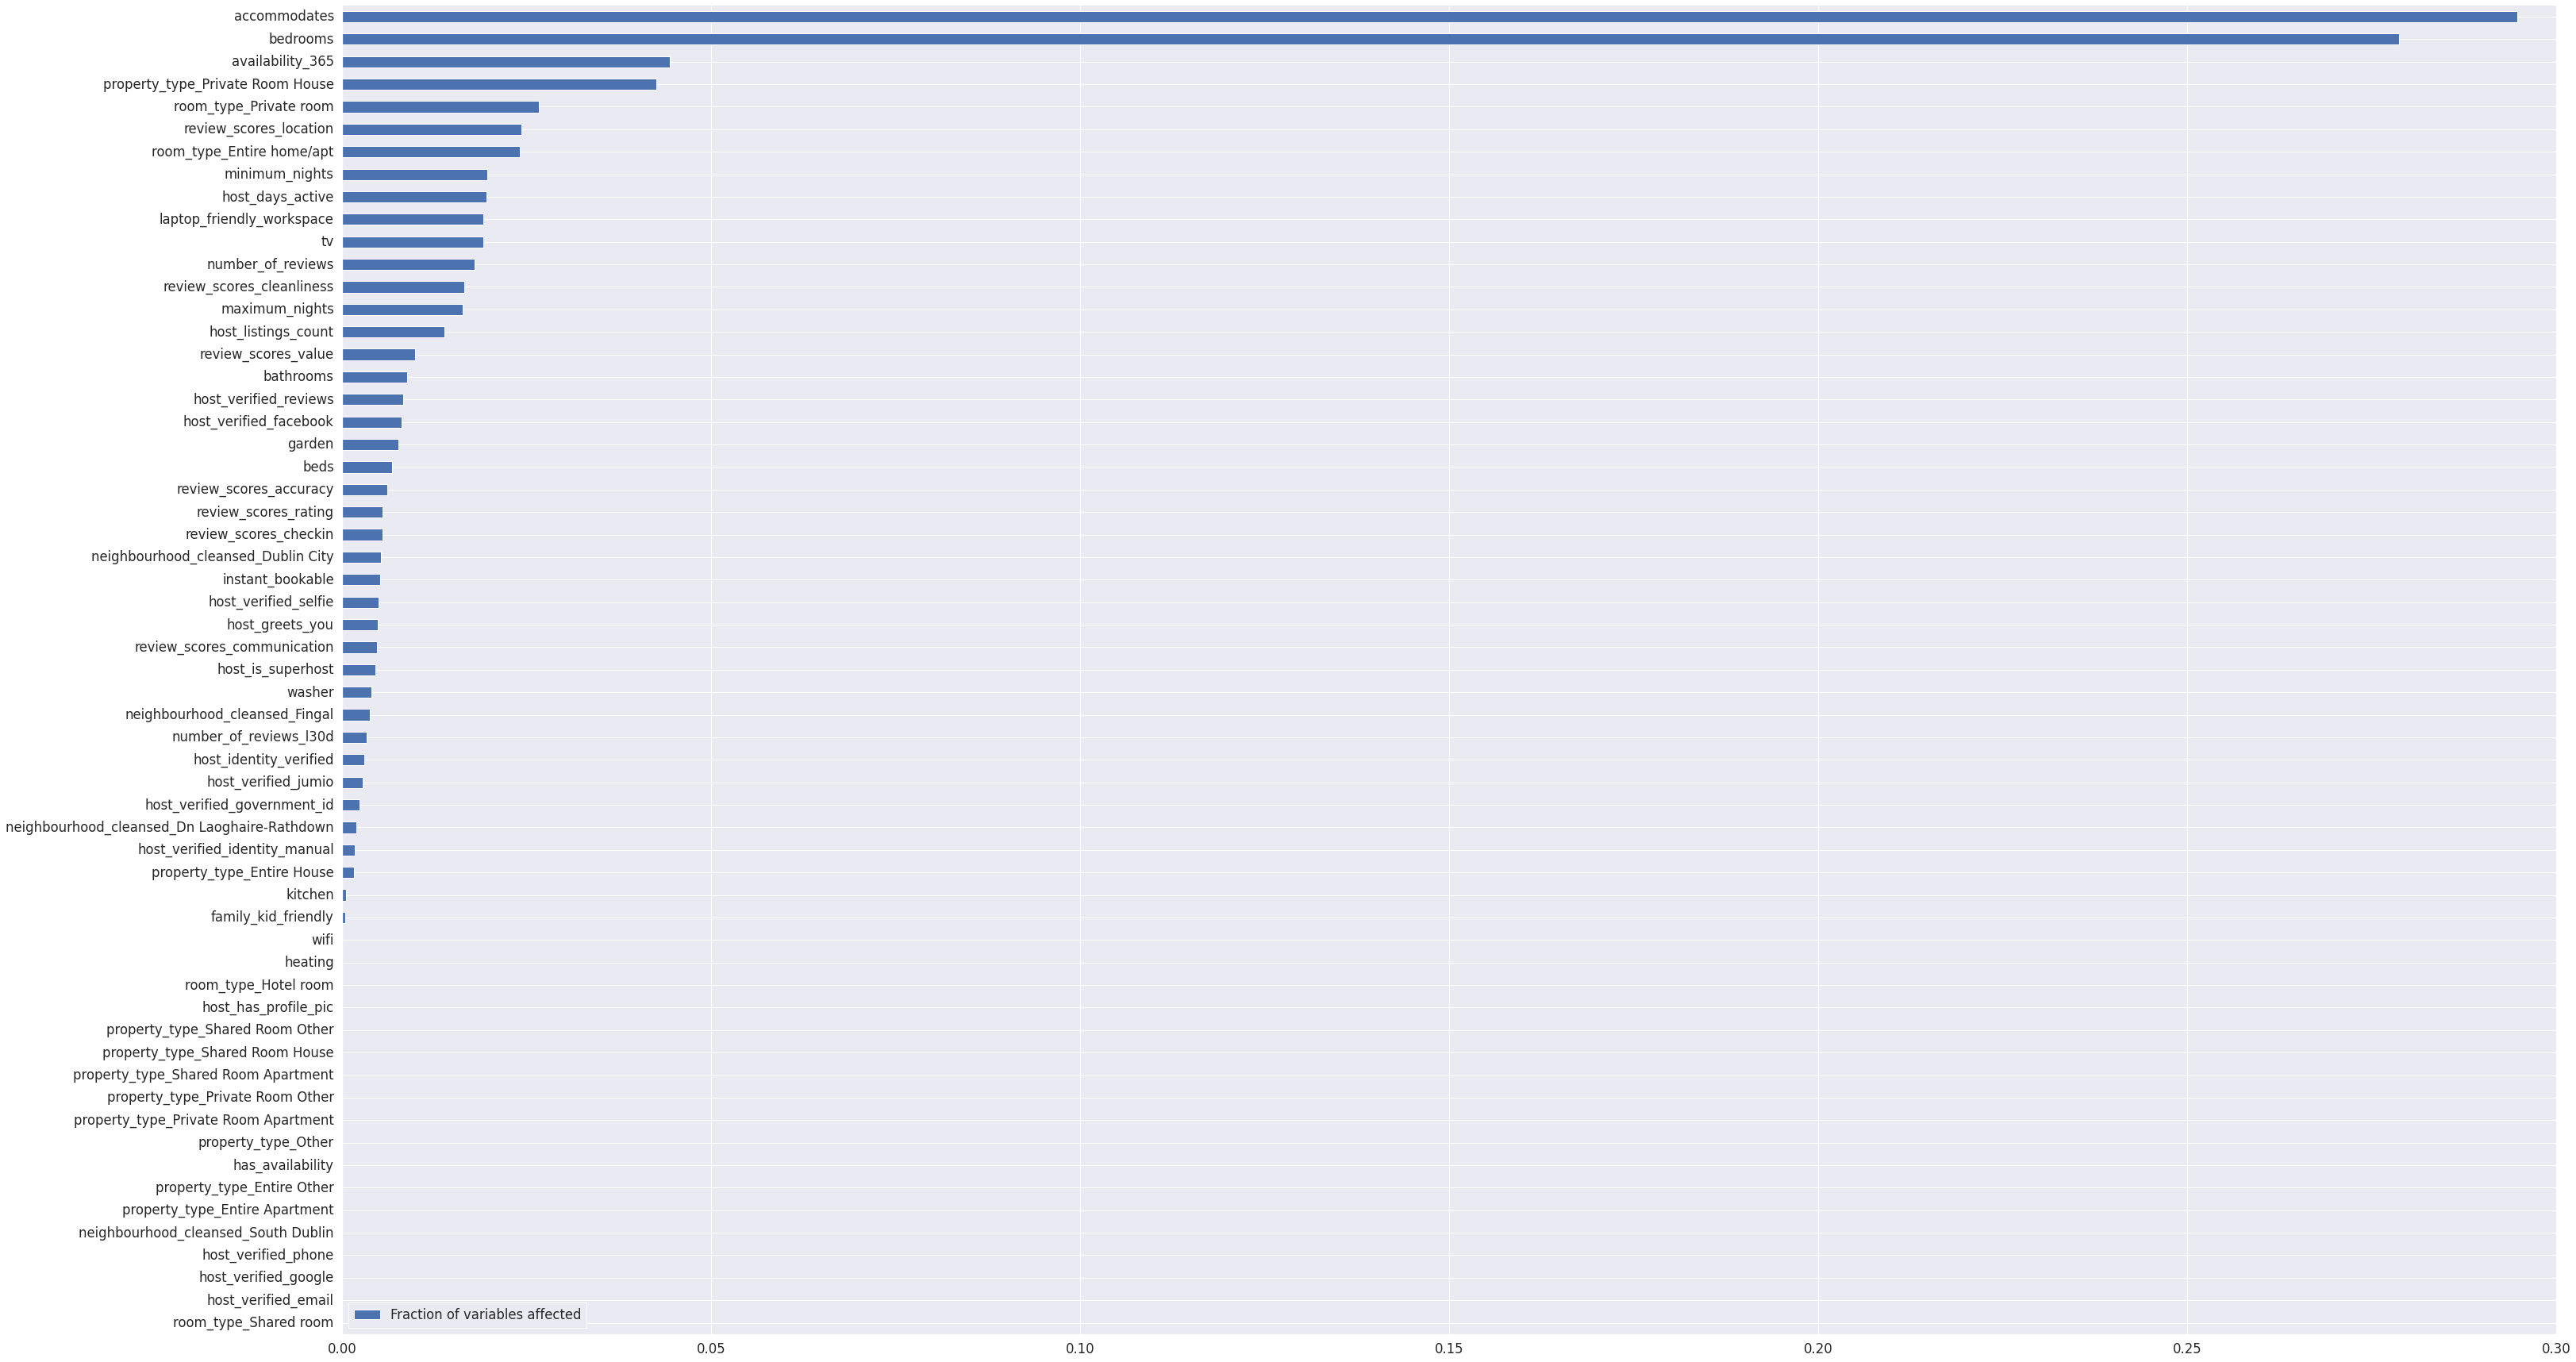

In [299]:
#FEATURE IMPORTANCE
feat_scores= pd.DataFrame({"Fraction of variables affected" : gb_smote_tune_final.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (50, 30))
sns.despine()

We can see from rerunning the feature importance after balancing our dataset as well as tuning our Gradient Model, a lot more features are considered when detecting customers who churned. 

# Stacking the models used on our SMOTE Dataset

I will first stack the 2 best performing models (Logistic Regression, Gradient Boosting) and assess the accuracy. Depending on the results, more models may be introduced.

In [300]:
from sklearn.ensemble import StackingClassifier
models = []
models.append(('LR', LogisticRegression()))
meta_learner_model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.3, loss='deviance', max_depth=4,
                                            max_leaf_nodes=None,
                                            min_samples_leaf=0.075,
                                            min_samples_split=0.075, min_weight_fraction_leaf=0.0,
                                            n_estimators=250, random_state=None,
                                            subsample=1.0, verbose=0, warm_start=False)




In [301]:
stack_model = StackingClassifier(estimators=models, final_estimator = meta_learner_model, cv = 5)
stack_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


StackingClassifier(cv=5, estimators=[('LR', LogisticRegression())],
                   final_estimator=GradientBoostingClassifier(learning_rate=0.3,
                                                              max_depth=4,
                                                              min_samples_leaf=0.075,
                                                              min_samples_split=0.075,
                                                              n_estimators=250))

In [302]:
accuracy_stack = stack_model.score(X_train, y_train)
accuracy_stack_tr = stack_model.score(X_test,y_test)
print("Stacked Models Accuracy on Training :",accuracy_stack)
print("Stacked Models Accuracy on Testing :",accuracy_stack_tr)

Stacked Models Accuracy on Training : 0.8560406473466315
Stacked Models Accuracy on Testing : 0.8617208077260755


In [303]:
stack_pred = stack_model.predict(X_test)
stack_report = classification_report(y_test,stack_pred)
print(stack_report)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1139
           1       0.85      0.89      0.86      1139

    accuracy                           0.86      2278
   macro avg       0.86      0.86      0.86      2278
weighted avg       0.86      0.86      0.86      2278



Text(0.5, 57.0, 'Predicted')

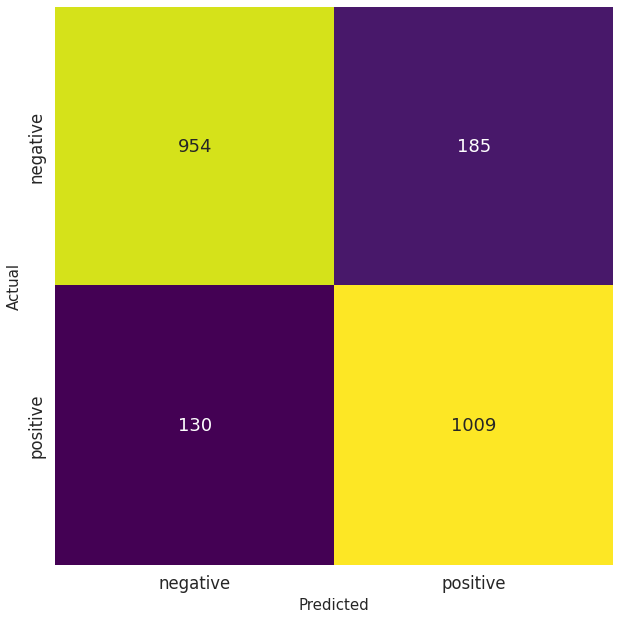

In [304]:
conf_matrix = confusion_matrix(y_test,stack_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

The results from stacking this model are very good with both testing and training accuracies quite high, as well as the stacked model detecting both churn and non churn customers accurately. 

However, according to the confusion matrix the tuned Gradient Boosting model still performs marginally better overall. To see can we make any final improvements, we will stack all models used in this project. 

In [305]:
#Lets add a third model to see if it improves performance
models.append(('RandomForest', RandomForestClassifier(n_estimators=200 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = 0.785, min_samples_leaf = 0.1, min_samples_split = 0.075, max_depth=22,
                                  max_leaf_nodes = 30)))

In [306]:
new_stack_model = StackingClassifier(estimators=models, final_estimator = meta_learner_model, cv = 5)
new_stack_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


StackingClassifier(cv=5,
                   estimators=[('LR', LogisticRegression()),
                               ('RandomForest',
                                RandomForestClassifier(max_depth=22,
                                                       max_features=0.785,
                                                       max_leaf_nodes=30,
                                                       min_samples_leaf=0.1,
                                                       min_samples_split=0.075,
                                                       n_estimators=200,
                                                       n_jobs=-1,
                                                       oob_score=True,
                                                       random_state=50))],
                   final_estimator=GradientBoostingClassifier(learning_rate=0.3,
                                                              max_depth=4,
                                                  

In [307]:
new_accuracy_stack = new_stack_model.score(X_train, y_train)
new_accuracy_stack_tr = new_stack_model.score(X_test,y_test)
print("New Stacked Models Accuracy on Training :",new_accuracy_stack)
print("New Stacked Models Accuracy on Testing :",new_accuracy_stack_tr)

New Stacked Models Accuracy on Training : 0.8579224689499435
New Stacked Models Accuracy on Testing : 0.8485513608428445


In [308]:
new_stack_pred = new_stack_model.predict(X_test)
new_stack_report = classification_report(y_test,new_stack_pred)
print(new_stack_report)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1139
           1       0.83      0.88      0.85      1139

    accuracy                           0.85      2278
   macro avg       0.85      0.85      0.85      2278
weighted avg       0.85      0.85      0.85      2278



Text(0.5, 57.0, 'Predicted')

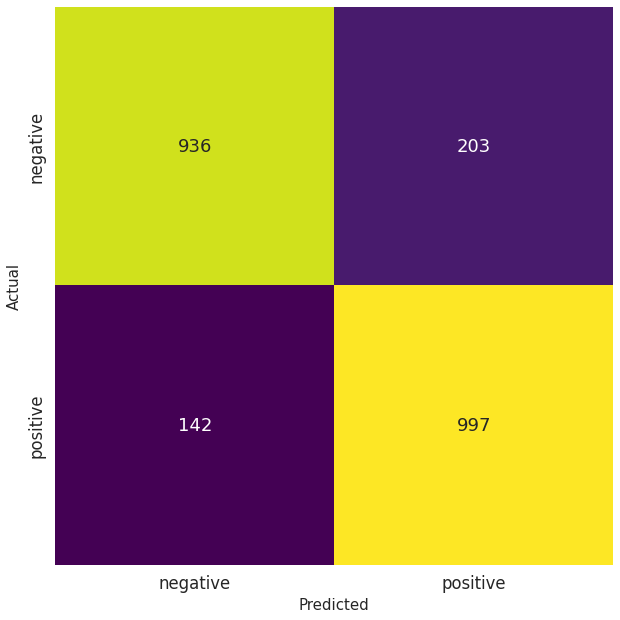

In [309]:
conf_matrix = confusion_matrix(y_test,new_stack_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

The addition of the three extra models greatly improved the training accuracy but only marginally improved the testing accuracy. It also did not detect customers who churned as accurately as Gradient Boost.

Thus for this project we can conclude that our hyperparameter tuned model on our balanced data using SMOTE was the most accurate model.

In [310]:
#adding some of our original models to see can we improve performance a bit
models.append(('SVC', SVC(probability=True)))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))

In [311]:
final_stacked_model = StackingClassifier(estimators=models, final_estimator = meta_learner_model, cv = 5)
final_stacked_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


StackingClassifier(cv=5,
                   estimators=[('LR', LogisticRegression()),
                               ('RandomForest',
                                RandomForestClassifier(max_depth=22,
                                                       max_features=0.785,
                                                       max_leaf_nodes=30,
                                                       min_samples_leaf=0.1,
                                                       min_samples_split=0.075,
                                                       n_estimators=200,
                                                       n_jobs=-1,
                                                       oob_score=True,
                                                       random_state=50)),
                               ('SVC', SVC(probability=True)),
                               ('AdaBoost', AdaBoostClassifier()),
                               ('Decision Tree', DecisionTreeClassifier())],


In [312]:
final_accuracy_stack = final_stacked_model.score(X_train, y_train)
final_accuracy_stack_tr = final_stacked_model.score(X_test,y_test)
print("New Stacked Models Accuracy on Training :",final_accuracy_stack)
print("New Stacked Models Accuracy on Testing :",final_accuracy_stack_tr)

New Stacked Models Accuracy on Training : 0.9294316898757998
New Stacked Models Accuracy on Testing : 0.8762071992976295


In [313]:
final_stack_pred = final_stacked_model.predict(X_test)
final_stack_report = classification_report(y_test,final_stack_pred)
print(final_stack_report)

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1139
           1       0.87      0.89      0.88      1139

    accuracy                           0.88      2278
   macro avg       0.88      0.88      0.88      2278
weighted avg       0.88      0.88      0.88      2278



Text(0.5, 57.0, 'Predicted')

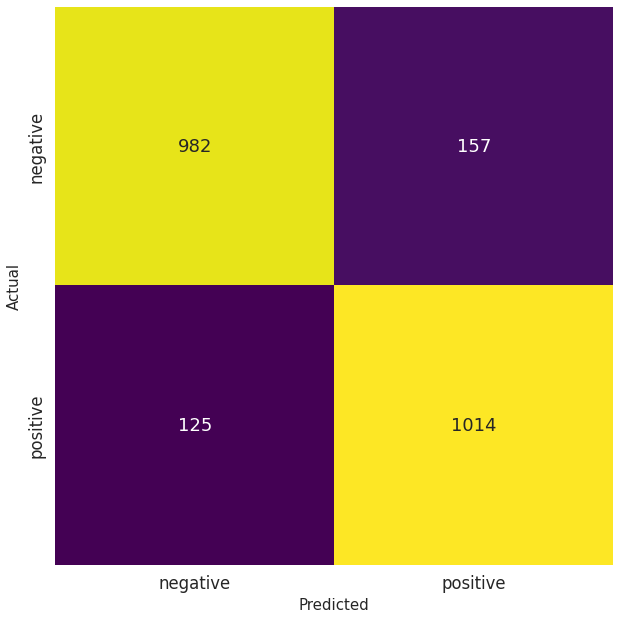

In [314]:
conf_matrix = confusion_matrix(y_test,final_stack_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)